# Implementation of machine learning on Vacation Data

## Import the required Libraries

In [1]:
# Import numpy
import numpy as np

# Import pandas
import pandas as pd

#Import matplotlib
import matplotlib.pyplot as plt

#Import seaborn
import seaborn as sns

### Set Background Color for graphs

In [2]:
bg_color = '#a6ecf5'
graph_color = 'green'

## Load the dataset and perform data overview

In [3]:
# Read the data using pandas
df_vacations_data = pd.read_excel('vacation_data.xlsx')

In [4]:
# Show the first five observations
df_vacations_data.head()

Gender  Age  Education                  Occupation State  \
0  Female   25        6.0  Clerical or service worker   VIC   
1  Female   31        8.0                professional    WA   
2    Male   21        3.0                         NaN   NSW   
3  Female   18        2.0                  unemployed   NSW   
4    Male   61        3.0                     retired    WA   

  relationship_status  obligation_rating obligation_category   NEP  \
0              single               4.80                  Q4  3.20   
1             married               3.30                  Q1  3.40   
2              single               3.40                  Q2  3.07   
3              single               2.63                  Q1  3.40   
4             married               3.40                  Q2  3.73   

   vacation_behaviour  ... life_style_of_the_local_people  \
0                2.07  ...                             no   
1                2.00  ...                            yes   
2                1.23  ...                            yes   
3                2.17  ...                             no   
4                1.72  ...                            yes   

  intense_experience_of_nature cosiness/familiar_atmosphere  \
0                           no                           no   
1                           no                           no   
2                           no                          yes   
3                          yes                           no   
4                           no                           no   

  maintain_unspoilt_surroundings everything_organised  \
0                             no                   no   
1                             no                   no   
2                             no                   no   
3                             no                   no   
4                            yes                   no   

  unspoilt_nature/natural_landscape cultural_offers change_of_surroundings  \
0                                no              no                     no   
1                                no              no                    yes   
2                                no             yes                     no   
3                                no              no                    yes   
4                                no              no                     no   

  Income(k$) Expenditure  
0       15.0        39.0  
1       15.0        81.0  
2       16.0         6.0  
3       16.0        77.0  
4       17.0        40.0  

[5 rows x 32 columns]

In [5]:
# Show the last five observations
df_vacations_data.tail()

Gender  Age  Education                Occupation State  \
995    Male   51        3.0  manager or administrator   VIC   
996    Male   58        4.0      small business owner    WA   
997    Male   41        8.0              professional   QLD   
998  Female   42        3.0              professional   VIC   
999  Female   32        6.0  manager or administrator    WA   

       relationship_status  obligation_rating obligation_category   NEP  \
995  separated or divorced               2.37                  Q1  3.40   
996  living with a partner               4.40                  Q4  3.87   
997                married               3.87                  Q3  3.40   
998  living with a partner               4.00                  Q3  3.13   
999  living with a partner               2.33                  Q1  3.60   

     vacation_behaviour  ... life_style_of_the_local_people  \
995                2.57  ...                            yes   
996                3.50  ...                            yes   
997                2.56  ...                             no   
998                4.70  ...                             no   
999                2.73  ...                            yes   

    intense_experience_of_nature cosiness/familiar_atmosphere  \
995                          yes                           no   
996                          yes                           no   
997                           no                           no   
998                           no                           no   
999                           no                           no   

    maintain_unspoilt_surroundings everything_organised  \
995                            yes                   no   
996                            yes                   no   
997                             no                   no   
998                             no                   no   
999                             no                   no   

    unspoilt_nature/natural_landscape cultural_offers change_of_surroundings  \
995                                no             yes                    yes   
996                               yes             yes                     no   
997                                no              no                    yes   
998                                no              no                     no   
999                                no              no                    yes   

    Income(k$) Expenditure  
995        NaN         NaN  
996        NaN         NaN  
997        NaN         NaN  
998        NaN         NaN  
999        NaN         NaN  

[5 rows x 32 columns]

In [6]:
# Show the size of the data
df_vacations_data.shape

(1000, 32)

**INTERPRETATION**
 - We have 1000 observation
 - We have 32 attributes 

In [7]:
# Show the columns of the data
df_vacations_data.columns

Index(['Gender', 'Age', 'Education', 'Occupation', 'State',
       'relationship_status', 'obligation_rating', 'obligation_category',
       'NEP', 'vacation_behaviour', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings', 'Income(k$)', 'Expenditure'],
      dtype='object')

**COLUMN INFO**
- Gender: Gender of the person who is going for vacation (e.g., Male, Female, Non-binary, etc.).
- Age: Age of the individual, likely in years.
- Education: Level of education attained by the individual (e.g., High School, Bachelor’s Degree, Master’s Degree, etc.).
- Occupation: Job or profession of the individual.
- State: State or region where the individual resides.
- Relationship.Status: Relationship status of the individual (e.g., Single, Married, Divorced, etc.).
- Obligation: Indicates some form of obligation (e.g., financial, familial, or other responsibilities). Exact meaning depends on the dataset context.
- Obligation2: Another column related to obligations, possibly a secondary or additional type of obligation.
- NEP: Likely an acronym or specific term related to the dataset. Without additional context, it’s unclear what this represents (e.g., "Net Effective Price," "Non-Exempt Personnel," etc.).
- Vacation.Behaviour**: Describes the individual’s behavior or preferences related to vacations (e.g., frequency, type of vacations, etc.).
- rest and relax: Preference for seeking rest and relaxation during vacations.
- luxury / be spoilt: Preference for luxury or being pampered during vacations.
- do sports: Preference for engaging in sports or physical activities during vacations.
- excitement, a challenge: Preference for seeking excitement or challenges during vacations.
- not exceed planned budget: Preference for staying within a planned budget during vacations.
- realise creativity: Preference for activities that allow the individual to express or realize their creativity during vacations.
- fun and entertainment: Preference for fun and entertainment during vacations.
- good company: Preference for spending vacations with good company (e.g., friends, family).
- health and beauty: Preference for activities related to health and beauty during vacations (e.g., spa treatments, wellness activities).
- free-and-easy-going: Preference for a relaxed, unstructured, or spontaneous vacation style.
- entertainment facilities: Preference for vacations that include access to entertainment facilities (e.g., resorts, theme parks).
- not care about prices: Indicates that the individual does not prioritize cost when planning vacations.
- life style of the local people: Preference for experiencing or learning about the lifestyle of local people during vacations.
- intense experience of nature: Preference for immersive or intense experiences in nature during vacations.
- cosiness/familiar atmosphere: Preference for cozy or familiar environments during vacations.
- maintain unspoilt surroundings: Preference for vacations that prioritize preserving or enjoying unspoiled natural surroundings.
- everything organised: Preference for vacations where everything is pre-organized or planned.
- unspoilt nature/natural landscape: Preference for vacations that focus on unspoiled natural landscapes.
- cultural offers: Preference for vacations that include cultural activities or experiences (e.g., museums, historical sites).
- change of surroundings: Preference for vacations that provide a change of environment or scenery.
- Income(k$): The individual’s income, likely in thousands of dollars (k$).
- Expenditure: The individual’s expenditure, possibly related to vacations or general spending.

In [8]:
# Show the datatype of the data (Information of the data)
df_vacations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             1000 non-null   object 
 1   Age                                1000 non-null   int64  
 2   Education                          992 non-null    float64
 3   Occupation                         941 non-null    object 
 4   State                              1000 non-null   object 
 5   relationship_status                996 non-null    object 
 6   obligation_rating                  1000 non-null   float64
 7   obligation_category                1000 non-null   object 
 8   NEP                                1000 non-null   float64
 9   vacation_behaviour                 975 non-null    float64
 10  rest_and_relax                     1000 non-null   object 
 11  luxury_or_be_spoilt                1000 non-null   object

**INTERPRETATION**
 - We have 7 numerical columns
 - We have 25 categorical columns
 - Space utilized by the data is 250.1+ KB
 - We have null records in the data

In [9]:
# Showcase the basic statistics of the data
df_vacations_data.describe().T

count       mean        std    min    25%    50%    75%  \
Age                 1000.0  44.168000  14.539228  18.00  32.00  42.00  57.00   
Education            992.0   4.813508   2.422252   1.00   3.00   6.00   7.00   
obligation_rating   1000.0   3.734580   0.635835   1.00   3.37   3.80   4.20   
NEP                 1000.0   3.648640   0.561130   1.73   3.27   3.67   4.07   
vacation_behaviour   975.0   2.962800   0.668444   1.23   2.47   2.94   3.43   
Income(k$)           200.0  60.560000  26.264721  15.00  41.50  61.50  78.00   
Expenditure          200.0  50.200000  25.823522   1.00  34.75  50.00  73.00   

                      max  
Age                 105.0  
Education             8.0  
obligation_rating     5.0  
NEP                   5.0  
vacation_behaviour    4.9  
Income(k$)          137.0  
Expenditure          99.0

**INTERPRETATION**
 - We don't have outliers in the data

## Data Preprocessing

### Data Cleaning

In [10]:
# Show first five observations of the data
df_vacations_data.head()

Gender  Age  Education                  Occupation State  \
0  Female   25        6.0  Clerical or service worker   VIC   
1  Female   31        8.0                professional    WA   
2    Male   21        3.0                         NaN   NSW   
3  Female   18        2.0                  unemployed   NSW   
4    Male   61        3.0                     retired    WA   

  relationship_status  obligation_rating obligation_category   NEP  \
0              single               4.80                  Q4  3.20   
1             married               3.30                  Q1  3.40   
2              single               3.40                  Q2  3.07   
3              single               2.63                  Q1  3.40   
4             married               3.40                  Q2  3.73   

   vacation_behaviour  ... life_style_of_the_local_people  \
0                2.07  ...                             no   
1                2.00  ...                            yes   
2                1.23  ...                            yes   
3                2.17  ...                             no   
4                1.72  ...                            yes   

  intense_experience_of_nature cosiness/familiar_atmosphere  \
0                           no                           no   
1                           no                           no   
2                           no                          yes   
3                          yes                           no   
4                           no                           no   

  maintain_unspoilt_surroundings everything_organised  \
0                             no                   no   
1                             no                   no   
2                             no                   no   
3                             no                   no   
4                            yes                   no   

  unspoilt_nature/natural_landscape cultural_offers change_of_surroundings  \
0                                no              no                     no   
1                                no              no                    yes   
2                                no             yes                     no   
3                                no              no                    yes   
4                                no              no                     no   

  Income(k$) Expenditure  
0       15.0        39.0  
1       15.0        81.0  
2       16.0         6.0  
3       16.0        77.0  
4       17.0        40.0  

[5 rows x 32 columns]

#### Perform the renaming action

In [11]:
# Show the columns in the data
df_vacations_data.columns

Index(['Gender', 'Age', 'Education', 'Occupation', 'State',
       'relationship_status', 'obligation_rating', 'obligation_category',
       'NEP', 'vacation_behaviour', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings', 'Income(k$)', 'Expenditure'],
      dtype='object')

**INTERPRETATION**
 - Column names are already in good structure so there is no need of renaming

### Null value treatment

In [12]:
# Fetch the null records present in the data (count)
df_vacations_data.isnull().sum()

Gender                                 0
Age                                    0
Education                              8
Occupation                            59
State                                  0
relationship_status                    4
obligation_rating                      0
obligation_category                    0
NEP                                    0
vacation_behaviour                    25
rest_and_relax                         0
luxury_or_be_spoilt                    0
do_sports                              0
excitement_and_challenge               0
not_exceed_planned_budget              0
realise_creativity                     0
fun_and_entertainment                  0
good_company                           0
health_and_beauty                      0
free_and_easy_going                    0
entertainment_facilities               0
not_care_about_prices                  0
life_style_of_the_local_people         0
intense_experience_of_nature           0
cosiness/familia

**INTERPRETATION**
 - We have 8 missing records in Education column
 - We have 59 missing records in Occupation column
 - We have 8 missing records in relationship_status column
 - We have 25 missing records in vacation_behaviour column
 - We have 800 missing records in Income_Dollar_k column
 - We have 800 missing records in Expenditure_dollar_k column

In [13]:
# Find the percentage of the missing records
df_vacations_data.isnull().sum()/len(df_vacations_data) * 100

Gender                                0.0
Age                                   0.0
Education                             0.8
Occupation                            5.9
State                                 0.0
relationship_status                   0.4
obligation_rating                     0.0
obligation_category                   0.0
NEP                                   0.0
vacation_behaviour                    2.5
rest_and_relax                        0.0
luxury_or_be_spoilt                   0.0
do_sports                             0.0
excitement_and_challenge              0.0
not_exceed_planned_budget             0.0
realise_creativity                    0.0
fun_and_entertainment                 0.0
good_company                          0.0
health_and_beauty                     0.0
free_and_easy_going                   0.0
entertainment_facilities              0.0
not_care_about_prices                 0.0
life_style_of_the_local_people        0.0
intense_experience_of_nature      

**INTERPRETATION**
 - As per the first law the observations we need to remove are Education, Occupation, relationship_status, vacation_behaviour
 - As per the second law there is no as such column where we need to impute the missing records
 - As per the third law the columns we need to remove from the data are  Income_Dollar_k, Expenditure_dollar_k

In [14]:
# Perform the action of attributes removal
df_vacations_data.drop(['Income(k$)', 'Expenditure'], axis=1, inplace=True)

In [15]:
# Perform the action of observation removal
df_vacations_data.dropna(inplace=True)

In [16]:
# Perform the authentic check
df_vacations_data.isnull().sum()/len(df_vacations_data)*100

Gender                               0.0
Age                                  0.0
Education                            0.0
Occupation                           0.0
State                                0.0
relationship_status                  0.0
obligation_rating                    0.0
obligation_category                  0.0
NEP                                  0.0
vacation_behaviour                   0.0
rest_and_relax                       0.0
luxury_or_be_spoilt                  0.0
do_sports                            0.0
excitement_and_challenge             0.0
not_exceed_planned_budget            0.0
realise_creativity                   0.0
fun_and_entertainment                0.0
good_company                         0.0
health_and_beauty                    0.0
free_and_easy_going                  0.0
entertainment_facilities             0.0
not_care_about_prices                0.0
life_style_of_the_local_people       0.0
intense_experience_of_nature         0.0
cosiness/familia

In [17]:
# Check the changing number of observations in data due to null value treatment
df_vacations_data.shape

(912, 30)

**INTERPRETATION**
 - Droping the null records is not impacting on records present in the data, the difference is only 88 from original

## Null value treatment done

## EDA (Exploratory Data Analysis)

## Univariate Analysis

In [18]:
# Show the first five observations of the data
df_vacations_data.head()

Gender  Age  Education                  Occupation State  \
0  Female   25        6.0  Clerical or service worker   VIC   
1  Female   31        8.0                professional    WA   
3  Female   18        2.0                  unemployed   NSW   
4    Male   61        3.0                     retired    WA   
5  Female   63        7.0                     retired   QLD   

  relationship_status  obligation_rating obligation_category   NEP  \
0              single               4.80                  Q4  3.20   
1             married               3.30                  Q1  3.40   
3              single               2.63                  Q1  3.40   
4             married               3.40                  Q2  3.73   
5             married               4.40                  Q4  4.27   

   vacation_behaviour  ... entertainment_facilities not_care_about_prices  \
0                2.07  ...                       no                    no   
1                2.00  ...                       no                    no   
3                2.17  ...                      yes                    no   
4                1.72  ...                       no                    no   
5                3.30  ...                       no                    no   

  life_style_of_the_local_people intense_experience_of_nature  \
0                             no                           no   
1                            yes                           no   
3                             no                          yes   
4                            yes                           no   
5                             no                           no   

  cosiness/familiar_atmosphere maintain_unspoilt_surroundings  \
0                           no                             no   
1                           no                             no   
3                           no                             no   
4                           no                            yes   
5                          yes                             no   

  everything_organised unspoilt_nature/natural_landscape cultural_offers  \
0                   no                                no              no   
1                   no                                no              no   
3                   no                                no              no   
4                   no                                no              no   
5                   no                                no              no   

  change_of_surroundings  
0                     no  
1                    yes  
3                    yes  
4                     no  
5                     no  

[5 rows x 30 columns]

In [19]:
# Segregate the data based on the data type

# Numerical Data
df_numerical = df_vacations_data.select_dtypes(include='number')

# Show the first five observations of Numerical Data
df_numerical.head()

Age  Education  obligation_rating   NEP  vacation_behaviour
0   25        6.0               4.80  3.20                2.07
1   31        8.0               3.30  3.40                2.00
3   18        2.0               2.63  3.40                2.17
4   61        3.0               3.40  3.73                1.72
5   63        7.0               4.40  4.27                3.30

In [20]:
# Categorical Data
df_categorical = df_vacations_data.select_dtypes(include='object')

# Show the first five observations of Categorical Data
df_categorical.head()

Gender                  Occupation State relationship_status  \
0  Female  Clerical or service worker   VIC              single   
1  Female                professional    WA             married   
3  Female                  unemployed   NSW              single   
4    Male                     retired    WA             married   
5  Female                     retired   QLD             married   

  obligation_category rest_and_relax luxury_or_be_spoilt do_sports  \
0                  Q4            yes                  no        no   
1                  Q1            yes                 yes        no   
3                  Q1            yes                 yes        no   
4                  Q2            yes                  no        no   
5                  Q4            yes                  no        no   

  excitement_and_challenge not_exceed_planned_budget  ...  \
0                       no                        no  ...   
1                       no                        no  ...   
3                       no                       yes  ...   
4                       no                       yes  ...   
5                       no                       yes  ...   

  entertainment_facilities not_care_about_prices  \
0                       no                    no   
1                       no                    no   
3                      yes                    no   
4                       no                    no   
5                       no                    no   

  life_style_of_the_local_people intense_experience_of_nature  \
0                             no                           no   
1                            yes                           no   
3                             no                          yes   
4                            yes                           no   
5                             no                           no   

  cosiness/familiar_atmosphere maintain_unspoilt_surroundings  \
0                           no                             no   
1                           no                             no   
3                           no                             no   
4                           no                            yes   
5                          yes                             no   

  everything_organised unspoilt_nature/natural_landscape cultural_offers  \
0                   no                                no              no   
1                   no                                no              no   
3                   no                                no              no   
4                   no                                no              no   
5                   no                                no              no   

  change_of_surroundings  
0                     no  
1                    yes  
3                    yes  
4                     no  
5                     no  

[5 rows x 25 columns]

### Perform the Univariate Analysis on numerical data

In [21]:
# Show the first five observations of Numerical Data
df_numerical.head()

Age  Education  obligation_rating   NEP  vacation_behaviour
0   25        6.0               4.80  3.20                2.07
1   31        8.0               3.30  3.40                2.00
3   18        2.0               2.63  3.40                2.17
4   61        3.0               3.40  3.73                1.72
5   63        7.0               4.40  4.27                3.30

In [22]:
# Show the columns present in the numerical data
df_numerical.columns

Index(['Age', 'Education', 'obligation_rating', 'NEP', 'vacation_behaviour'], dtype='object')

##### Age

In [23]:
# Show the minimum
df_numerical.Age.min()

np.int64(18)

In [24]:
# Show the maximum
df_numerical.Age.max()

np.int64(105)

In [25]:
# Show the average(mean)
round(df_numerical.Age.mean(), 3)

np.float64(44.225)

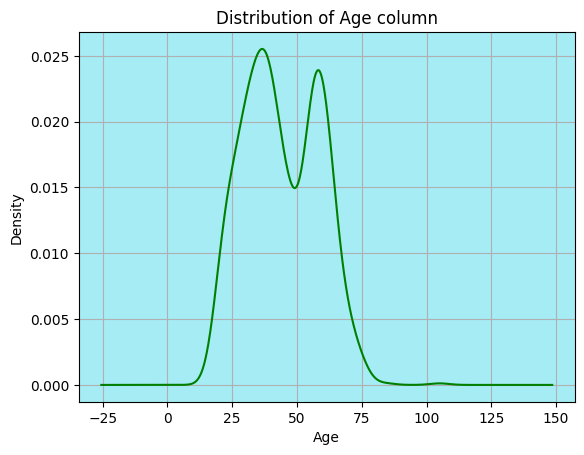

In [26]:
# Check the distribution(KDE Plot)
df_numerical.Age.plot(kind='kde', color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Distribution of Age column')
plt.xlabel('Age')
plt.grid()
plt.show()

**INTERPRETATION**
 - Minimum age of the person going for vacation is 18 and maximum is 105
 - Average age of the person going for vacation is 44.225
 - In visualization we can see multimodal data, mostly we have two age groups who are travelling those are 25 to 50 and 55 to 70

In [27]:
# Show the columns in the numerical data
df_numerical.columns

Index(['Age', 'Education', 'obligation_rating', 'NEP', 'vacation_behaviour'], dtype='object')

##### Education

In [28]:
# Show the minimum
df_numerical.Education.min()

np.float64(1.0)

In [29]:
# Show the maximum
df_numerical.Education.max()

np.float64(8.0)

In [30]:
# Show the average(mean)
round(df_numerical.Education.mean(), 3)

np.float64(4.884)

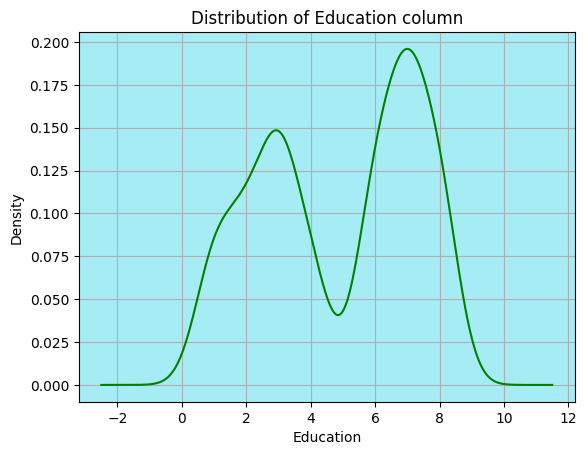

In [31]:
# Check the distribution(KDE Plot)
df_numerical.Education.plot(kind='kde', color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Distribution of Education column')
plt.xlabel('Education')
plt.grid()
plt.show()

**INTERPRETATION**
 - Minimum Education Of The Person Who Is Going To Vacation Is 1.000 .
 - Maximum Education Of The Person Who Is Going To Vacation Is 8.000 .
 - Average Education Of The Person Who Is Going To Vacation Is 4.884 .
 - In Visualization We See The Multi-Modal Data.(By Two Peak Values)
 - Mostly We Have Two Education Groups Who Are Traveling, Those Are From 2-4 & 6-8.

##### obligation_rating

In [32]:
# Show the minimum
df_numerical.obligation_rating.min()

np.float64(1.0)

In [33]:
# Show the maximum
df_numerical.obligation_rating.max()

np.float64(5.0)

In [34]:
# Show the average(mean)
round(df_numerical.obligation_rating.mean(), 3)

np.float64(3.735)

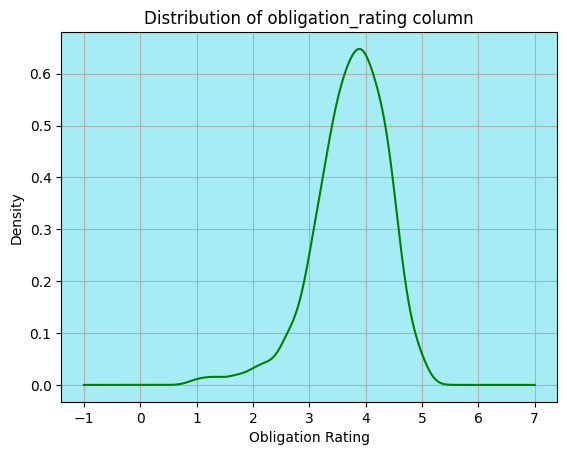

In [35]:
# Check the distribution(KDE Plot)
df_numerical.obligation_rating.plot(kind='kde', color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Distribution of obligation_rating column')
plt.xlabel('Obligation Rating')
plt.grid()
plt.show()

**INTERPRETATION**
 - Minimum Obligation_Rating Of The Person Who Is Going To Vacation Is 1.000 .
 - Maximum Obligation_Rating Of The Person Who Is Going To Vacation Is 5.000 .
 - Average Obligation_Rating Of The Person Who Is Going To Vacation Is 3.735 .
 - In Visualization We See The Multi-Modal Data.(By One Peak Values)
 - Mostly We Have One Obligation_Rating Groups Who Are Traveling, Those Are From 3.0 to 4.6.

##### NEP

In [36]:
# Show the minimum
df_numerical.NEP.min()

np.float64(1.73)

In [37]:
# Show the maximum
df_numerical.NEP.max()

np.float64(5.0)

In [38]:
# Show the average(mean)
round(df_numerical.NEP.mean(), 3)

np.float64(3.647)

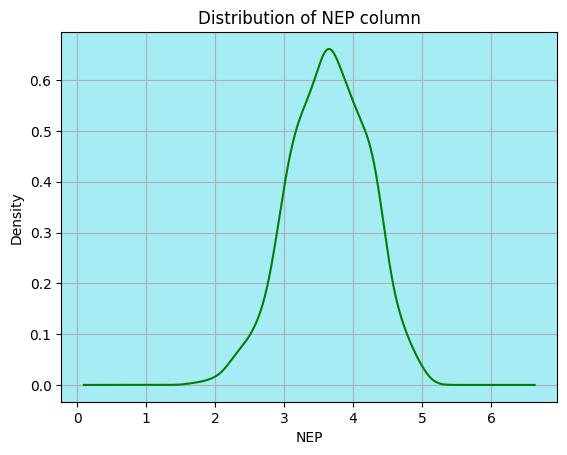

In [39]:
# Check the distribution(KDE Plot)
df_numerical.NEP.plot(kind='kde', color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Distribution of NEP column')
plt.xlabel('NEP')
plt.grid()
plt.show()

**INTERPRETATION**
 - Minimum NEP Of The Person Who Is Going To Vacation Is 1.733 .
 - Maximum NEP Of The Person Who Is Going To Vacation Is 5.000 .
 - Average NEP Of The Person Who Is Going To Vacation Is 3.647 .
 - In Visualization We See The Multi-Modal Data.(By One Peak Values)
 - Mostly We Have One NEP Groups Who Are Traveling, Those Are From 3.0 to 4.3.

##### vacation_behaviour

In [40]:
# Show the minimum
df_numerical.vacation_behaviour.min()

np.float64(1.39)

In [41]:
# Show the maximum
df_numerical.vacation_behaviour.max()

np.float64(4.77)

In [42]:
# Show the average(mean)
round(df_numerical.vacation_behaviour.mean(), 3)

np.float64(2.962)

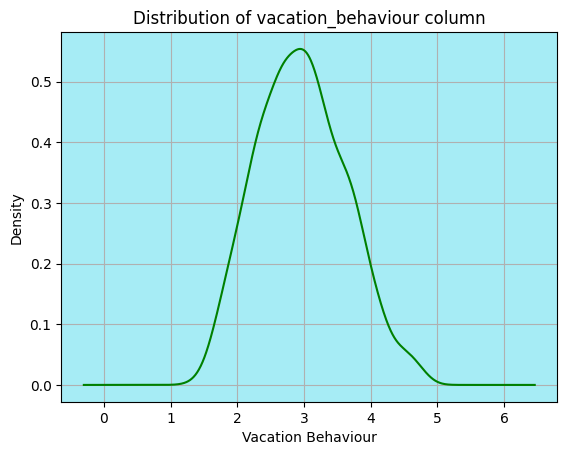

In [43]:
# Check the distribution(KDE Plot)
df_numerical.vacation_behaviour.plot(kind='kde', color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Distribution of vacation_behaviour column')
plt.xlabel('Vacation Behaviour')
plt.grid()
plt.show()

**INTERPRETATION**
 - Minimum Vacation_Behaviour Of The Person Who Is Going To Vacation Is 1.392 .
 - Maximum Vacation_Behaviour Of The Person Who Is Going To Vacation Is 4.766 .
 - Average Vacation_Behaviour Of The Person Who Is Going To Vacation Is 2.962 .
 - In Visualization We See The Multi-Modal Data.(By One Peak Values)
 - Mostly We Have One Vacation_Behaviour Groups Who Are Traveling, Those Are From 2-4.

### Univariate analysis on categorical data

In [44]:
# Show the first five observations of categorical data
df_categorical.head()

Gender                  Occupation State relationship_status  \
0  Female  Clerical or service worker   VIC              single   
1  Female                professional    WA             married   
3  Female                  unemployed   NSW              single   
4    Male                     retired    WA             married   
5  Female                     retired   QLD             married   

  obligation_category rest_and_relax luxury_or_be_spoilt do_sports  \
0                  Q4            yes                  no        no   
1                  Q1            yes                 yes        no   
3                  Q1            yes                 yes        no   
4                  Q2            yes                  no        no   
5                  Q4            yes                  no        no   

  excitement_and_challenge not_exceed_planned_budget  ...  \
0                       no                        no  ...   
1                       no                        no  ...   
3                       no                       yes  ...   
4                       no                       yes  ...   
5                       no                       yes  ...   

  entertainment_facilities not_care_about_prices  \
0                       no                    no   
1                       no                    no   
3                      yes                    no   
4                       no                    no   
5                       no                    no   

  life_style_of_the_local_people intense_experience_of_nature  \
0                             no                           no   
1                            yes                           no   
3                             no                          yes   
4                            yes                           no   
5                             no                           no   

  cosiness/familiar_atmosphere maintain_unspoilt_surroundings  \
0                           no                             no   
1                           no                             no   
3                           no                             no   
4                           no                            yes   
5                          yes                             no   

  everything_organised unspoilt_nature/natural_landscape cultural_offers  \
0                   no                                no              no   
1                   no                                no              no   
3                   no                                no              no   
4                   no                                no              no   
5                   no                                no              no   

  change_of_surroundings  
0                     no  
1                    yes  
3                    yes  
4                     no  
5                     no  

[5 rows x 25 columns]

In [45]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### Gender

In [46]:
# Show the count
df_categorical.Gender.value_counts()

Gender
Male      482
Female    430
Name: count, dtype: int64

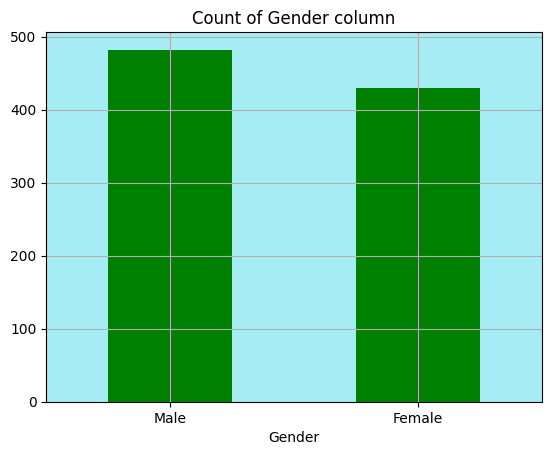

In [47]:
# Create a visualization
df_categorical.Gender.value_counts().plot(kind='bar', color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Count of Gender column')
plt.xlabel('Gender')
plt.grid()
plt.xticks(rotation=0)
plt.show()

**INTERPRETATION**
 - In Gender column we have 482 Male and 430 Female.
 - It represent quite balanced data

In [48]:
# Show the columns present in the categorical dataframe
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### Occupation

In [49]:
# Show the count
df_categorical.Occupation.value_counts()

Occupation
professional                  253
manager or administrator      180
Clerical or service worker     99
retired                        87
home-duties                    75
sales                          61
small business owner           56
unemployed                     35
tradesperson                   27
transport worker               20
labourer                       19
Name: count, dtype: int64

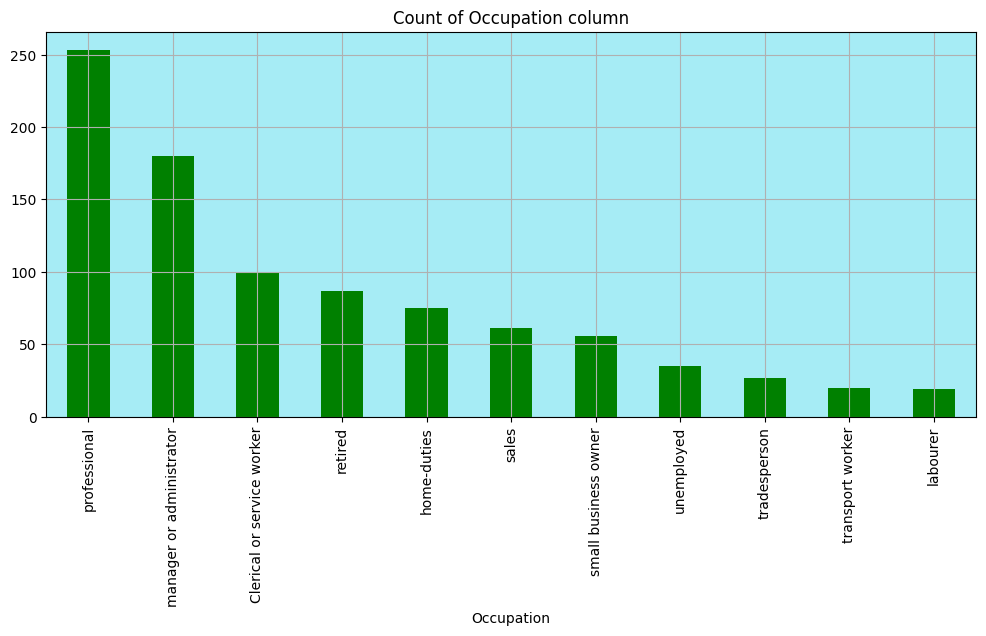

In [50]:
# Create a visualization
df_categorical.Occupation.value_counts().plot(kind='bar', color=graph_color, figsize=(12,5))
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Count of Occupation column')
plt.xlabel('Occupation')
plt.grid()
plt.show()

**INTERPRETATION**
 - In this data Professional and manager of administrator are dominating that we can see in the graph
 - As per the labourer and transport worker contributing least in the data

In [51]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### State

In [52]:
# Show the count
df_categorical.State.value_counts()

State
NSW    298
VIC    245
QLD    186
WA      81
SA      63
ACT     21
Tas     12
NT       6
Name: count, dtype: int64

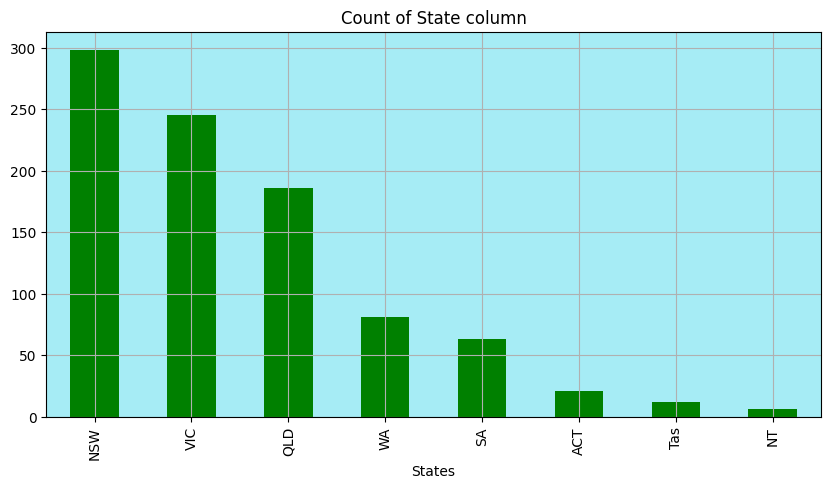

In [53]:
# Create a visualization
df_categorical.State.value_counts().plot(kind='bar', color=graph_color, figsize=(10,5))
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Count of State column')
plt.xlabel('States')
plt.grid()
plt.show()

**INTERPRETATION**
 - In this data NSW, VIC and QLD are dominating that we can see in the graph
 - As per the data NT, Tas and ACT are contributing least

In [54]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### relationship_status

In [55]:
# Show the count
df_categorical.relationship_status.value_counts()

relationship_status
married                  481
single                   191
living with a partner    133
separated or divorced     95
widowed                   12
Name: count, dtype: int64

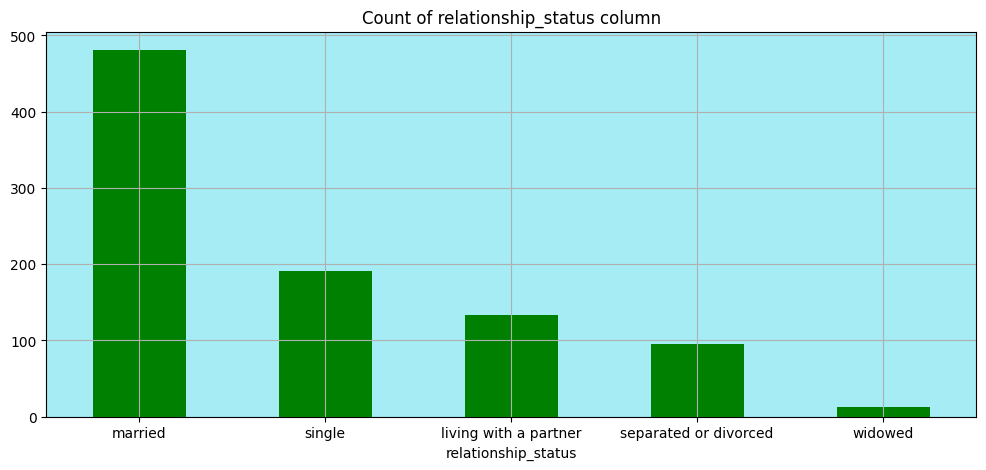

In [56]:
# Create a visualization
df_categorical.relationship_status.value_counts().plot(kind='bar', color=graph_color, figsize=(12,5))
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Count of relationship_status column')
plt.xlabel('relationship_status')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - As per the data, Mostly married people goes for vacation
 - As per the data, widowed people prefer less to go for vacation

In [57]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### obligation_category

In [58]:
# Show the count
df_categorical.obligation_category.value_counts()

obligation_category
Q2    238
Q3    231
Q1    226
Q4    217
Name: count, dtype: int64

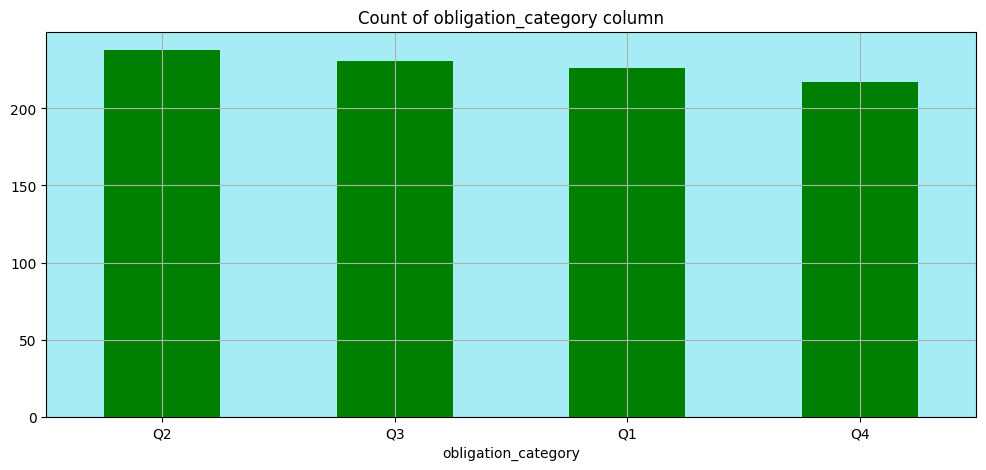

In [59]:
# Create a visualization
df_categorical.obligation_category.value_counts().plot(kind='bar', color=graph_color, figsize=(12,5))
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Count of obligation_category column')
plt.xlabel('obligation_category')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - Data is balanced

In [60]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### rest_and_relax

In [61]:
# Show the count
df_categorical.rest_and_relax.value_counts()

rest_and_relax
yes    825
no      87
Name: count, dtype: int64

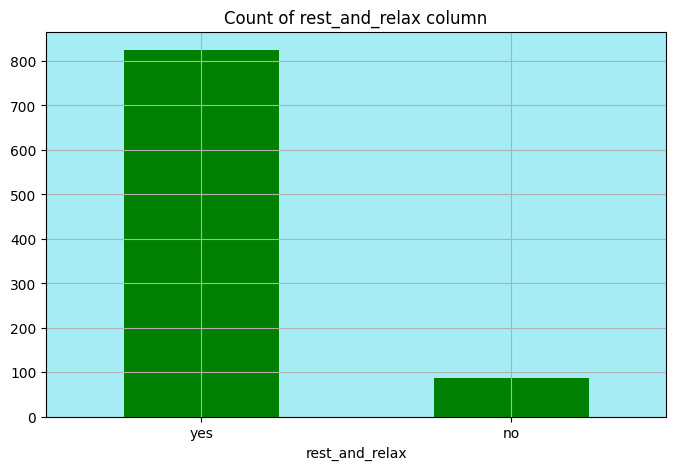

In [62]:
# Create a visualization
df_categorical.rest_and_relax.value_counts().plot(kind='bar', color=graph_color, figsize=(8,5))
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Count of rest_and_relax column')
plt.xlabel('rest_and_relax')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - Data is imbalanced
 - In this data, 825 are good for 'rest and relax' remaining are not good. 
 - Most places are good for rest and relax

In [63]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### luxury_or_be_spoilt

In [64]:
# Show the count
df_categorical.luxury_or_be_spoilt.value_counts()

luxury_or_be_spoilt
no     659
yes    253
Name: count, dtype: int64

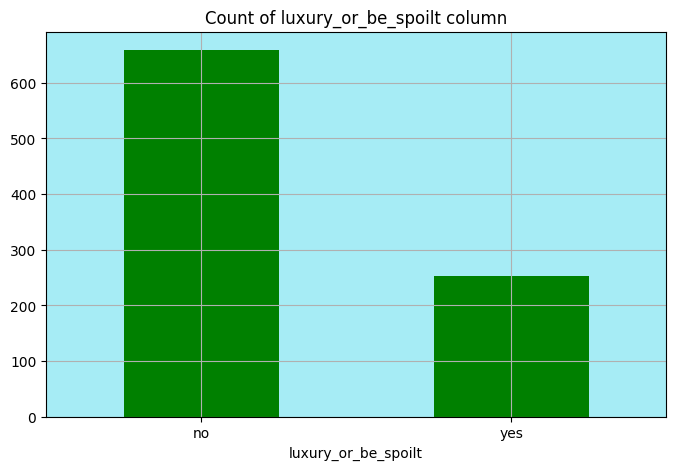

In [65]:
# Create a visualization
df_categorical.luxury_or_be_spoilt.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of luxury_or_be_spoilt column')
plt.xlabel('luxury_or_be_spoilt')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - Data is imbalanced
 - In this data, 254 are good for 'luxury or be sploit' and remaining are not. 

In [66]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### do_sports

In [67]:
# Show the count
df_categorical.do_sports.value_counts()

do_sports
no     784
yes    128
Name: count, dtype: int64

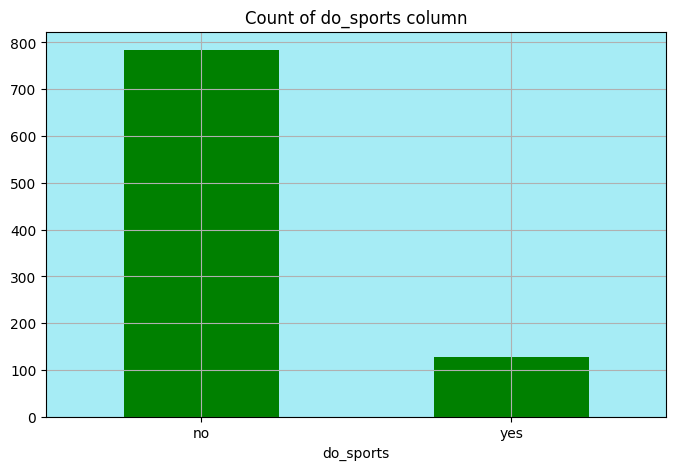

In [68]:
# Create a visualization
df_categorical.do_sports.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of do_sports column')
plt.xlabel('do_sports')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - Data is imbalanced
 - In this data, most of the people don't want to do sports 

In [69]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### excitement_and_challenge

In [70]:
# Show the count
df_categorical.excitement_and_challenge.value_counts()

excitement_and_challenge
no     601
yes    311
Name: count, dtype: int64

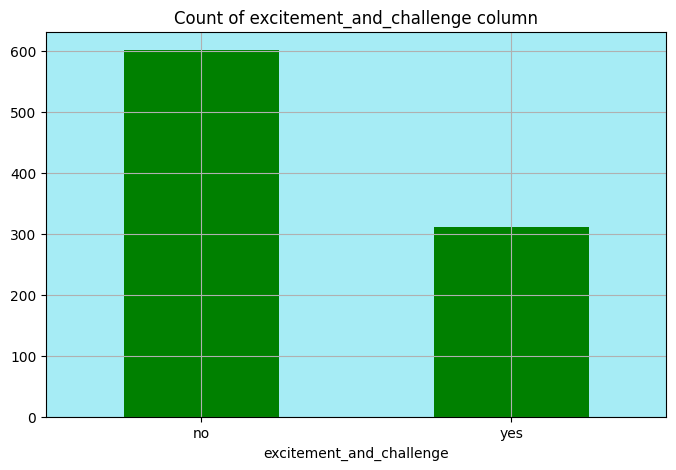

In [71]:
# Create a visualization
df_categorical.excitement_and_challenge.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of excitement_and_challenge column')
plt.xlabel('excitement_and_challenge')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - Most peoples are not excited for challanges
 - In this data, there are 601 'No' and 311 'Yes'

In [72]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### not_exceed_planned_budget

In [73]:
# Show the count
df_categorical.not_exceed_planned_budget.value_counts()

not_exceed_planned_budget
yes    470
no     442
Name: count, dtype: int64

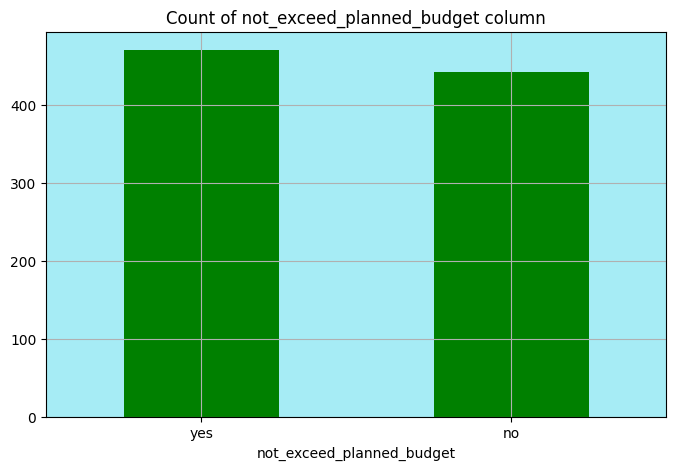

In [74]:
# Create a visualization
df_categorical.not_exceed_planned_budget.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of not_exceed_planned_budget column')
plt.xlabel('not_exceed_planned_budget')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is quite balanced
 - Almost same no of people exceeded and not exceeded the budget

In [75]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### realise_creativity

In [76]:
# Show the count
df_categorical.realise_creativity.value_counts()

realise_creativity
no     840
yes     72
Name: count, dtype: int64

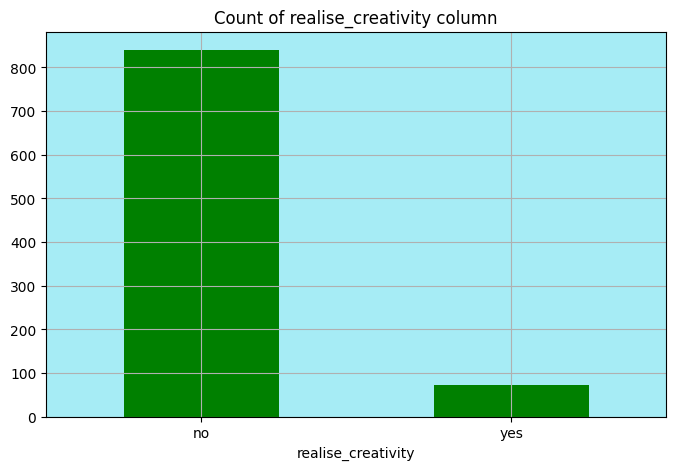

In [77]:
# Create a visualization
df_categorical.realise_creativity.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of realise_creativity column')
plt.xlabel('realise_creativity')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is imbalanced
 - As per the data, Less number of people realized creativity 

In [78]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### fun_and_entertainment

In [79]:
# Show the count
df_categorical.fun_and_entertainment.value_counts()

fun_and_entertainment
yes    490
no     422
Name: count, dtype: int64

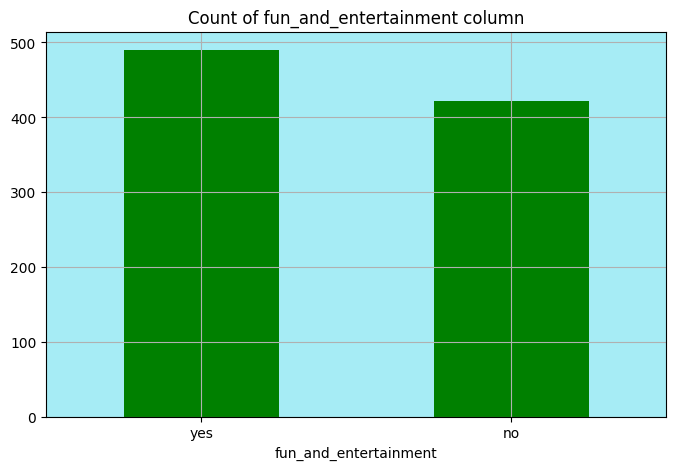

In [80]:
# Create a visualization
df_categorical.fun_and_entertainment.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of fun_and_entertainment column')
plt.xlabel('fun_and_entertainment')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is well-balanced, indicating a relatively even distribution across the categories.
 - A nearly equal number of people found vacations to be fun and entertaining, suggesting a consistent perception of enjoyment related to vacations.

In [81]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### good_company

In [82]:
# Show the count
df_categorical.good_company.value_counts()

good_company
no     483
yes    429
Name: count, dtype: int64

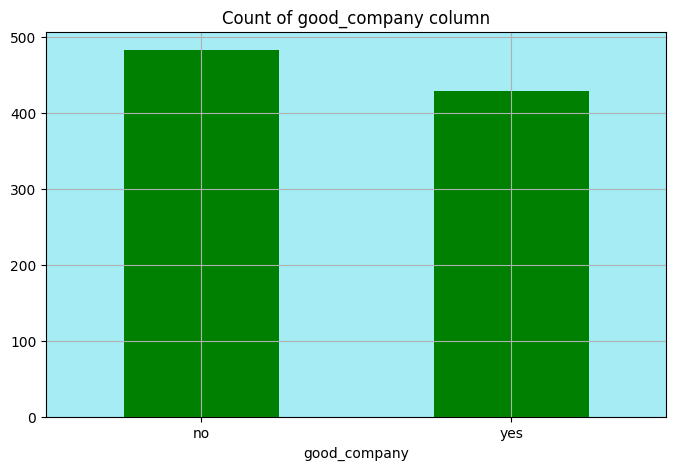

In [83]:
# Create a visualization
df_categorical.good_company.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of good_company column')
plt.xlabel('good_company')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is well-balanced, showing a fairly even distribution across the categories.
 - Nearly the same number of people reported good company as those who did not.

In [84]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### health_and_beauty

In [85]:
# Show the count
df_categorical.health_and_beauty.value_counts()

health_and_beauty
no     795
yes    117
Name: count, dtype: int64

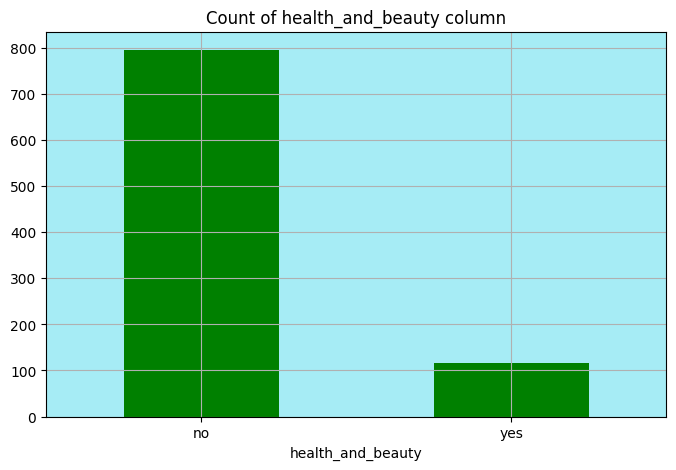

In [86]:
# Create a visualization
df_categorical.health_and_beauty.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of health_and_beauty column')
plt.xlabel('health_and_beauty')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is imbalanced.
 - As per the data, Most tourist doesn't focus on their health and beauty.

In [87]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### free_and_easy_going

In [88]:
# Show the count
df_categorical.free_and_easy_going.value_counts()

free_and_easy_going
yes    488
no     424
Name: count, dtype: int64

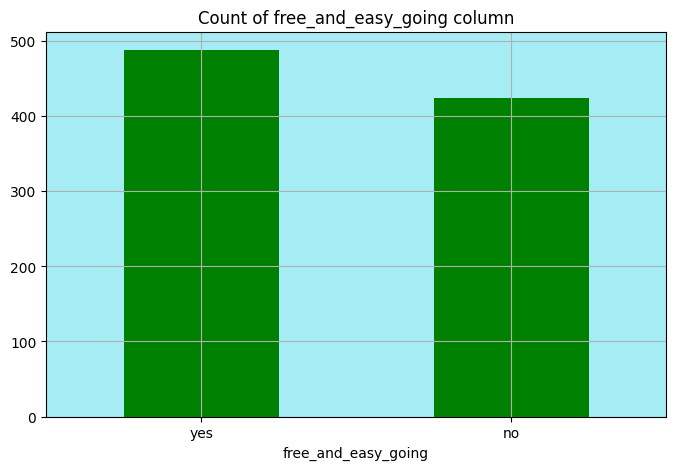

In [89]:
# Create a visualization
df_categorical.free_and_easy_going.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of free_and_easy_going column')
plt.xlabel('free_and_easy_going')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is quite balanced
 - Almost same number of people found their trip to be free and easygoing, while an almost equal number did not

In [90]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### entertainment_facilities

In [91]:
# Show the count
df_categorical.entertainment_facilities.value_counts()

entertainment_facilities
no     737
yes    175
Name: count, dtype: int64

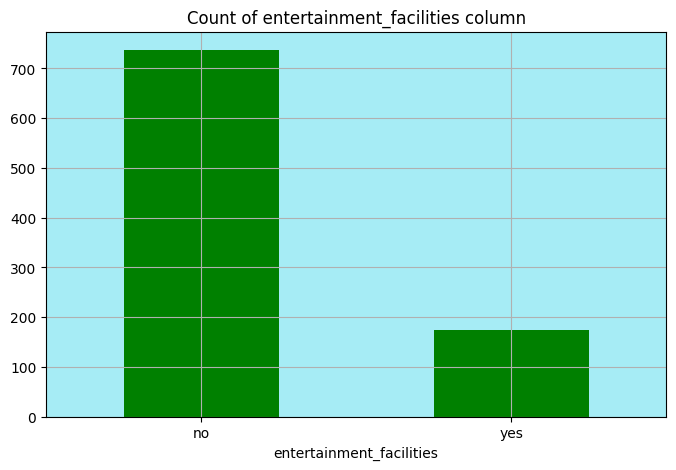

In [92]:
# Create a visualization
df_categorical.entertainment_facilities.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of entertainment_facilities column')
plt.xlabel('entertainment_facilities')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is imbalanced.
 - Most tourist felt that there is not good entertainment facilities.

In [93]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### not_care_about_prices

In [94]:
# Show the count
df_categorical.not_care_about_prices.value_counts()

not_care_about_prices
no     743
yes    169
Name: count, dtype: int64

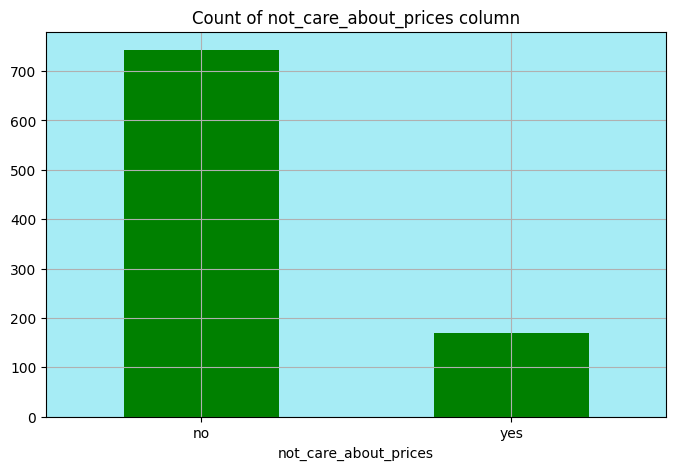

In [95]:
# Create a visualization
df_categorical.not_care_about_prices.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of not_care_about_prices column')
plt.xlabel('not_care_about_prices')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is imbalanced.
 - Most tourist don't care about the prices during their trip.

In [96]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### life_style_of_the_local_people

In [97]:
# Show the count
df_categorical.life_style_of_the_local_people.value_counts()

life_style_of_the_local_people
no     484
yes    428
Name: count, dtype: int64

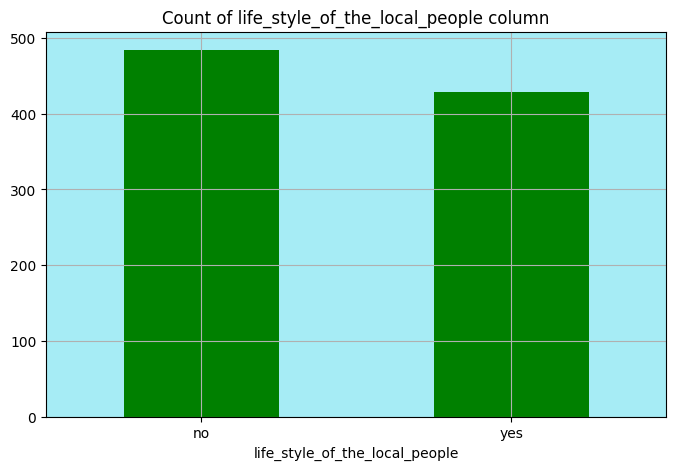

In [98]:
# Create a visualization
df_categorical.life_style_of_the_local_people.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of life_style_of_the_local_people column')
plt.xlabel('life_style_of_the_local_people')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is well-balanced
 - An almost equal number of tourists found the local lifestyle as good and not good.

In [99]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### intense_experience_of_nature

In [100]:
# Show the count
df_categorical.intense_experience_of_nature.value_counts()

intense_experience_of_nature
no     715
yes    197
Name: count, dtype: int64

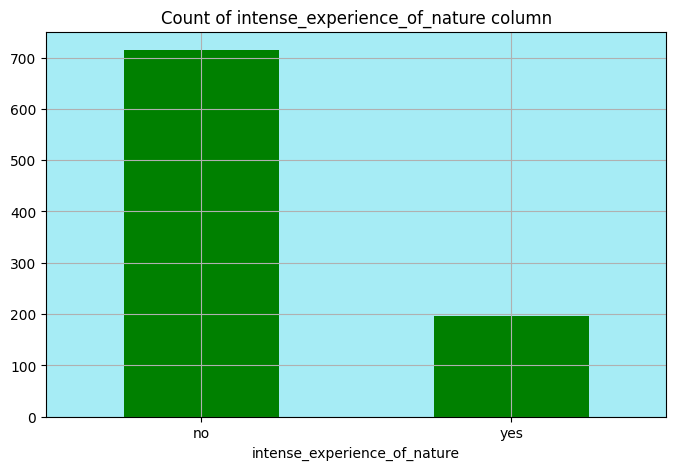

In [101]:
# Create a visualization
df_categorical.intense_experience_of_nature.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of intense_experience_of_nature column')
plt.xlabel('intense_experience_of_nature')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is imbalanced.
 - Most tourists didn't found intense experience of nature.

In [102]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### cosiness/familiar_atmosphere

In [103]:
# Show the count
df_categorical['cosiness/familiar_atmosphere'].value_counts()

cosiness/familiar_atmosphere
no     744
yes    168
Name: count, dtype: int64

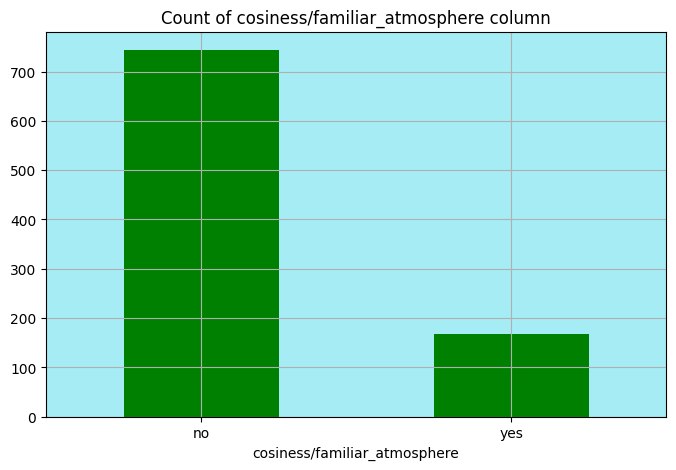

In [104]:
# Create a visualization
df_categorical['cosiness/familiar_atmosphere'].value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of cosiness/familiar_atmosphere column')
plt.xlabel('cosiness/familiar_atmosphere')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is imbalanced.
 - Most tourists do not feel cosiness or familiar atmosphere during their trip.

In [105]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### maintain_unspoilt_surroundings

In [106]:
# Show the count
df_categorical.maintain_unspoilt_surroundings.value_counts()

maintain_unspoilt_surroundings
no     631
yes    281
Name: count, dtype: int64

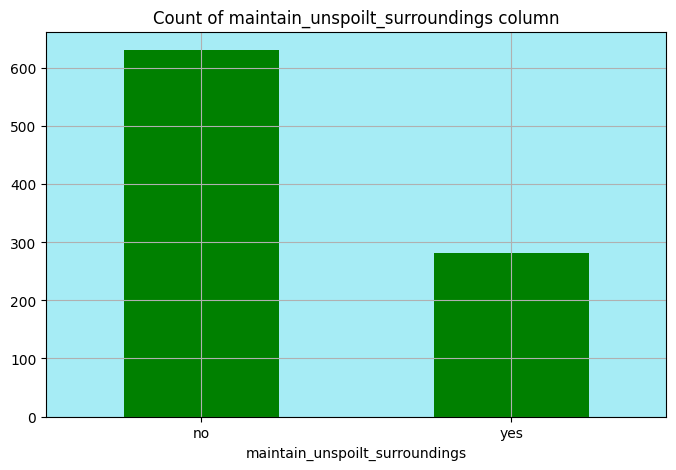

In [107]:
# Create a visualization
df_categorical.maintain_unspoilt_surroundings.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of maintain_unspoilt_surroundings column')
plt.xlabel('maintain_unspoilt_surroundings')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is imbalanced.
 - Majority of people don't find unsploit surroundings.

In [108]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### everything_organised

In [109]:
# Show the count
df_categorical.everything_organised.value_counts()

everything_organised
no     764
yes    148
Name: count, dtype: int64

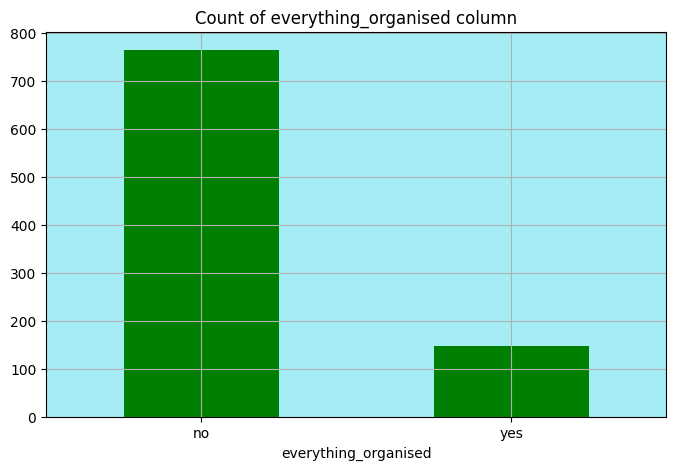

In [110]:
# Create a visualization
df_categorical.everything_organised.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of everything_organised column')
plt.xlabel('everything_organised')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is imbalanced
 - Most tourist do not organize everything.

In [111]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### unspoilt_nature/natural_landscape

In [112]:
# Show the count
df_categorical['unspoilt_nature/natural_landscape'].value_counts()

unspoilt_nature/natural_landscape
no     669
yes    243
Name: count, dtype: int64

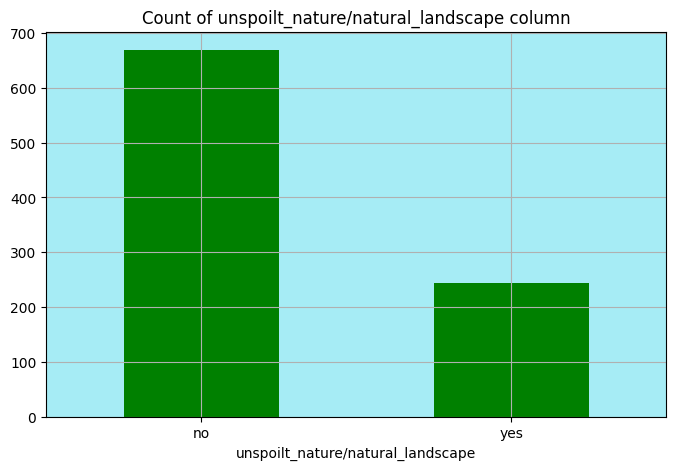

In [113]:
# Create a visualization
df_categorical['unspoilt_nature/natural_landscape'].value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of unspoilt_nature/natural_landscape column')
plt.xlabel('unspoilt_nature/natural_landscape')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is imbalanced.
 - Most tourist do not want to go unspoilt nature or natural landscape.

In [114]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

In [115]:
# Show the count
df_categorical.cultural_offers.value_counts()

cultural_offers
no     655
yes    257
Name: count, dtype: int64

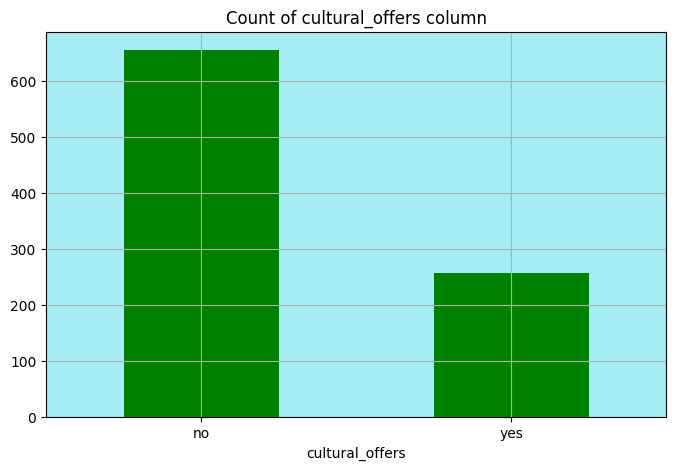

In [116]:
# Create a visualization
df_categorical.cultural_offers.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of cultural_offers column')
plt.xlabel('cultural_offers')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is imbalanced
 - Most tourists don't get cultural offers while travelling.

In [117]:
# Show the columns present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

##### change_of_surroundings

In [118]:
# Show the count
df_categorical.change_of_surroundings.value_counts()

change_of_surroundings
yes    623
no     289
Name: count, dtype: int64

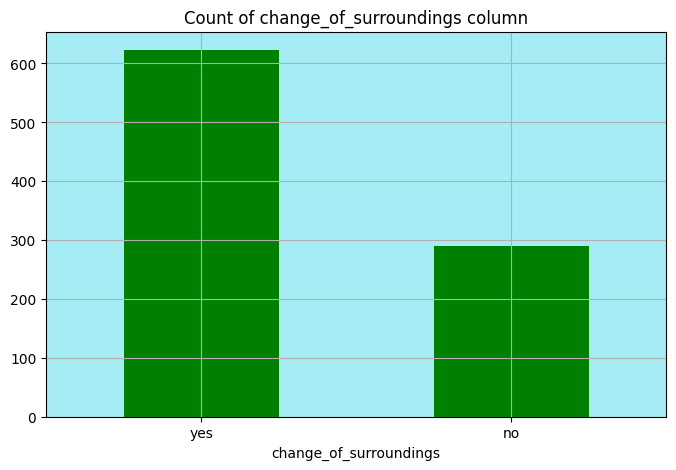

In [119]:
# Create a visualization
df_categorical.change_of_surroundings.value_counts().plot(kind='bar', color='green', figsize=(8,5))
ax = plt.gca()
ax.set_facecolor('#a6ecf5')
plt.title('Count of change_of_surroundings column')
plt.xlabel('change_of_surroundings')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**INTERPRETATION**
 - The data is imbalanced
 - Most tourists go for vacation to chaneg surroundings

## Bivaraiate Analysis

In [120]:
# Show first five records of the dataframe
df_vacations_data.head()

Gender  Age  Education                  Occupation State  \
0  Female   25        6.0  Clerical or service worker   VIC   
1  Female   31        8.0                professional    WA   
3  Female   18        2.0                  unemployed   NSW   
4    Male   61        3.0                     retired    WA   
5  Female   63        7.0                     retired   QLD   

  relationship_status  obligation_rating obligation_category   NEP  \
0              single               4.80                  Q4  3.20   
1             married               3.30                  Q1  3.40   
3              single               2.63                  Q1  3.40   
4             married               3.40                  Q2  3.73   
5             married               4.40                  Q4  4.27   

   vacation_behaviour  ... entertainment_facilities not_care_about_prices  \
0                2.07  ...                       no                    no   
1                2.00  ...                       no                    no   
3                2.17  ...                      yes                    no   
4                1.72  ...                       no                    no   
5                3.30  ...                       no                    no   

  life_style_of_the_local_people intense_experience_of_nature  \
0                             no                           no   
1                            yes                           no   
3                             no                          yes   
4                            yes                           no   
5                             no                           no   

  cosiness/familiar_atmosphere maintain_unspoilt_surroundings  \
0                           no                             no   
1                           no                             no   
3                           no                             no   
4                           no                            yes   
5                          yes                             no   

  everything_organised unspoilt_nature/natural_landscape cultural_offers  \
0                   no                                no              no   
1                   no                                no              no   
3                   no                                no              no   
4                   no                                no              no   
5                   no                                no              no   

  change_of_surroundings  
0                     no  
1                    yes  
3                    yes  
4                     no  
5                     no  

[5 rows x 30 columns]

In [121]:
# Step 1: Find the correlation matrix
df_numerical.corr()

Age  Education  obligation_rating       NEP  \
Age                 1.000000  -0.174054           0.125146  0.081328   
Education          -0.174054   1.000000          -0.066780 -0.034069   
obligation_rating   0.125146  -0.066780           1.000000  0.359040   
NEP                 0.081328  -0.034069           0.359040  1.000000   
vacation_behaviour  0.134643  -0.090449           0.519509  0.267017   

                    vacation_behaviour  
Age                           0.134643  
Education                    -0.090449  
obligation_rating             0.519509  
NEP                           0.267017  
vacation_behaviour            1.000000

**INTERPRETATION**
 - There is no such correlation between numerical variables in the given data
 
**NOTE**
 - Just for demonstration we are going to plot correlation between `obligation_rating` and `vacation_behaviour`

##### obligation_rating vs vacation_behaviour

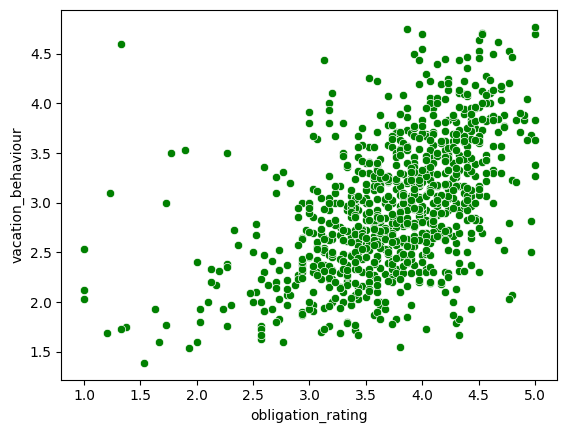

In [122]:
# Plot the scatter between given variables
sns.scatterplot(x=df_numerical.obligation_rating, y=df_numerical.vacation_behaviour, color=graph_color)
plt.show()

### Bivariate analysis on one numeric and one categorical variable

In [123]:
# Show the column present in categorical data frame
df_categorical.columns

Index(['Gender', 'Occupation', 'State', 'relationship_status',
       'obligation_category', 'rest_and_relax', 'luxury_or_be_spoilt',
       'do_sports', 'excitement_and_challenge', 'not_exceed_planned_budget',
       'realise_creativity', 'fun_and_entertainment', 'good_company',
       'health_and_beauty', 'free_and_easy_going', 'entertainment_facilities',
       'not_care_about_prices', 'life_style_of_the_local_people',
       'intense_experience_of_nature', 'cosiness/familiar_atmosphere',
       'maintain_unspoilt_surroundings', 'everything_organised',
       'unspoilt_nature/natural_landscape', 'cultural_offers',
       'change_of_surroundings'],
      dtype='object')

In [124]:
# Show the column present in numerical data frame
df_numerical.columns

Index(['Age', 'Education', 'obligation_rating', 'NEP', 'vacation_behaviour'], dtype='object')

#### Gender, Age

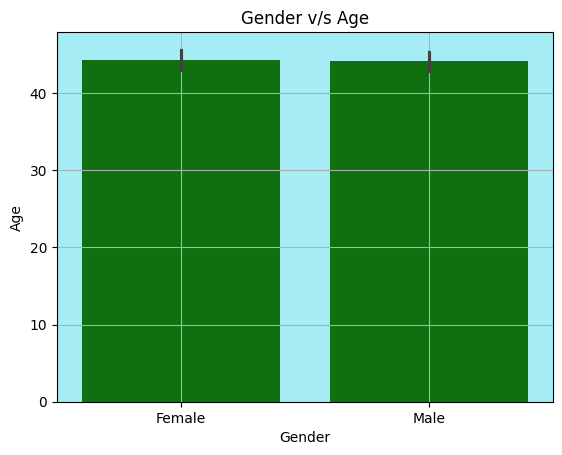

In [125]:
# Plot the barplot
sns.barplot(x='Gender', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Gender v/s Age')
plt.grid()
plt.show()

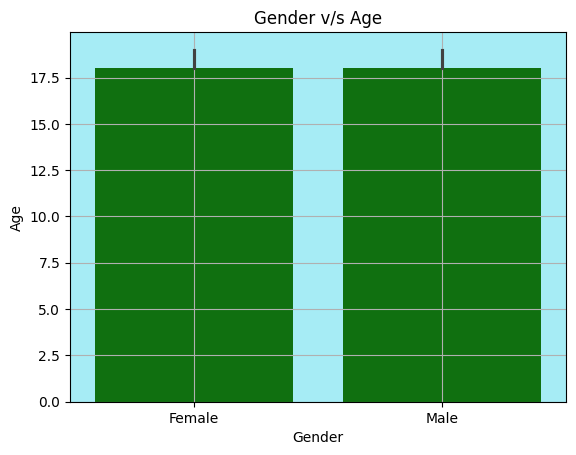

In [126]:
# Plot the barplot
sns.barplot(x='Gender', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Gender v/s Age')
plt.grid()
plt.show()

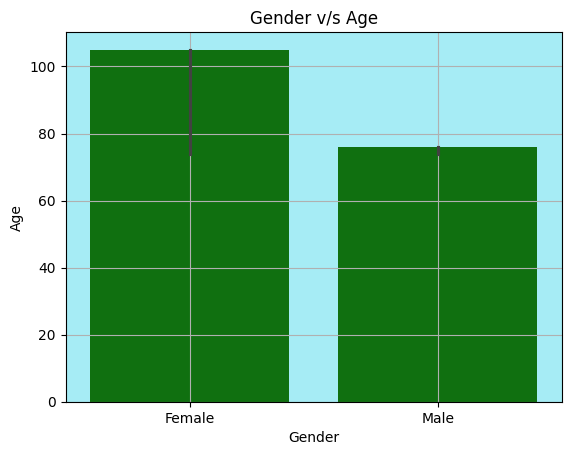

In [127]:
# Plot the barplot
sns.barplot(x='Gender', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Gender v/s Age')
plt.grid()
plt.show()

**INTERPRETATION**
 - In the data we can see that categories are balanced.
 - Minimum age by the gender is quite balanced but maximum age behaving quite unusual. 
 - Maximum age for female is more than 100 and the male age is less than 80.

#### Occupation, Age

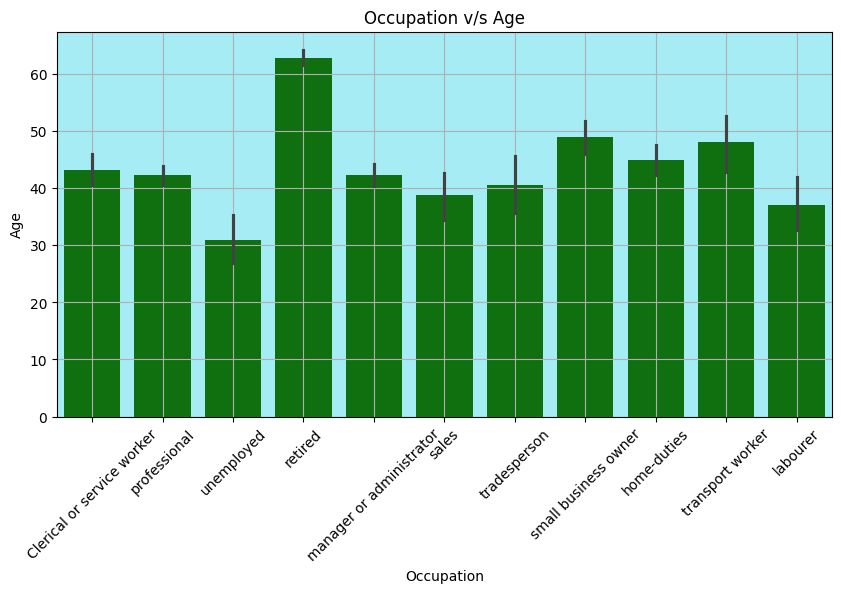

In [128]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='Occupation', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.xticks(rotation=45)
plt.title('Occupation v/s Age')
plt.grid()
plt.show()


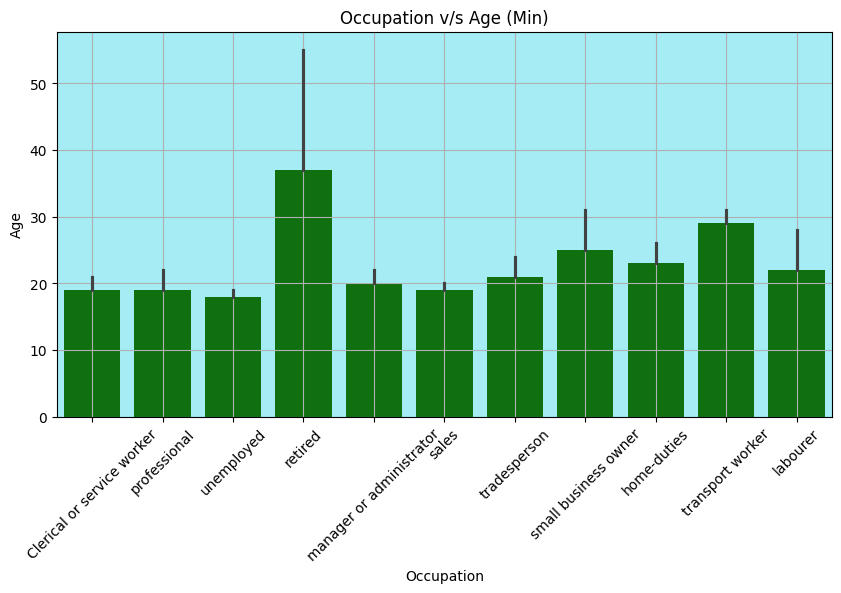

In [129]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='Occupation', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.xticks(rotation=45)
plt.title('Occupation v/s Age (Min)')
plt.grid()
plt.show()


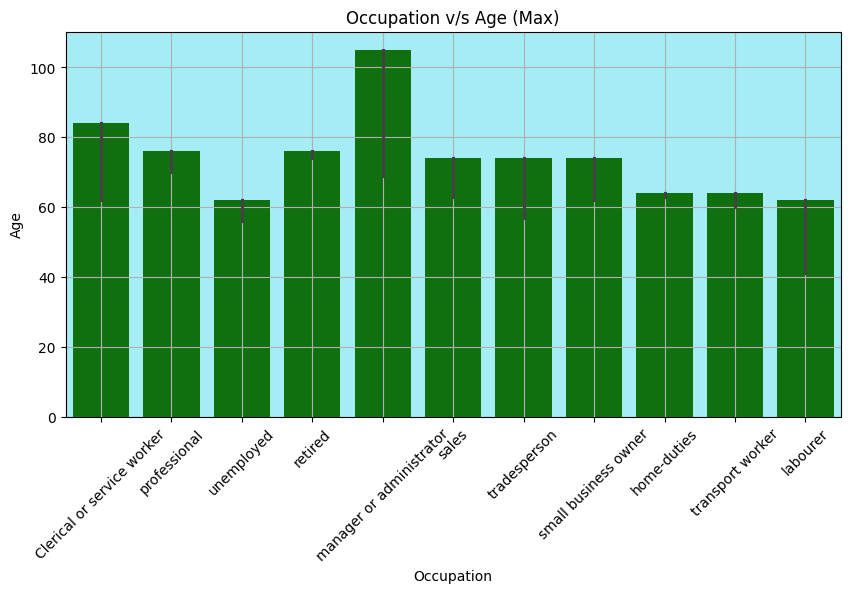

In [350]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='Occupation', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.xticks(rotation=45)
plt.title('Occupation v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are quite balanced
 - Minimum age by occupation for retired is greater than 30 and for Maximum age by occupation for manager and administrator is greater than 80.

#### State, Age

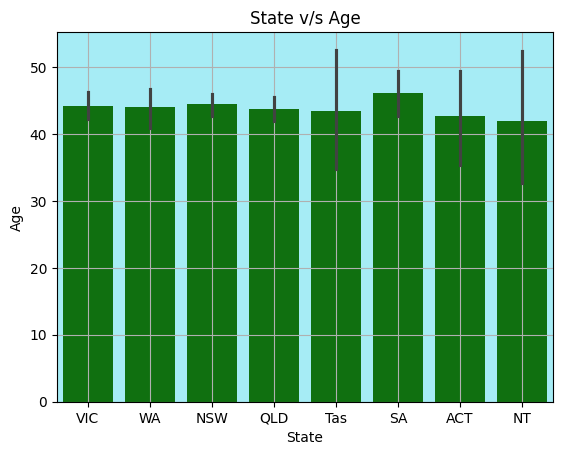

In [131]:
# Plot the barplot
sns.barplot(x='State', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('State v/s Age')
plt.grid()
plt.show()


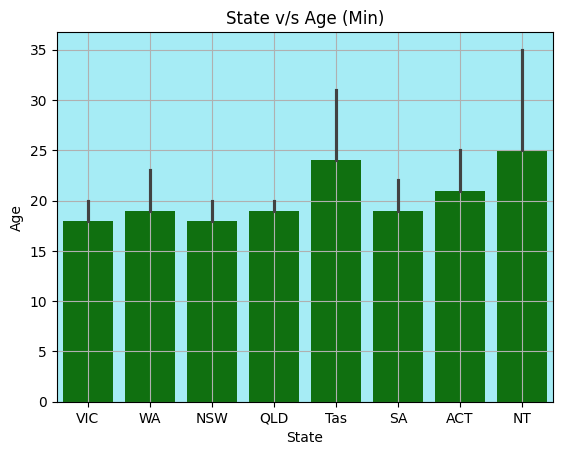

In [132]:
# Plot the barplot
sns.barplot(x='State', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('State v/s Age (Min)')
plt.grid()
plt.show()


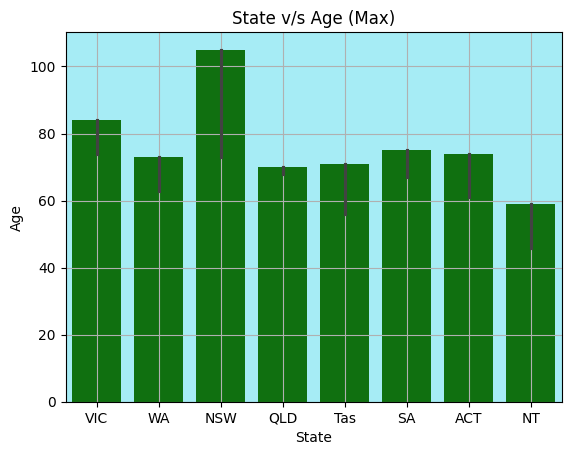

In [351]:
# Plot the barplot
sns.barplot(x='State', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('State v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are balanced
 - Maximum age by State for NSW is grater than 100 and Minimum age by state is quite balanced.

#### relationship_status, Age

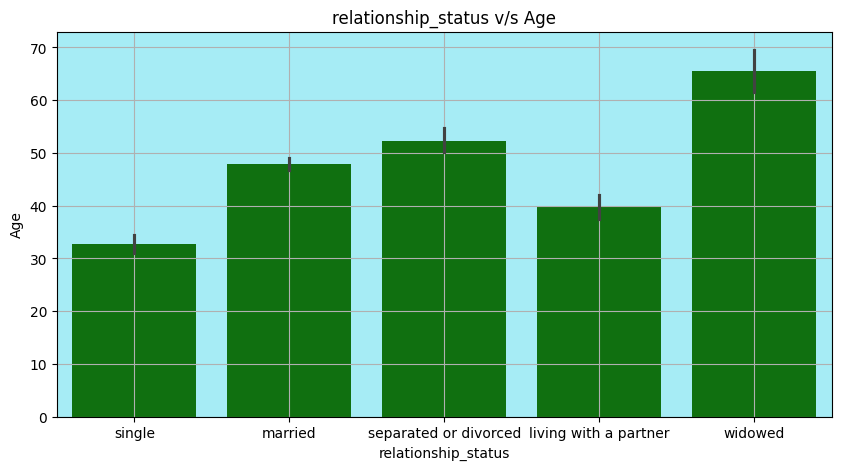

In [134]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='relationship_status', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('relationship_status v/s Age')
plt.grid()
plt.show()


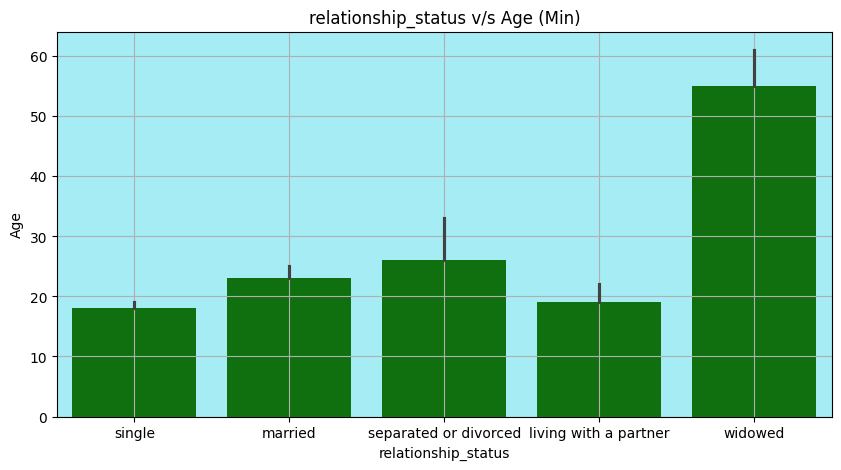

In [135]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='relationship_status', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('relationship_status v/s Age (Min)')
plt.grid()
plt.show()


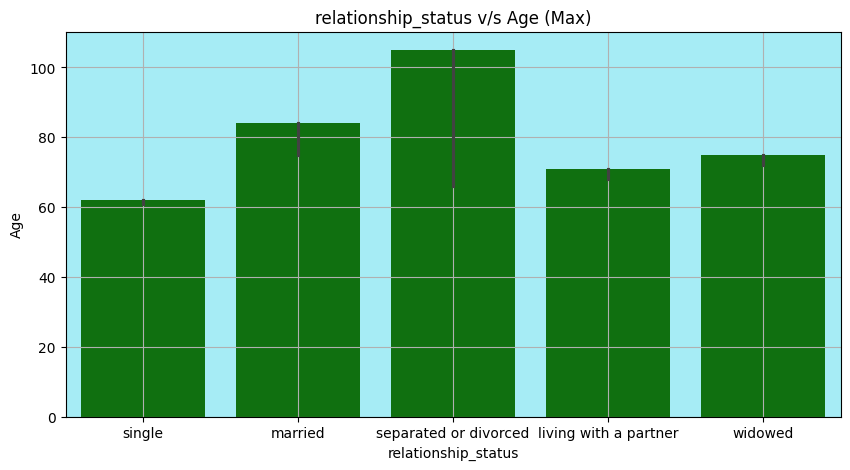

In [352]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='relationship_status', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('relationship_status v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are  quite balanced.
 - Minimum Age by Relationship_Status for widow greater than 50 and maximum Age behaving for separated or divorced greater than 100.m

#### obligation_category, Age

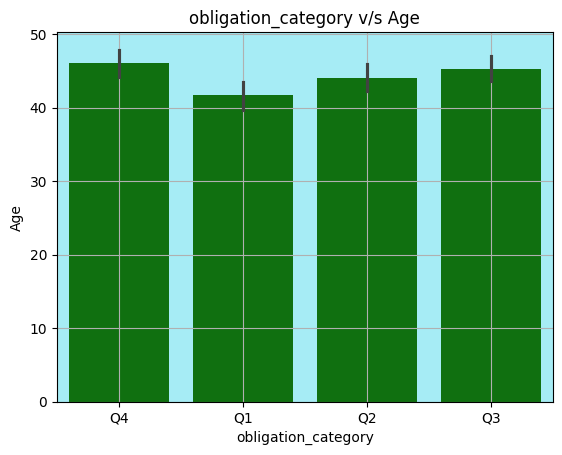

In [137]:
# Plot the barplot
sns.barplot(x='obligation_category', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('obligation_category v/s Age')
plt.grid()
plt.show()


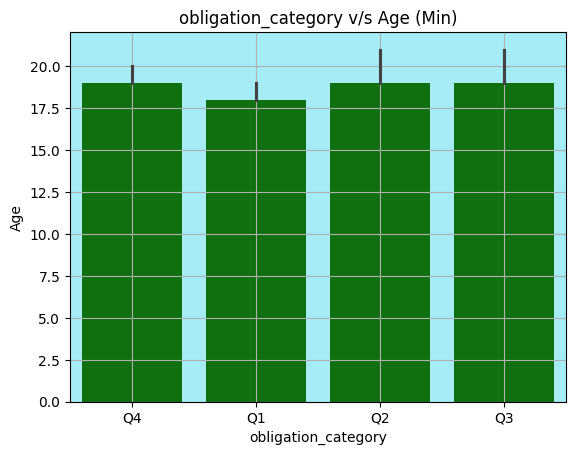

In [138]:
# Plot the barplot
sns.barplot(x='obligation_category', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('obligation_category v/s Age (Min)')
plt.grid()
plt.show()


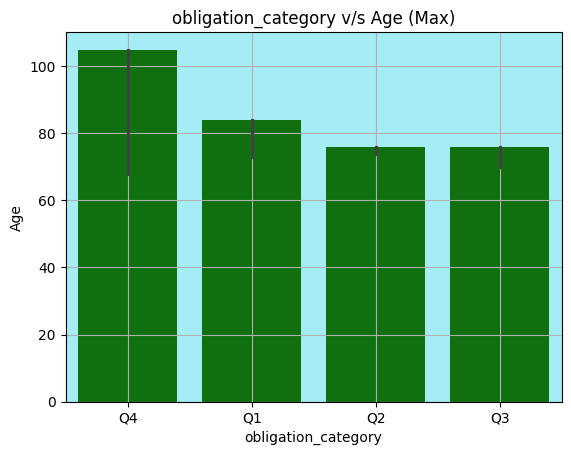

In [353]:
# Plot the barplot
sns.barplot(x='obligation_category', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('obligation_category v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are balanced
 - Minimum age by obligation is quite balanced but maximum Age behaving quite unusual,for Q4 obligation2 greater than 100.

#### rest_and_relax, Age

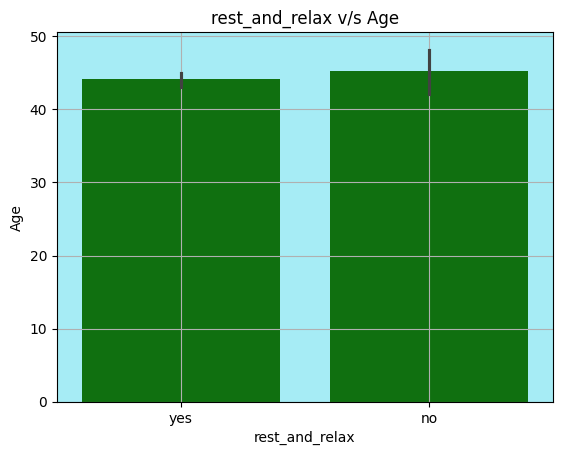

In [140]:
# Plot the barplot
sns.barplot(x='rest_and_relax', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('rest_and_relax v/s Age')
plt.grid()
plt.show()


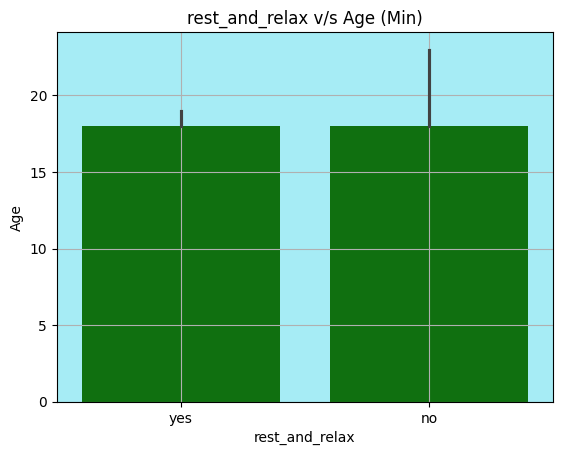

In [141]:
# Plot the barplot
sns.barplot(x='rest_and_relax', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('rest_and_relax v/s Age (Min)')
plt.grid()
plt.show()


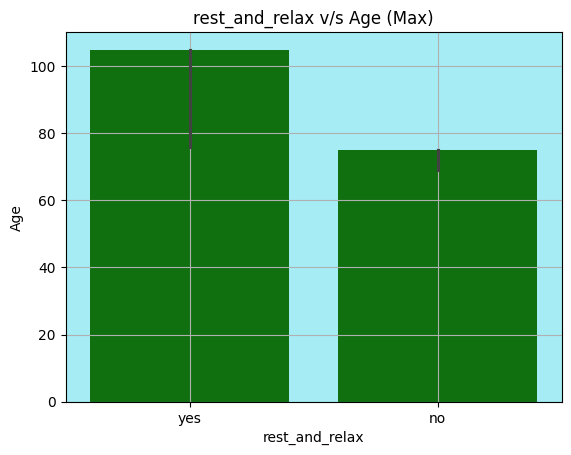

In [354]:
# Plot the barplot
sns.barplot(x='rest_and_relax', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('rest_and_relax v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are balanced
 - Minimum age by Rest and relax tourist is balanced but maximum age behaving quite unusual,go for rest and relax above 100  age and not going for rest and relax less than 80.

#### luxury_or_be_spoilt, Age

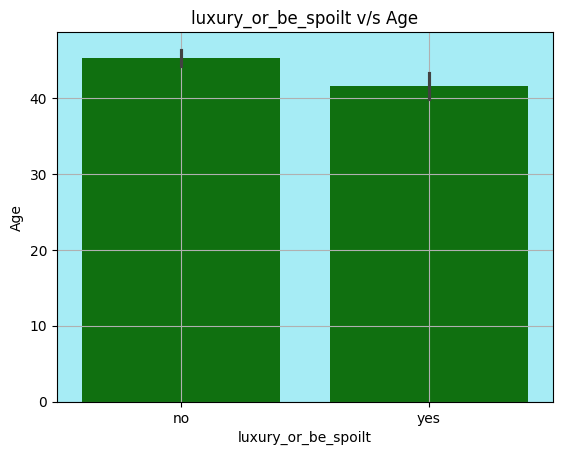

In [143]:
# Plot the barplot
sns.barplot(x='luxury_or_be_spoilt', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('luxury_or_be_spoilt v/s Age')
plt.grid()
plt.show()


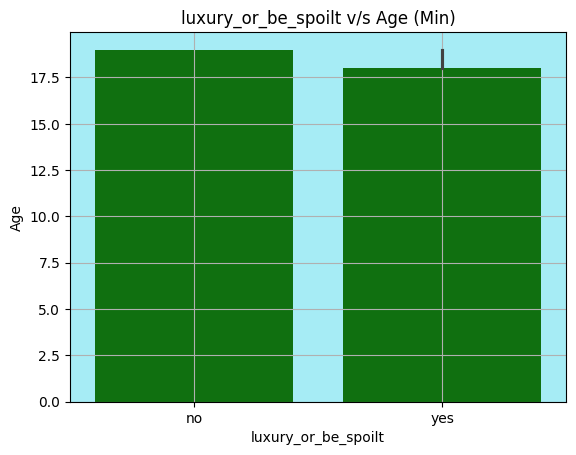

In [144]:
# Plot the barplot
sns.barplot(x='luxury_or_be_spoilt', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('luxury_or_be_spoilt v/s Age (Min)')
plt.grid()
plt.show()


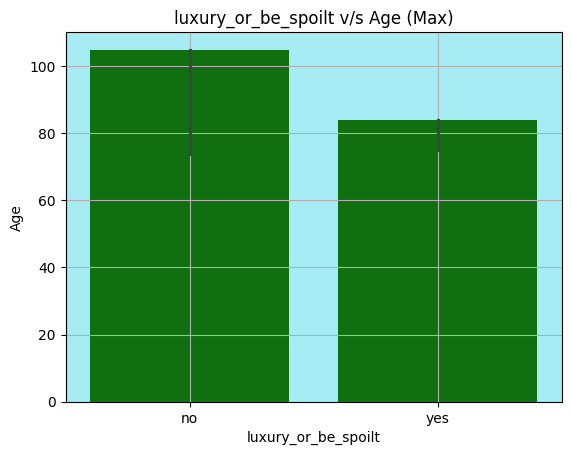

In [355]:
# Plot the barplot
sns.barplot(x='luxury_or_be_spoilt', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('luxury_or_be_spoilt v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are quite balanced

#### do_sports, Age

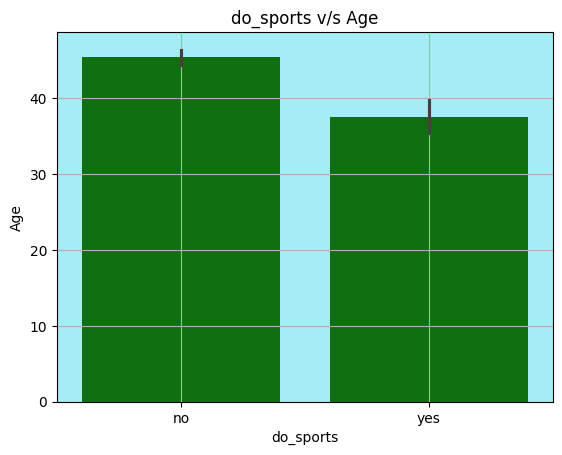

In [146]:
# Plot the barplot
sns.barplot(x='do_sports', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('do_sports v/s Age')
plt.grid()
plt.show()


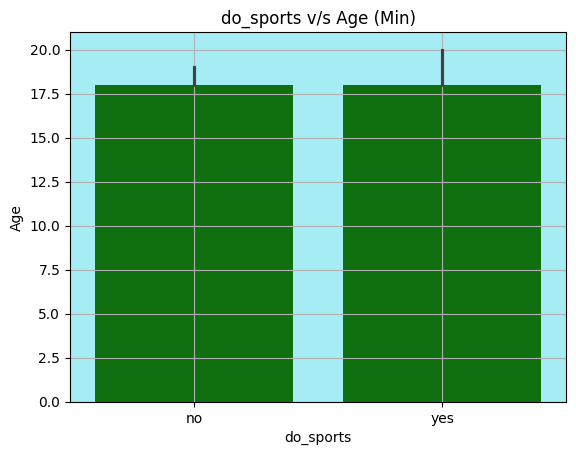

In [147]:
# Plot the barplot
sns.barplot(x='do_sports', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('do_sports v/s Age (Min)')
plt.grid()
plt.show()


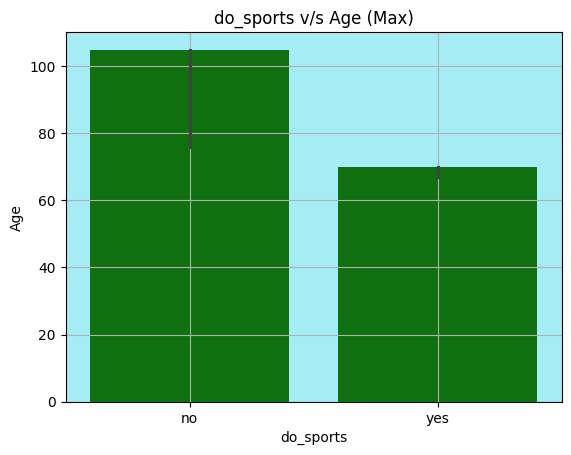

In [356]:
# Plot the barplot
sns.barplot(x='do_sports', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('do_sports v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
In the data we can see that categories are balanced
 - Minimum age by Doing sports is quite balanced but maximum Age behaving quite unusual,age for not doing sports greater than 100 and doing sports age is less than 80.

#### excitement_and_challenge, Age

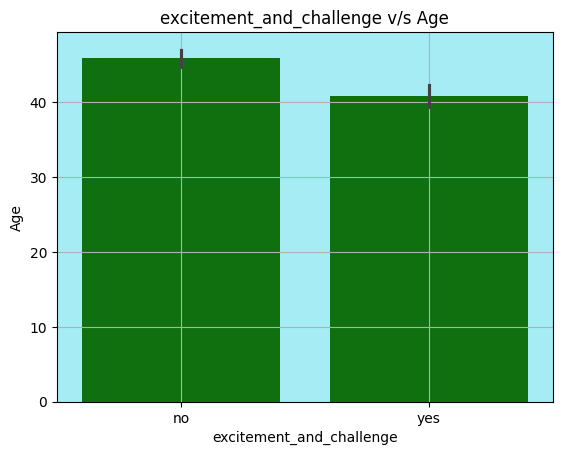

In [149]:
# Plot the barplot
sns.barplot(x='excitement_and_challenge', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('excitement_and_challenge v/s Age')
plt.grid()
plt.show()


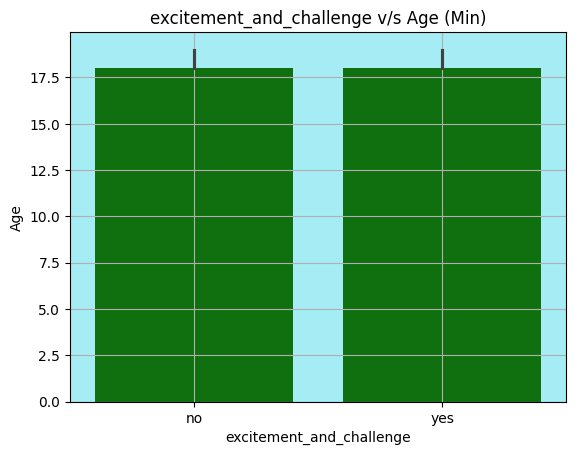

In [150]:
# Plot the barplot
sns.barplot(x='excitement_and_challenge', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('excitement_and_challenge v/s Age (Min)')
plt.grid()
plt.show()


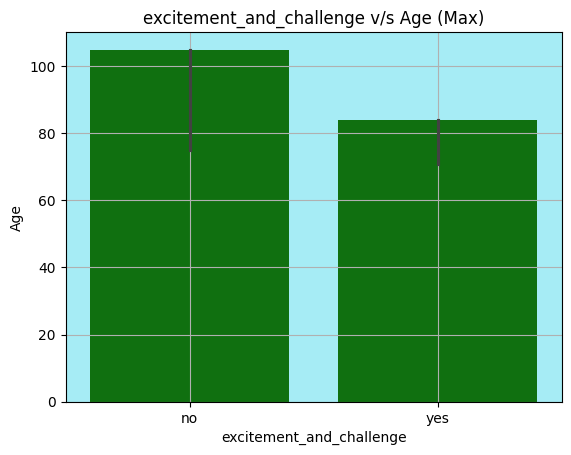

In [357]:
# Plot the barplot
sns.barplot(x='excitement_and_challenge', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('excitement_and_challenge v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are balanced
 - Minimum age for excitement for challange is quite balanced but maximum Age behaving quite unusual,age for the excitement for challange is greater than 100 and excitement for challange is less than 90.

#### not_exceed_planned_budget, Age

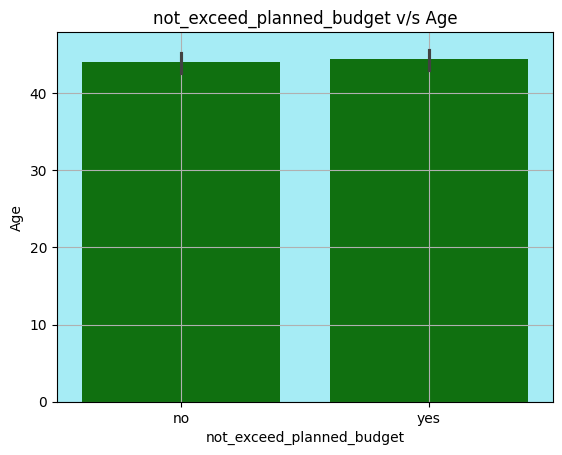

In [152]:
# Plot the barplot
sns.barplot(x='not_exceed_planned_budget', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_exceed_planned_budget v/s Age')
plt.grid()
plt.show()


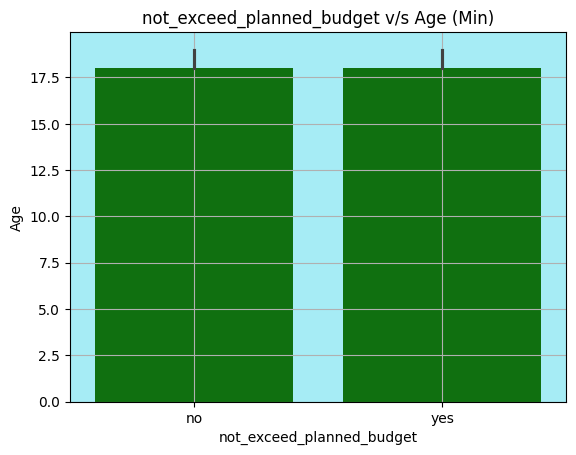

In [153]:
# Plot the barplot
sns.barplot(x='not_exceed_planned_budget', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_exceed_planned_budget v/s Age (Min)')
plt.grid()
plt.show()


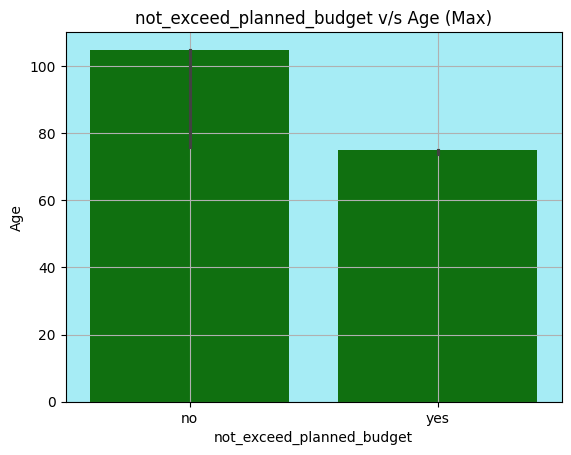

In [358]:
# Plot the barplot
sns.barplot(x='not_exceed_planned_budget', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_exceed_planned_budget v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are balanced
 - Minimum age for  not exceed planned budget is balanced but maximum Age behaving quite unusual,age for the not exceed planned budget is greater than 100 and  exceed planned budget is less than 90.

#### realise_creativity, Age

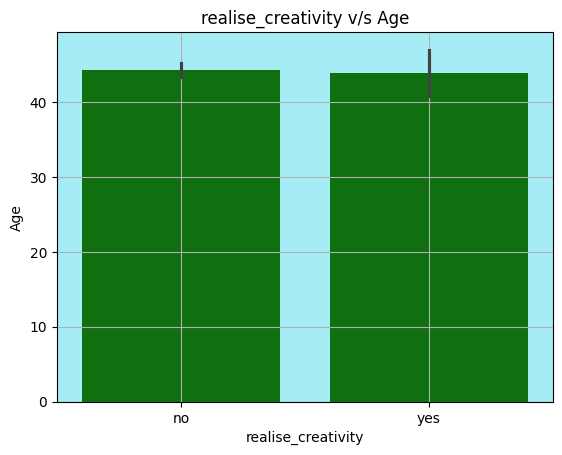

In [155]:
# Plot the barplot
sns.barplot(x='realise_creativity', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('realise_creativity v/s Age')
plt.grid()
plt.show()


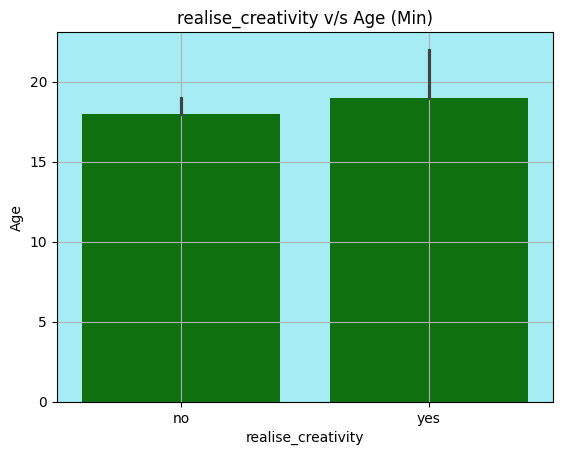

In [156]:
# Plot the barplot
sns.barplot(x='realise_creativity', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('realise_creativity v/s Age (Min)')
plt.grid()
plt.show()


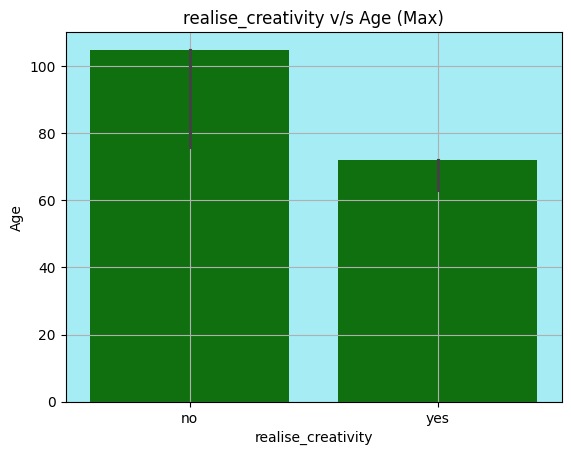

In [359]:
# Plot the barplot
sns.barplot(x='realise_creativity', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('realise_creativity v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are balanced
 - Minimum age for realise creativity is quite balanced but maximum Age behaving quite unusual,age for the  not realise creativity is greater than 100 and realise creativity is less than 80.

#### fun_and_entertainment, Age

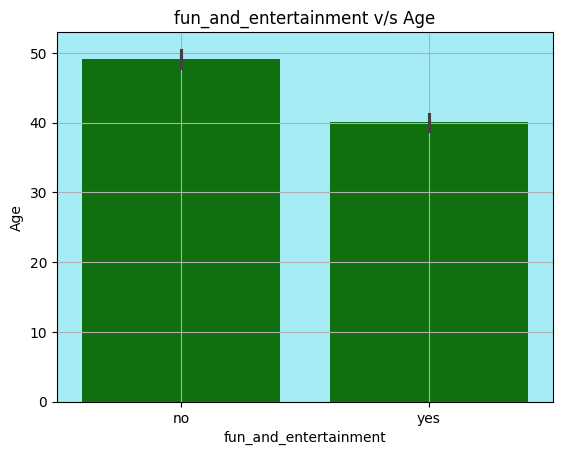

In [158]:
# Plot the barplot
sns.barplot(x='fun_and_entertainment', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('fun_and_entertainment v/s Age')
plt.grid()
plt.show()


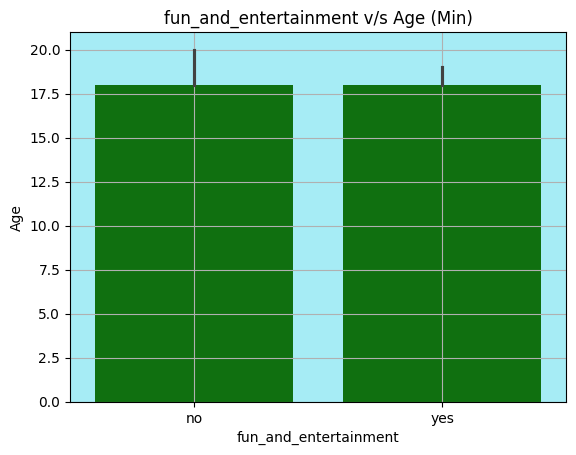

In [159]:
# Plot the barplot
sns.barplot(x='fun_and_entertainment', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('fun_and_entertainment v/s Age (Min)')
plt.grid()
plt.show()


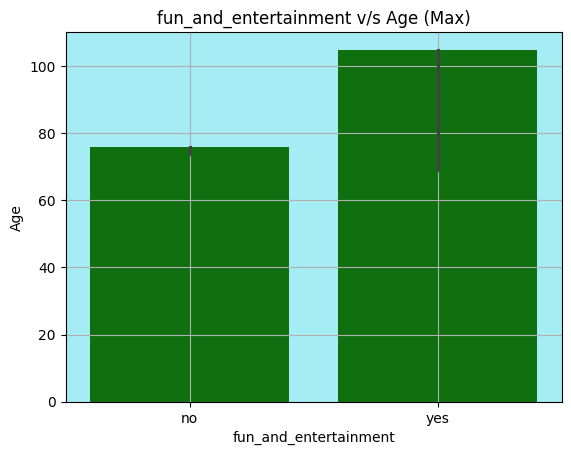

In [360]:
# Plot the barplot
sns.barplot(x='fun_and_entertainment', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('fun_and_entertainment v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are quite balanced
 - Minimum age for fun and entertainment is balanced but maximum Age behaving quite unusual,age not going for the fun and entertainment is less than 80 and going for fun and entertainment is greater than 100.

#### good_company, Age

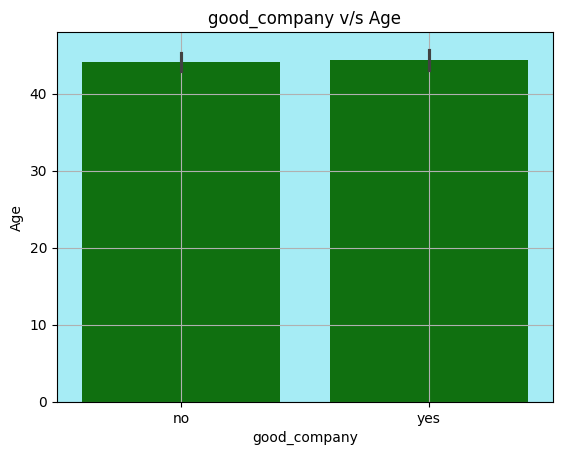

In [161]:
# Plot the barplot
sns.barplot(x='good_company', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('good_company v/s Age')
plt.grid()
plt.show()


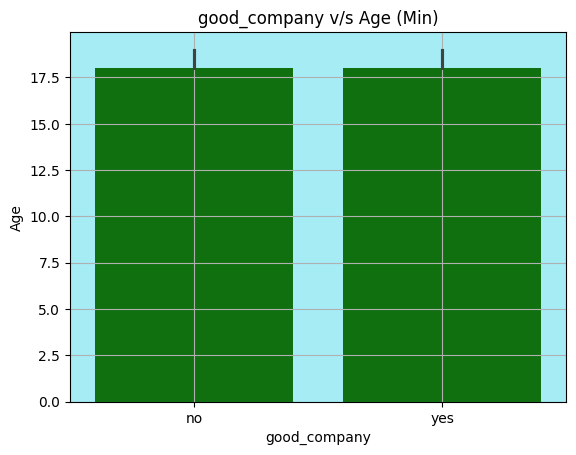

In [162]:
# Plot the barplot
sns.barplot(x='good_company', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('good_company v/s Age (Min)')
plt.grid()
plt.show()


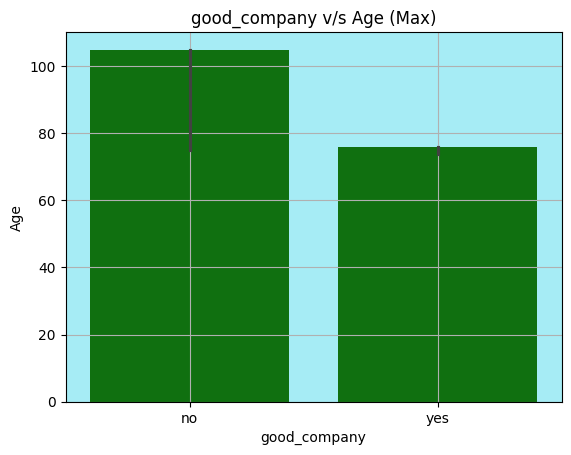

In [361]:
# Plot the barplot
sns.barplot(x='good_company', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('good_company v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are  balanced
 - Minimum age for Good_company is balanced but maximum Age behaving quite unusual,age not get the Good_company is greater than 100 and get a Good_company is less than 80.

#### health_and_beauty, Age

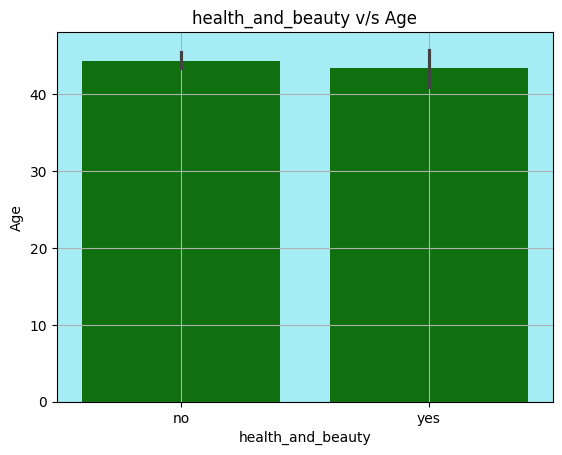

In [164]:
# Plot the barplot
sns.barplot(x='health_and_beauty', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('health_and_beauty v/s Age')
plt.grid()
plt.show()


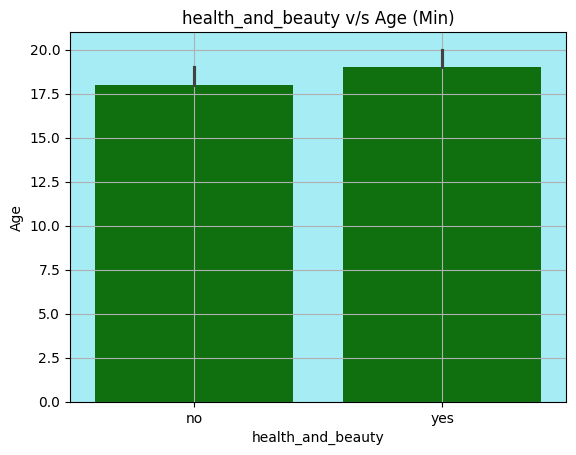

In [165]:
# Plot the barplot
sns.barplot(x='health_and_beauty', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('health_and_beauty v/s Age (Min)')
plt.grid()
plt.show()


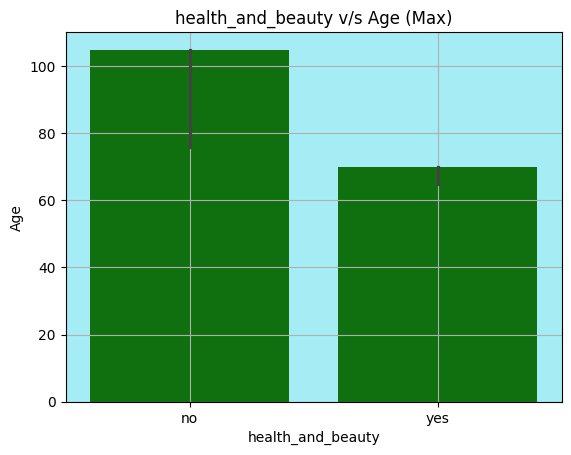

In [362]:
# Plot the barplot
sns.barplot(x='health_and_beauty', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('health_and_beauty v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are  balanced
 - Minimum age for Health_and_Beauty is balanced but maximum Age behaving quite unusual,age for not going for health_and_Beauty is greater than 100 and going for a Health_and_Beauty is less than 80.

#### free_and_easy_going, Age

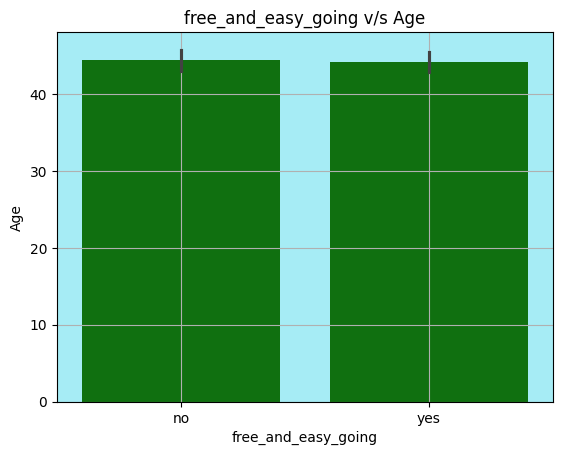

In [167]:
# Plot the barplot
sns.barplot(x='free_and_easy_going', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('free_and_easy_going v/s Age')
plt.grid()
plt.show()


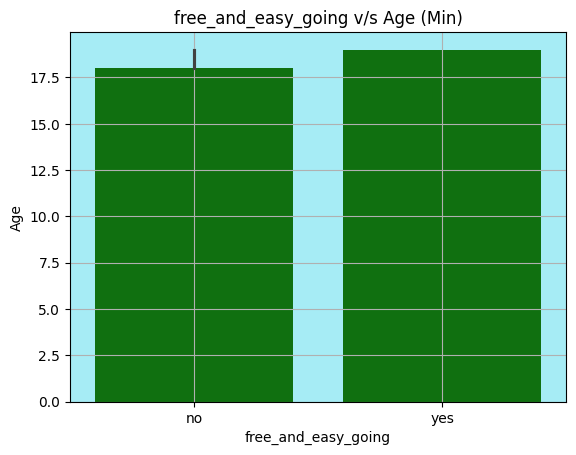

In [168]:
# Plot the barplot
sns.barplot(x='free_and_easy_going', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('free_and_easy_going v/s Age (Min)')
plt.grid()
plt.show()


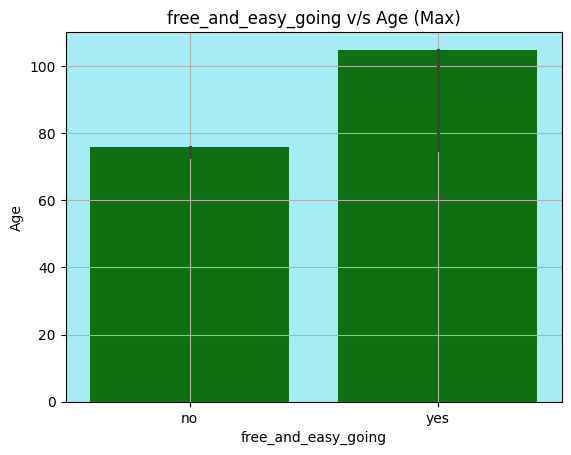

In [363]:
# Plot the barplot
sns.barplot(x='free_and_easy_going', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('free_and_easy_going v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are  balanced
 - Minimum age for free_and_easy_going is balanced but maximum Age behaving quite unusual,age for  not going for free_and_easy_going is less than 80 and going for a free_and_easy_going is greater than 100.

#### entertainment_facilities, Age

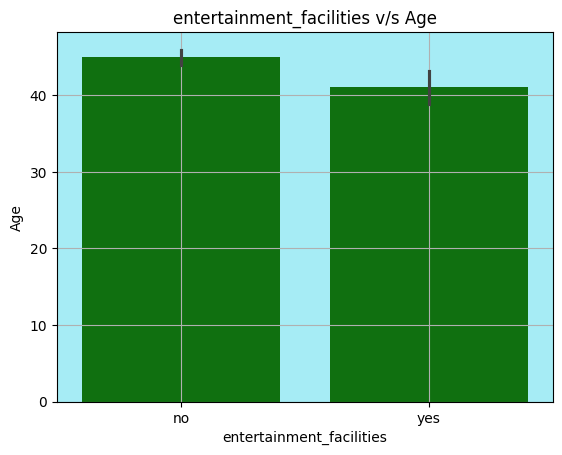

In [170]:
# Plot the barplot
sns.barplot(x='entertainment_facilities', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('entertainment_facilities v/s Age')
plt.grid()
plt.show()


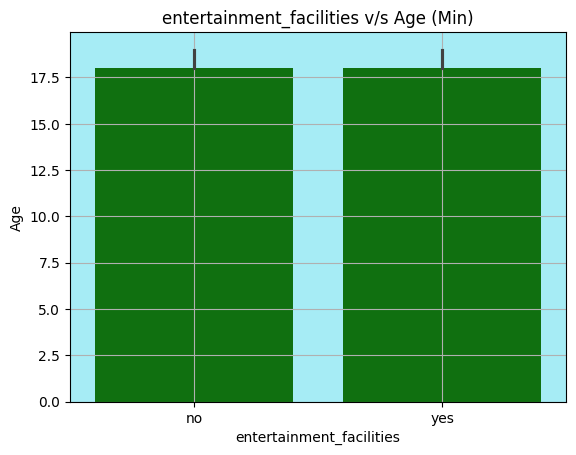

In [171]:
# Plot the barplot
sns.barplot(x='entertainment_facilities', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('entertainment_facilities v/s Age (Min)')
plt.grid()
plt.show()


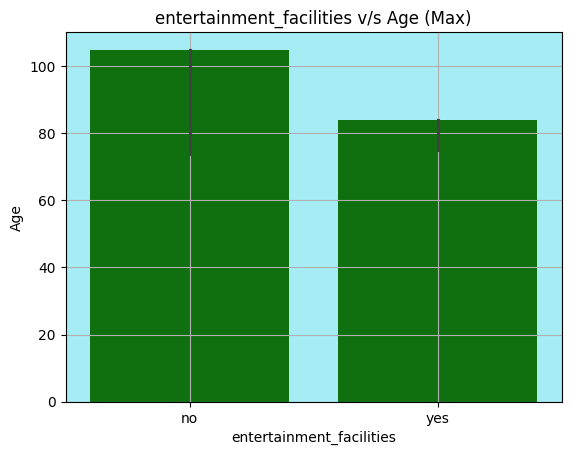

In [364]:
# Plot the barplot
sns.barplot(x='entertainment_facilities', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('entertainment_facilities v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are  balanced
 - Minimum age for Entertainment_facilities is balanced but maximum Age behaving quite unusual,age for not going for Entertainment_facilities is greater than 100 and going for a Entertainment_facilities is less than 90.

#### not_care_about_prices, Age

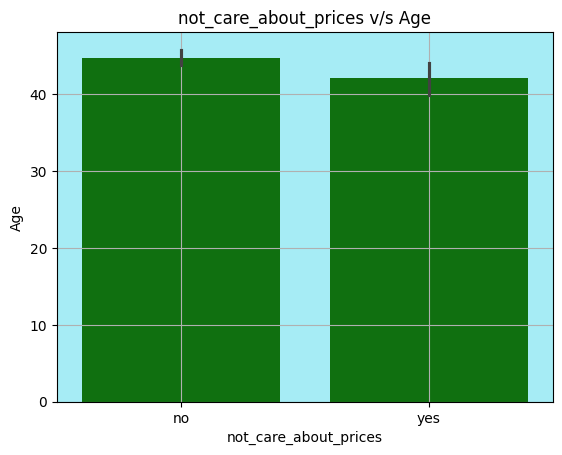

In [173]:
# Plot the barplot
sns.barplot(x='not_care_about_prices', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_care_about_prices v/s Age')
plt.grid()
plt.show()


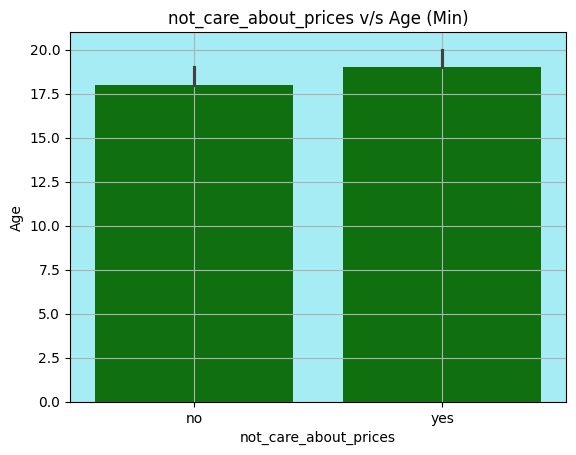

In [174]:
# Plot the barplot
sns.barplot(x='not_care_about_prices', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_care_about_prices v/s Age (Min)')
plt.grid()
plt.show()


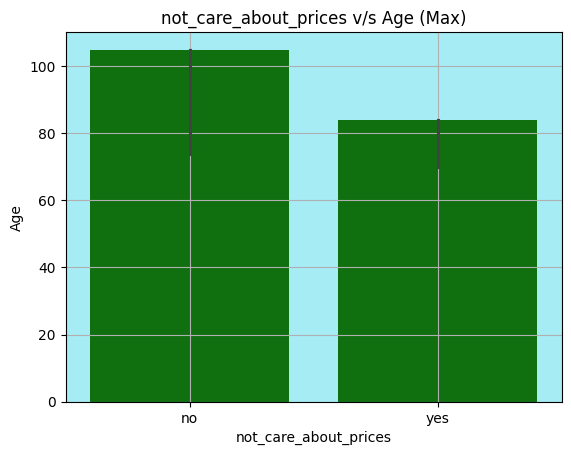

In [365]:
# Plot the barplot
sns.barplot(x='not_care_about_prices', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_care_about_prices v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are  balanced
 - Minimum age for Not_care_about_prices is balanced but maximum Age behaving quite unusual,age for Not_care_about_prices is greater than 100 and going for a care_about_prices is less than 90.

#### life_style_of_the_local_people, Age

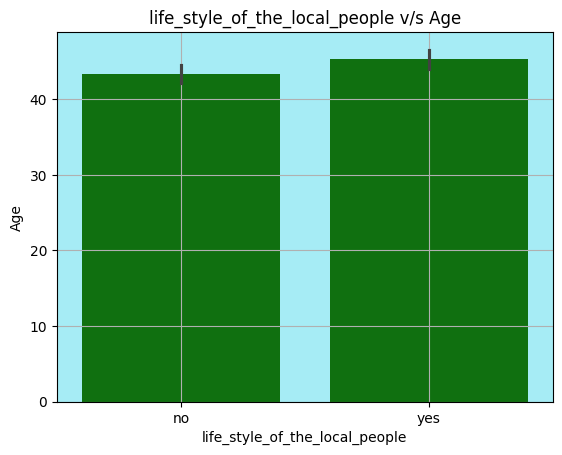

In [176]:
# Plot the barplot
sns.barplot(x='life_style_of_the_local_people', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('life_style_of_the_local_people v/s Age')
plt.grid()
plt.show()


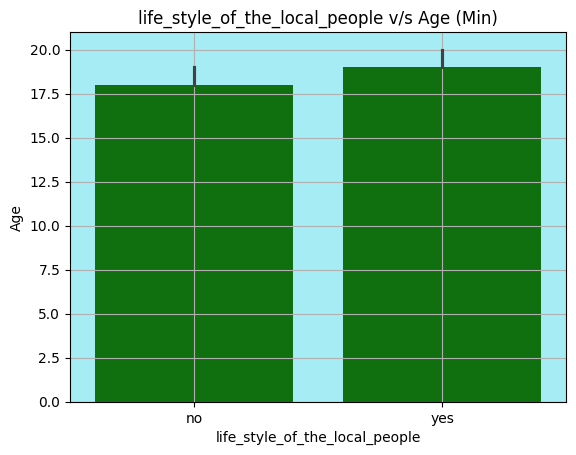

In [177]:
# Plot the barplot
sns.barplot(x='life_style_of_the_local_people', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('life_style_of_the_local_people v/s Age (Min)')
plt.grid()
plt.show()


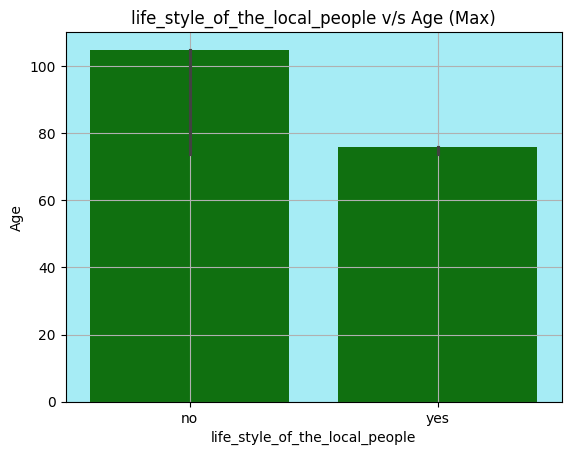

In [366]:
# Plot the barplot
sns.barplot(x='life_style_of_the_local_people', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('life_style_of_the_local_people v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are  balanced
 - Minimum age for Life_style_of_the_local_people is balanced but maximum Age behaving quite unusual,age for not consider Life_style_of_the_local_people is greater than 100 and going for consider a Life_style_of_the_local_people is less than 80.

#### intense_experience_of_nature, Age

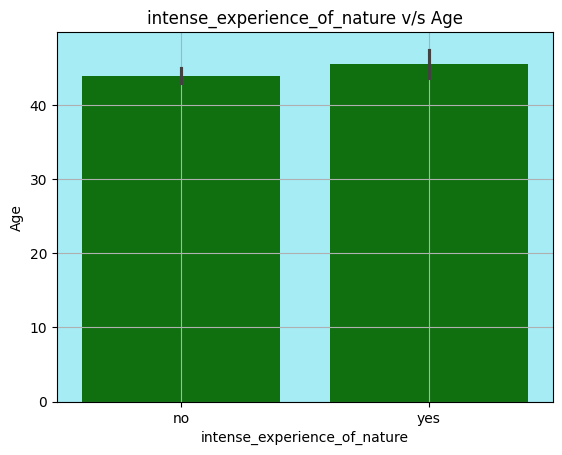

In [179]:
# Plot the barplot
sns.barplot(x='intense_experience_of_nature', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('intense_experience_of_nature v/s Age')
plt.grid()
plt.show()


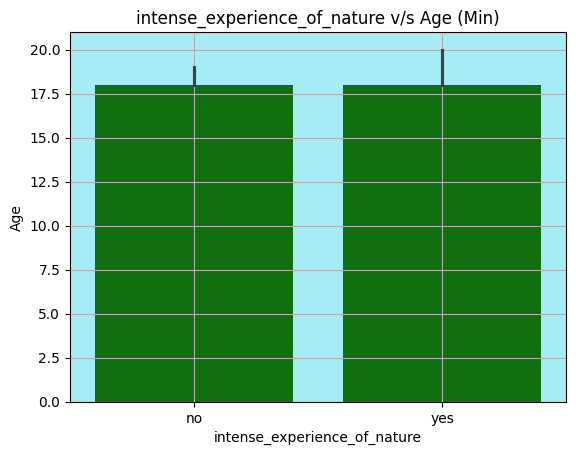

In [180]:
# Plot the barplot
sns.barplot(x='intense_experience_of_nature', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('intense_experience_of_nature v/s Age (Min)')
plt.grid()
plt.show()


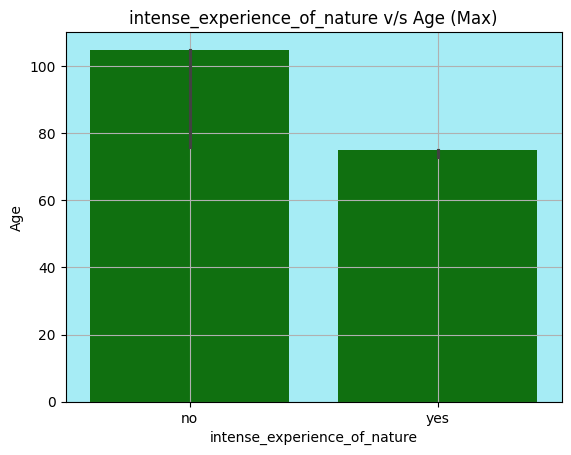

In [367]:
# Plot the barplot
sns.barplot(x='intense_experience_of_nature', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('intense_experience_of_nature v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are  balanced
 - Minimum age for feel Intense_experience_of_nature is balanced but maximum Age behaving quite unusual,age for not going for feel Intense_experience_of_nature is greater than 100 and going for a feel Intense_experience_of_nature is less than 80.

#### cosiness/familiar_atmosphere, Age

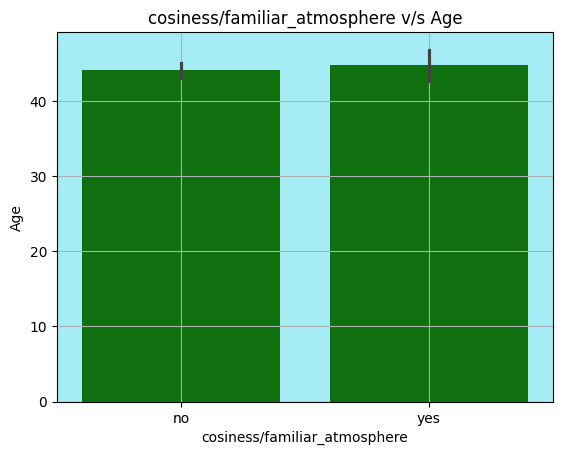

In [182]:
# Plot the barplot
sns.barplot(x='cosiness/familiar_atmosphere', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cosiness/familiar_atmosphere v/s Age')
plt.grid()
plt.show()


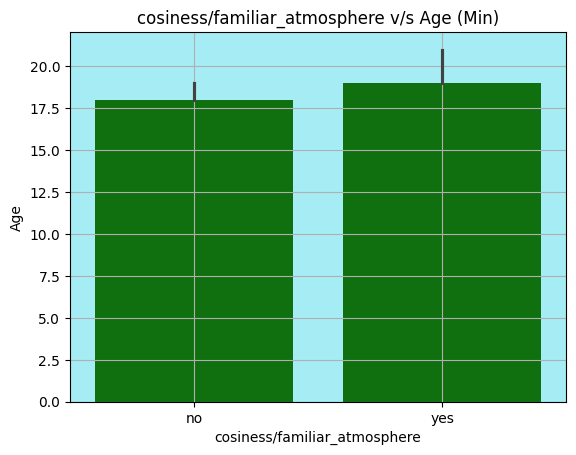

In [183]:
# Plot the barplot
sns.barplot(x='cosiness/familiar_atmosphere', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cosiness/familiar_atmosphere v/s Age (Min)')
plt.grid()
plt.show()


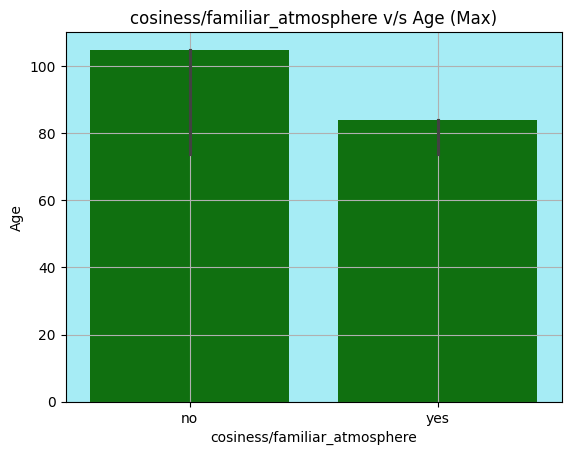

In [368]:
# Plot the barplot
sns.barplot(x='cosiness/familiar_atmosphere', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cosiness/familiar_atmosphere v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are  balanced
 - Minimum age for feel familiar_atmospher is balanced but maximum Age behaving quite unusual,age for not going for feel familiar_atmospher is greater than 100 and going for a feel familiar_atmospher is less than 90.

#### maintain_unspoilt_surroundings, Age

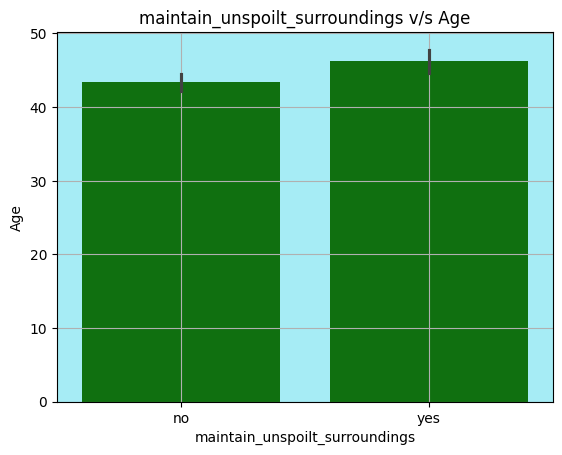

In [185]:
# Plot the barplot
sns.barplot(x='maintain_unspoilt_surroundings', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('maintain_unspoilt_surroundings v/s Age')
plt.grid()
plt.show()


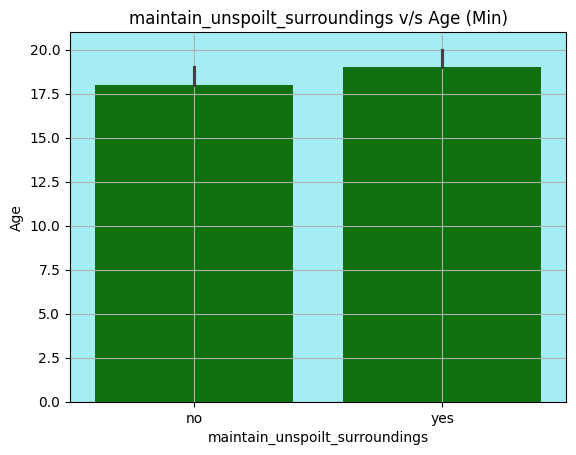

In [186]:
# Plot the barplot
sns.barplot(x='maintain_unspoilt_surroundings', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('maintain_unspoilt_surroundings v/s Age (Min)')
plt.grid()
plt.show()


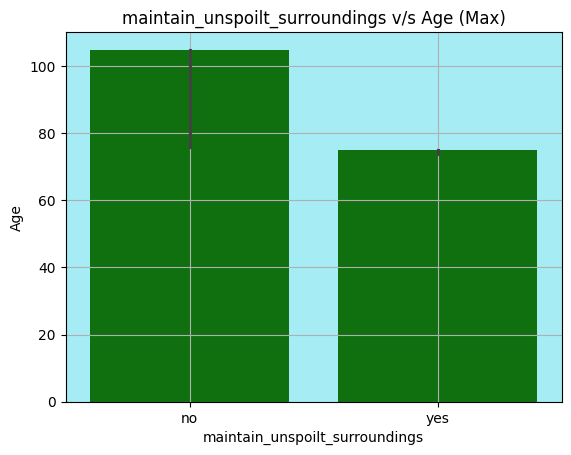

In [369]:
# Plot the barplot
sns.barplot(x='maintain_unspoilt_surroundings', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('maintain_unspoilt_surroundings v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are wuite  balanced
 - Minimum age for Maintain_unspoilt_surroundings is quite balanced but maximum Age behaving quite unusual,age for not going for Maintain_unspoilt_surroundings is greater than 100 and going for a Maintain_unspoilt_surroundings is less than 80.

#### everything_organised, Age

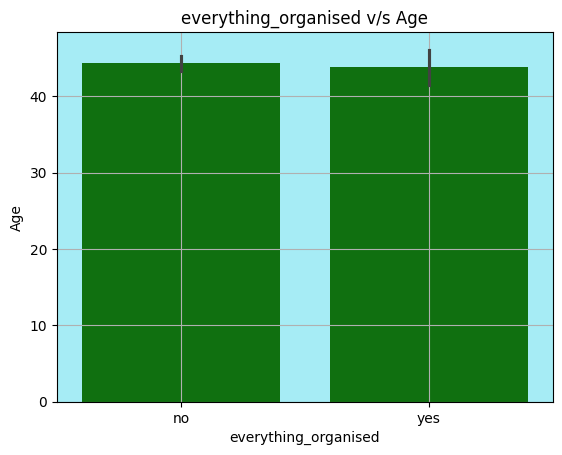

In [188]:
# Plot the barplot
sns.barplot(x='everything_organised', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('everything_organised v/s Age')
plt.grid()
plt.show()


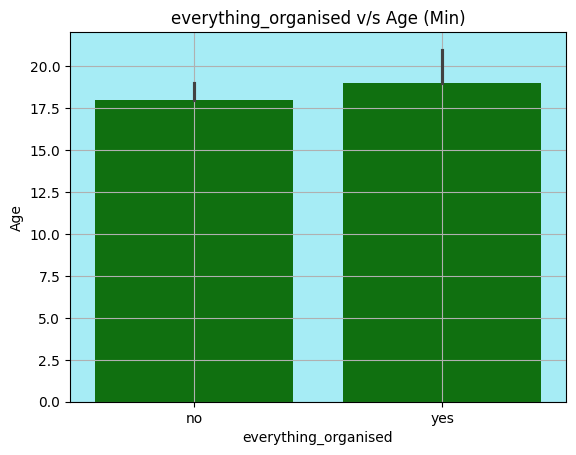

In [189]:
# Plot the barplot
sns.barplot(x='everything_organised', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('everything_organised v/s Age (Min)')
plt.grid()
plt.show()


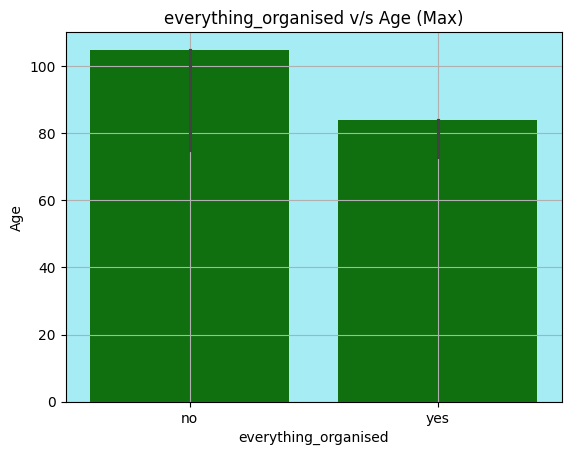

In [370]:
# Plot the barplot
sns.barplot(x='everything_organised', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('everything_organised v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are  balanced
 - Minimum age for Everything_organised is balanced but maximum Age behaving quite unusual,age for not going for Everything_organised is greater than 100 and going for a Everything_organised is less than 90.

#### unspoilt_nature/natural_landscape, Age

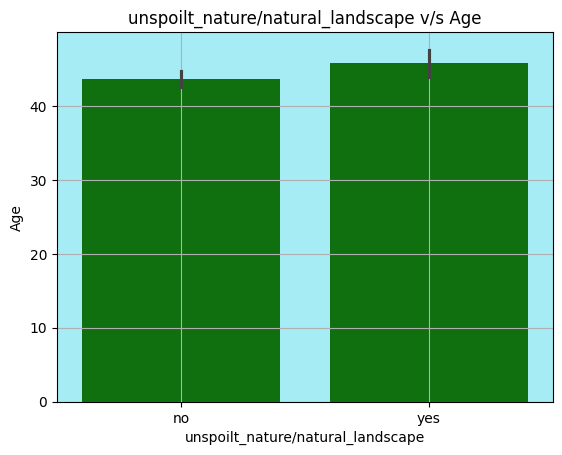

In [191]:
# Plot the barplot
sns.barplot(x='unspoilt_nature/natural_landscape', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('unspoilt_nature/natural_landscape v/s Age')
plt.grid()
plt.show()


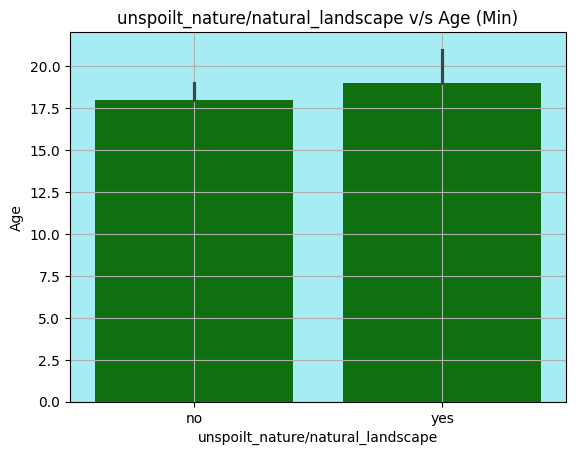

In [192]:
# Plot the barplot
sns.barplot(x='unspoilt_nature/natural_landscape', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('unspoilt_nature/natural_landscape v/s Age (Min)')
plt.grid()
plt.show()


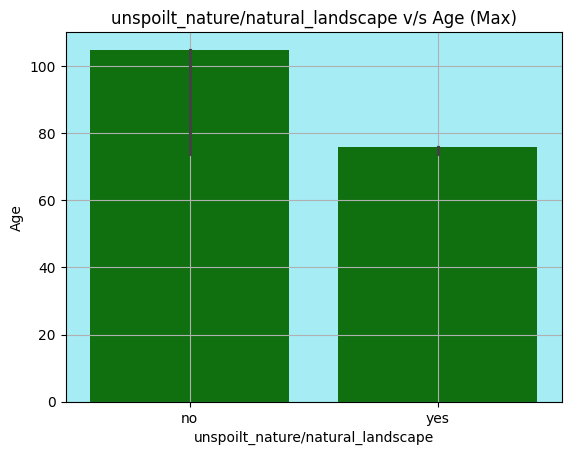

In [371]:
# Plot the barplot
sns.barplot(x='unspoilt_nature/natural_landscape', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('unspoilt_nature/natural_landscape v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are  balanced
 - Minimum age for Unspoilt_nature_natural_landscape is balanced but maximum Age behaving quite unusual,age for not going for Unspoilt_nature_natural_landscape is greater than 100 and going for a Unspoilt_nature_natural_landscape is less than 80.

#### cultural_offers, Age

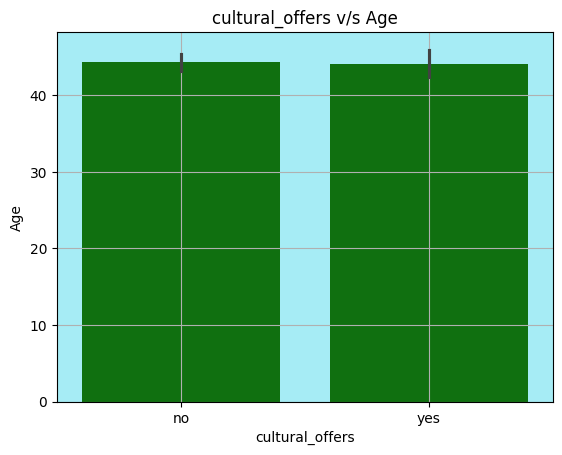

In [194]:
# Plot the barplot
sns.barplot(x='cultural_offers', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cultural_offers v/s Age')
plt.grid()
plt.show()


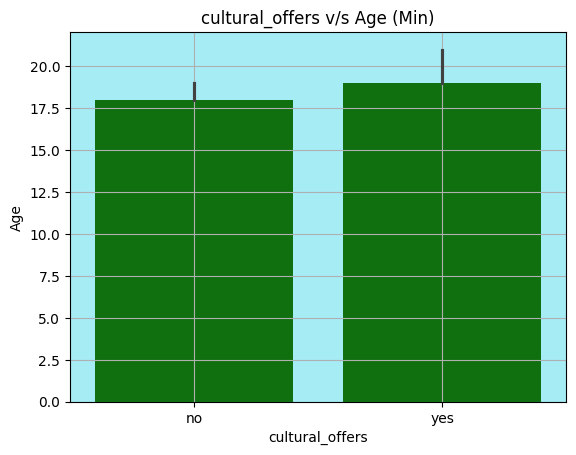

In [195]:
# Plot the barplot
sns.barplot(x='cultural_offers', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cultural_offers v/s Age (Min)')
plt.grid()
plt.show()


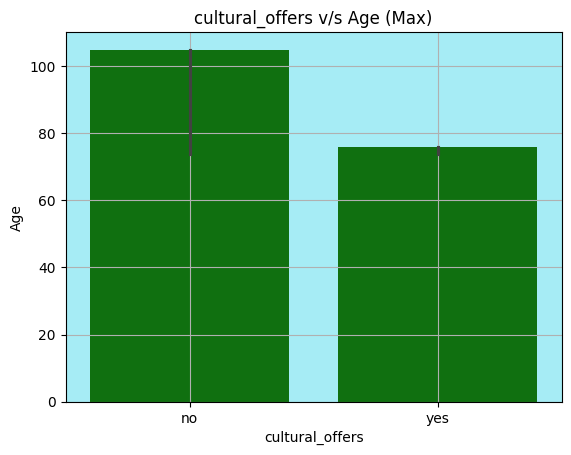

In [372]:
# Plot the barplot
sns.barplot(x='cultural_offers', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cultural_offers v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are  balanced
 - Minimum age for get clutural_offers is balanced but maximum Age behaving quite unusual,age for not going for get clutural_offers is greater than 100 and going for a get clutural_offers is less than 80.

#### change_of_surroundings, Age

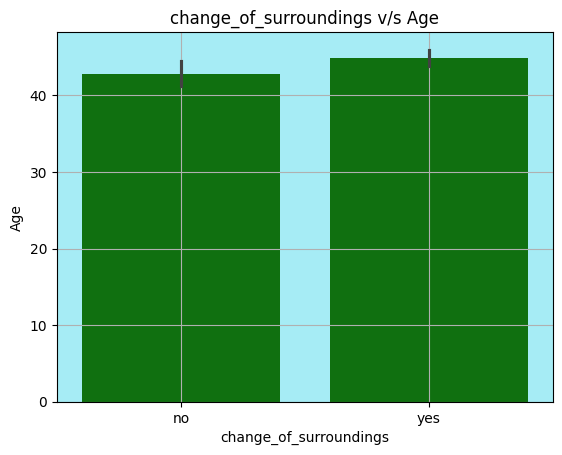

In [197]:
# Plot the barplot
sns.barplot(x='change_of_surroundings', y='Age', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('change_of_surroundings v/s Age')
plt.grid()
plt.show()


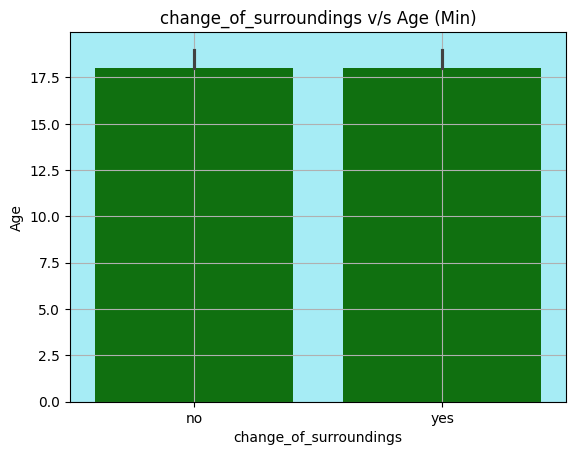

In [198]:
# Plot the barplot
sns.barplot(x='change_of_surroundings', y='Age', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('change_of_surroundings v/s Age (Min)')
plt.grid()
plt.show()


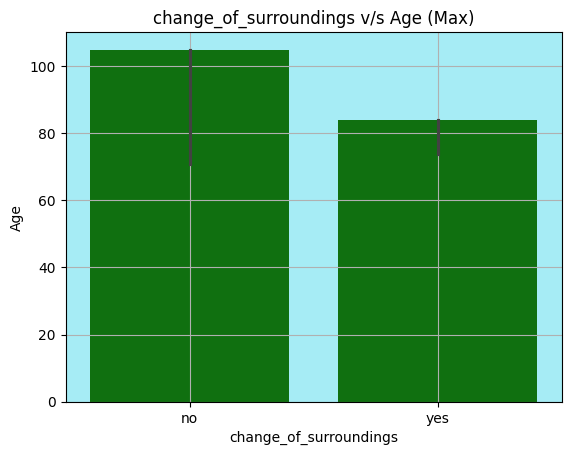

In [373]:
# Plot the barplot
sns.barplot(x='change_of_surroundings', y='Age', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('change_of_surroundings v/s Age (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that categories are  balanced
 - Minimum age for Change_of_surroundings is balanced but maximum Age behaving quite unusual,age for not going for Change_of_surroundings is greater than 100 and going for a Change_of_surroundings is less than 90.

#### Gender, Education

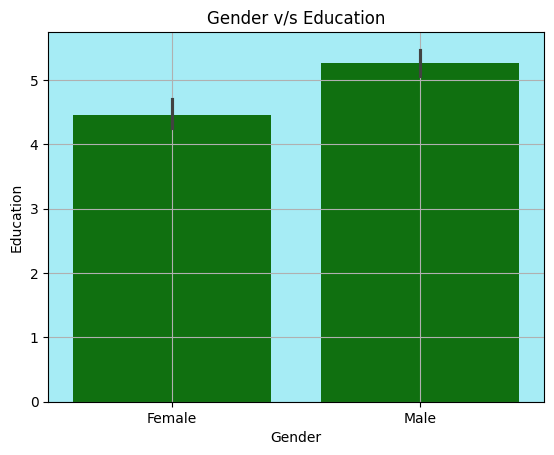

In [200]:
# Plot the barplot
sns.barplot(x='Gender', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Gender v/s Education')
plt.grid()
plt.show()


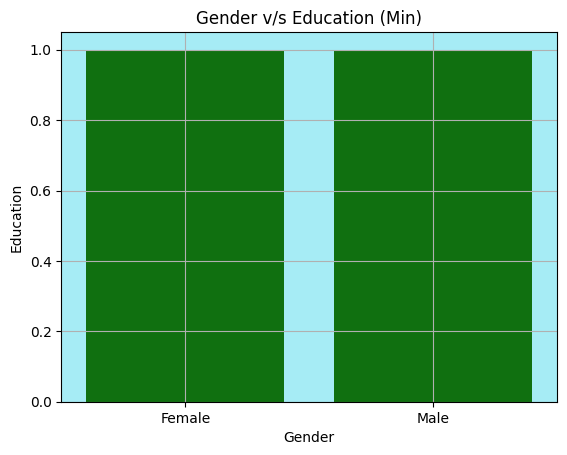

In [201]:
# Plot the barplot
sns.barplot(x='Gender', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Gender v/s Education (Min)')
plt.grid()
plt.show()


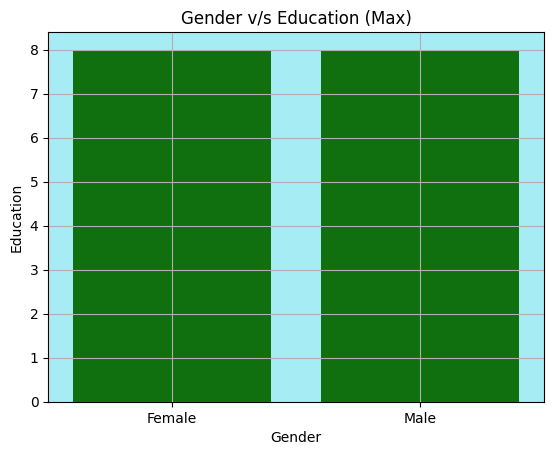

In [374]:
# Plot the barplot
sns.barplot(x='Gender', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Gender v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data we can see that average education for male is above 5 and for female less than 5.
 - Minimum  and maximum education by gender is balanced.


#### Occupation, Education

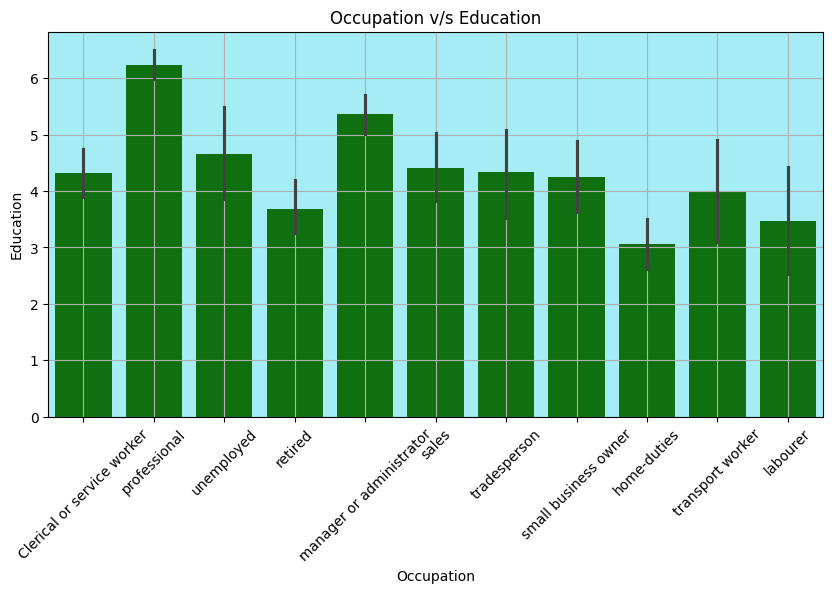

In [203]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='Occupation', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.xticks(rotation=45)
plt.title('Occupation v/s Education')
plt.grid()
plt.show()


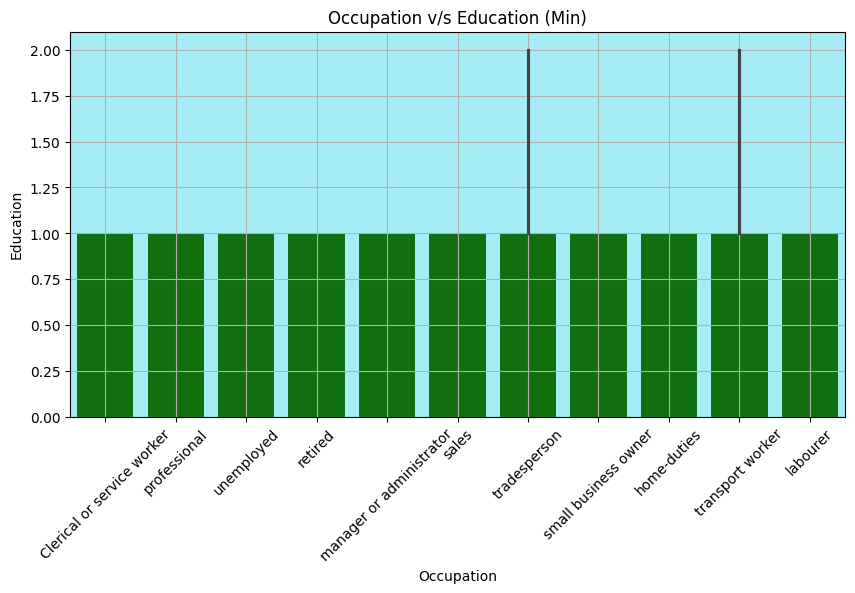

In [204]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='Occupation', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.xticks(rotation=45)
plt.title('Occupation v/s Education (Min)')
plt.grid()
plt.show()


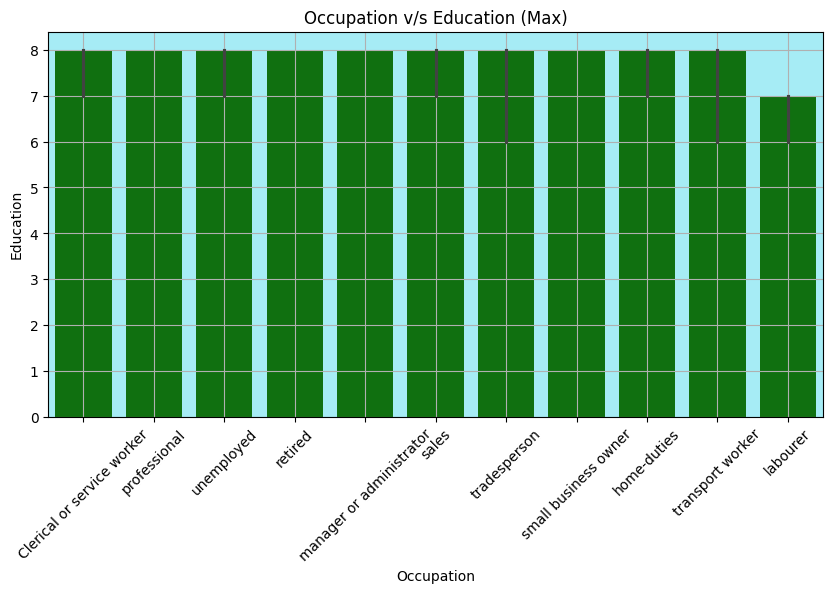

In [375]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='Occupation', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.xticks(rotation=45)
plt.title('Occupation v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - Average education for professional occupation is greater than 6.
 - Minimum education and maximum education by occupation is balanced.

#### State, Education

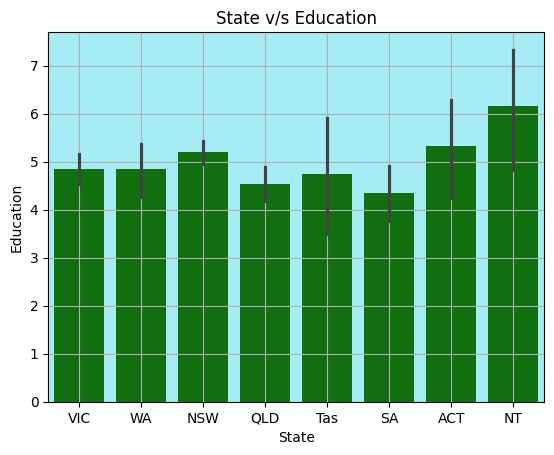

In [206]:
# Plot the barplot
sns.barplot(x='State', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('State v/s Education')
plt.grid()
plt.show()


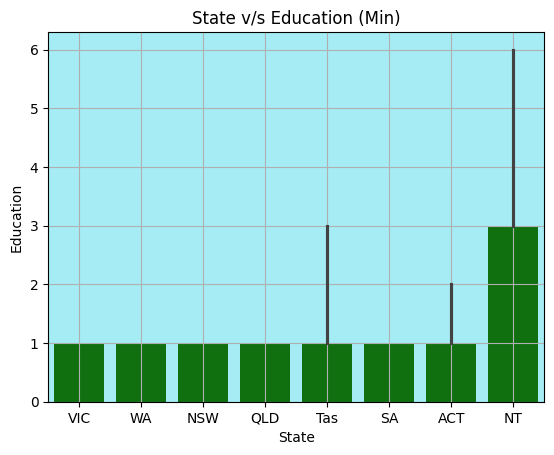

In [207]:
# Plot the barplot
sns.barplot(x='State', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('State v/s Education (Min)')
plt.grid()
plt.show()


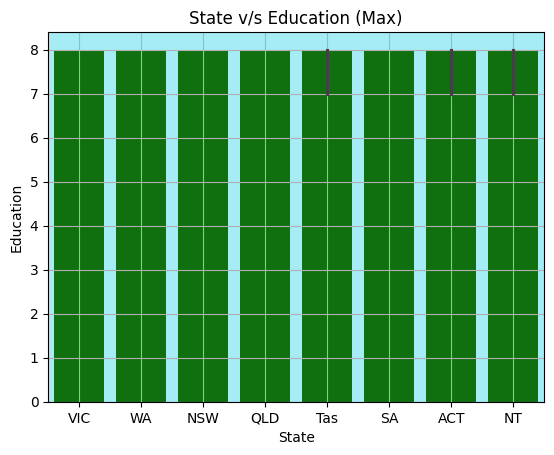

In [377]:
# Plot the barplot
sns.barplot(x='State', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('State v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - The data is quite balanced.
 - there is for minimum education by State for NT is 3.
 - maximum education by state is balanced.

#### relationship_status, Education

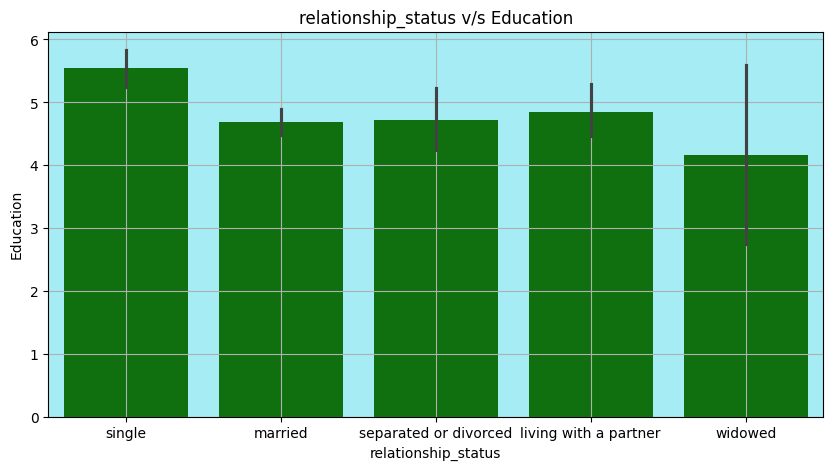

In [209]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='relationship_status', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('relationship_status v/s Education')
plt.grid()
plt.show()


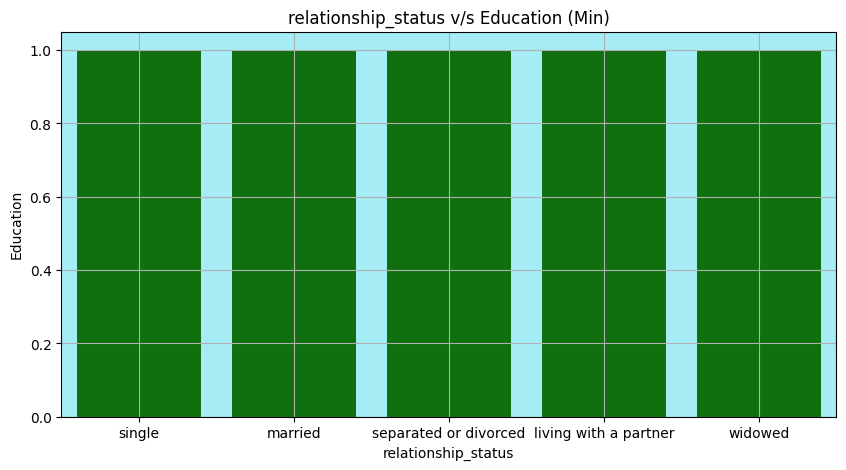

In [210]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='relationship_status', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('relationship_status v/s Education (Min)')
plt.grid()
plt.show()


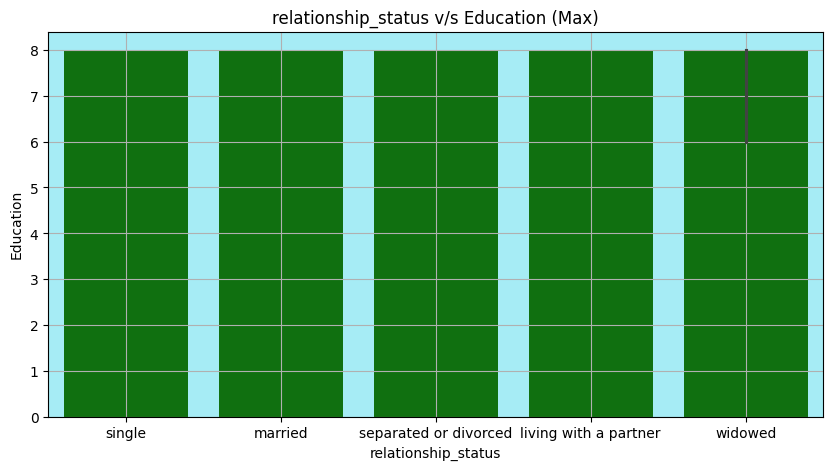

In [378]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='relationship_status', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('relationship_status v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - All the data of education by relationship status is balanced

#### obligation_category, Education

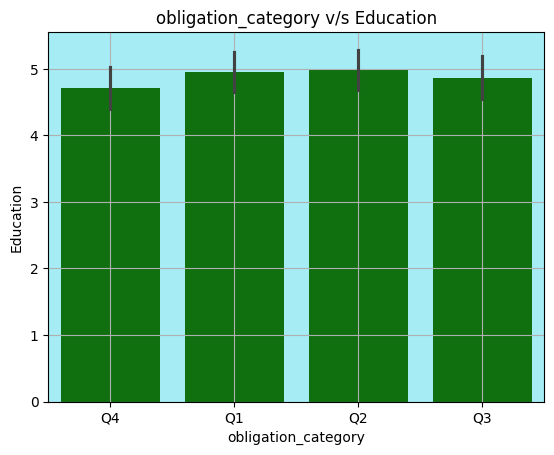

In [212]:
# Plot the barplot
sns.barplot(x='obligation_category', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('obligation_category v/s Education')
plt.grid()
plt.show()


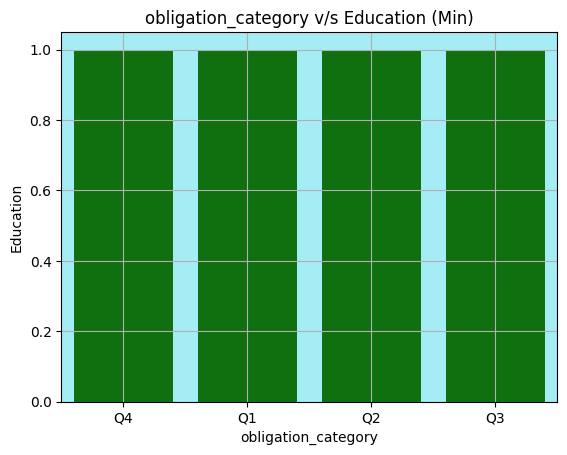

In [213]:
# Plot the barplot
sns.barplot(x='obligation_category', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('obligation_category v/s Education (Min)')
plt.grid()
plt.show()


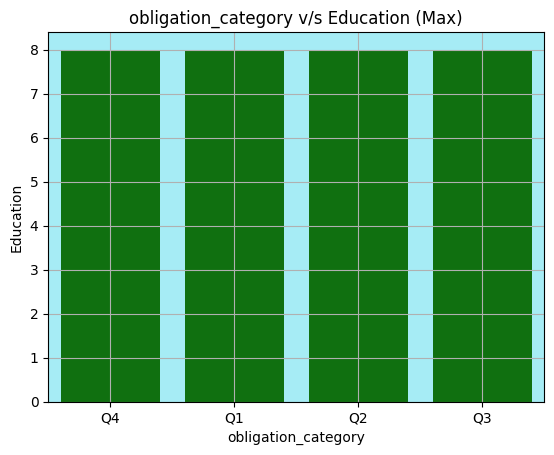

In [379]:
# Plot the barplot
sns.barplot(x='obligation_category', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('obligation_category v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - All data of Mean,Max and Min is balanced.

#### rest_and_relax, Education

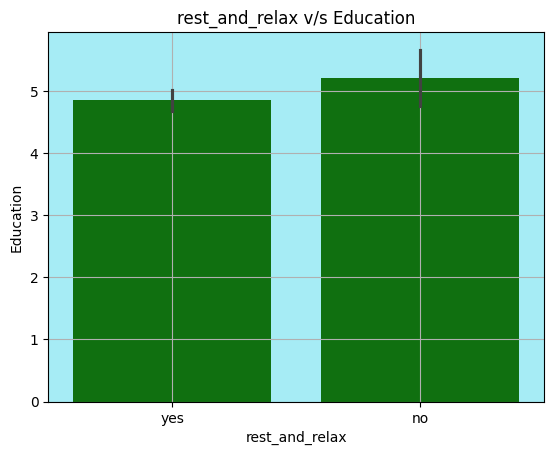

In [215]:
# Plot the barplot
sns.barplot(x='rest_and_relax', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('rest_and_relax v/s Education')
plt.grid()
plt.show()


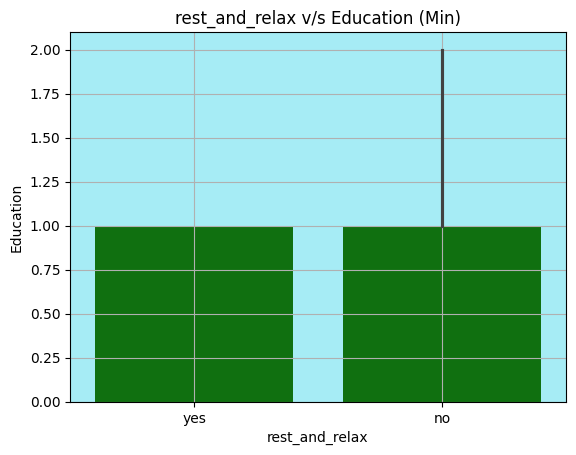

In [216]:
# Plot the barplot
sns.barplot(x='rest_and_relax', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('rest_and_relax v/s Education (Min)')
plt.grid()
plt.show()


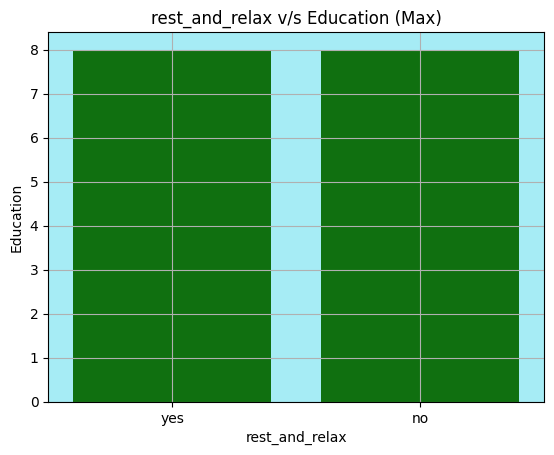

In [380]:
# Plot the barplot
sns.barplot(x='rest_and_relax', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('rest_and_relax v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - All data of Mean,Max and Min is balanced.

#### luxury_or_be_spoilt, Education

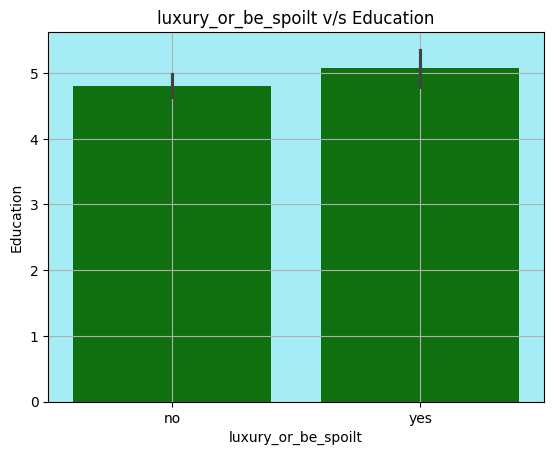

In [218]:
# Plot the barplot
sns.barplot(x='luxury_or_be_spoilt', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('luxury_or_be_spoilt v/s Education')
plt.grid()
plt.show()


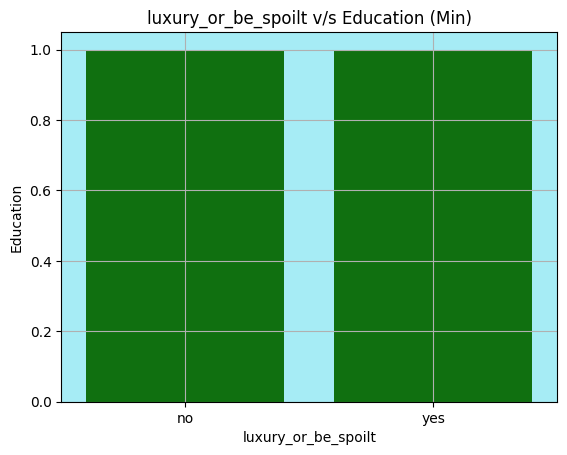

In [219]:
# Plot the barplot
sns.barplot(x='luxury_or_be_spoilt', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('luxury_or_be_spoilt v/s Education (Min)')
plt.grid()
plt.show()


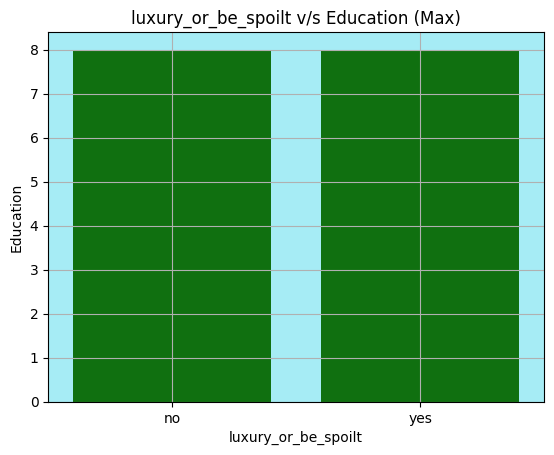

In [381]:
# Plot the barplot
sns.barplot(x='luxury_or_be_spoilt', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('luxury_or_be_spoilt v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - All data of Mean,Max and Min is balanced.

#### do_sports, Education

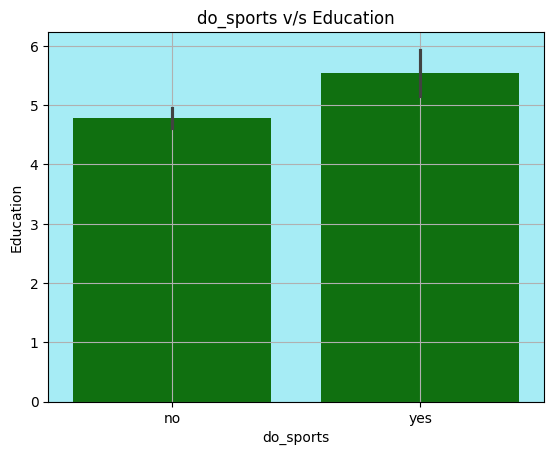

In [221]:
# Plot the barplot
sns.barplot(x='do_sports', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('do_sports v/s Education')
plt.grid()
plt.show()


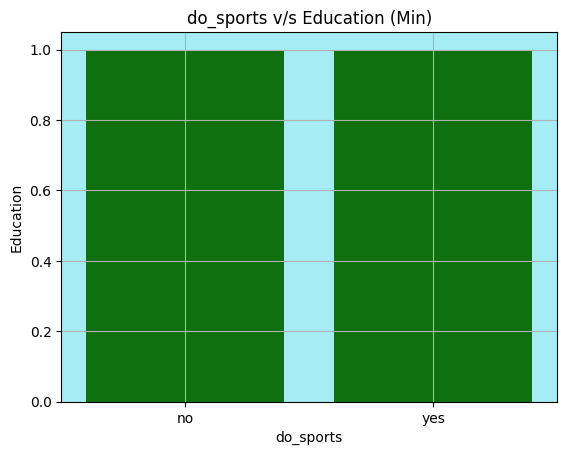

In [222]:
# Plot the barplot
sns.barplot(x='do_sports', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('do_sports v/s Education (Min)')
plt.grid()
plt.show()


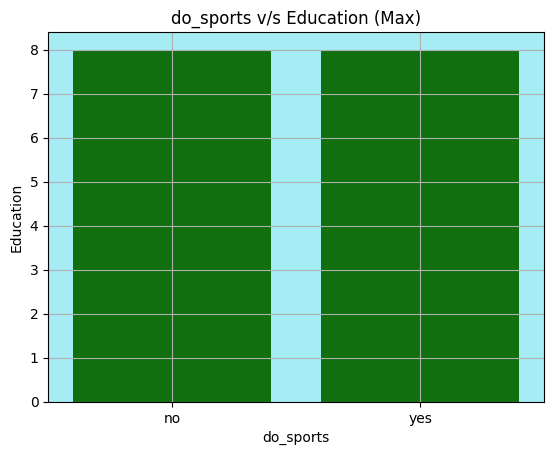

In [383]:
# Plot the barplot
sns.barplot(x='do_sports', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('do_sports v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - All data of Mean,Max and Min is balanced.

#### excitement_and_challenge, Education

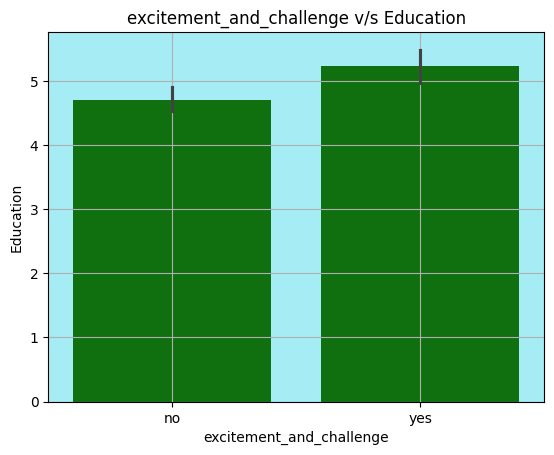

In [224]:
# Plot the barplot
sns.barplot(x='excitement_and_challenge', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('excitement_and_challenge v/s Education')
plt.grid()
plt.show()


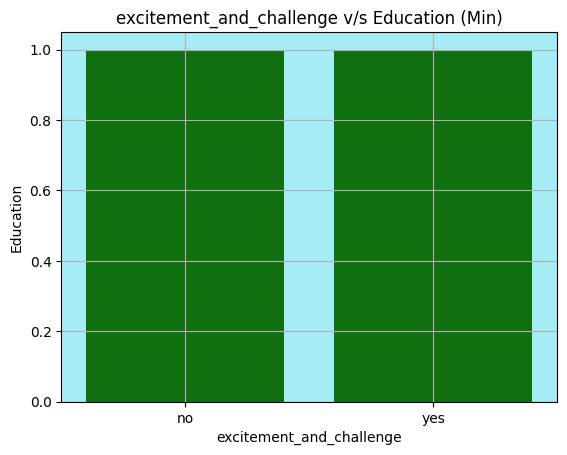

In [225]:
# Plot the barplot
sns.barplot(x='excitement_and_challenge', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('excitement_and_challenge v/s Education (Min)')
plt.grid()
plt.show()


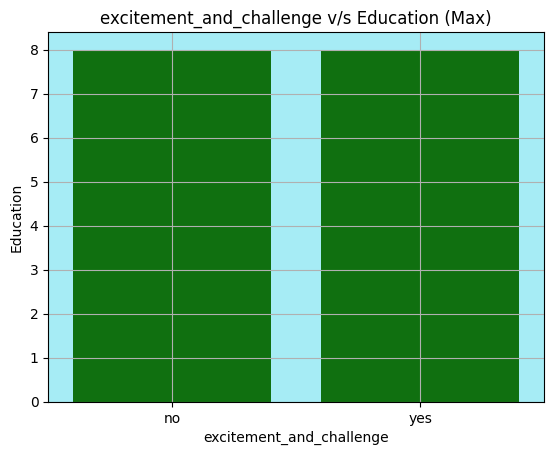

In [384]:
# Plot the barplot
sns.barplot(x='excitement_and_challenge', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('excitement_and_challenge v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - All data of Mean,Max and Min is balanced.

#### not_exceed_planned_budget, Education

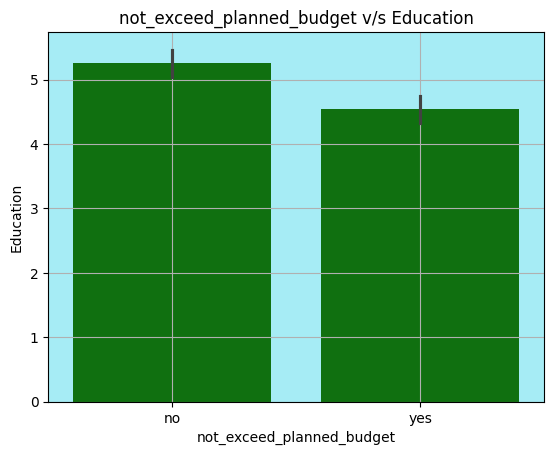

In [227]:
# Plot the barplot
sns.barplot(x='not_exceed_planned_budget', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_exceed_planned_budget v/s Education')
plt.grid()
plt.show()


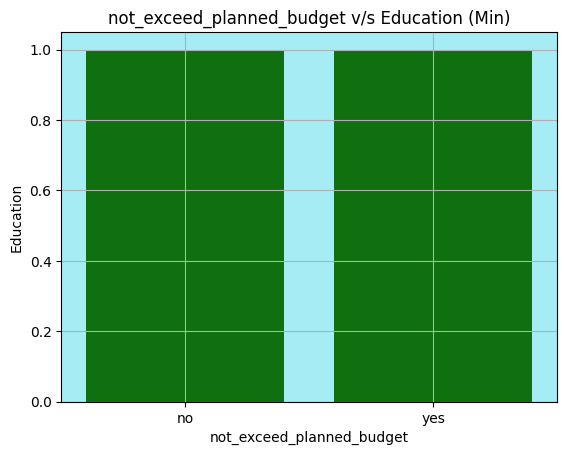

In [228]:
# Plot the barplot
sns.barplot(x='not_exceed_planned_budget', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_exceed_planned_budget v/s Education (Min)')
plt.grid()
plt.show()


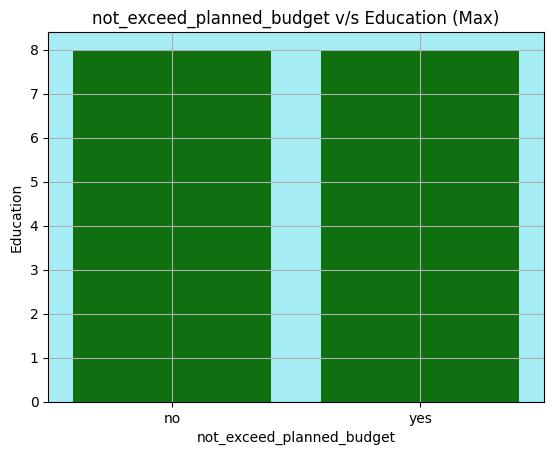

In [385]:
# Plot the barplot
sns.barplot(x='not_exceed_planned_budget', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_exceed_planned_budget v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - All data of Mean,Max and Min is balanced.

#### realise_creativity, Education

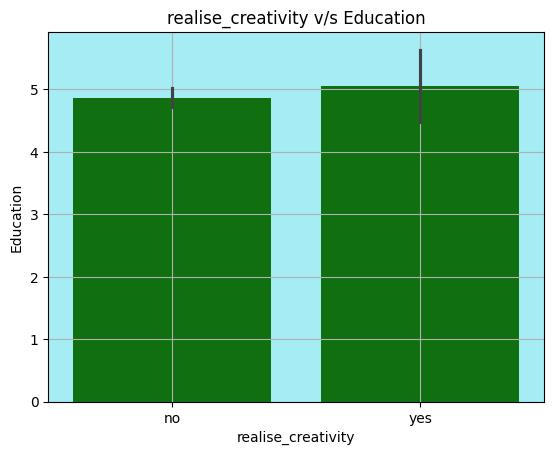

In [230]:
# Plot the barplot
sns.barplot(x='realise_creativity', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('realise_creativity v/s Education')
plt.grid()
plt.show()


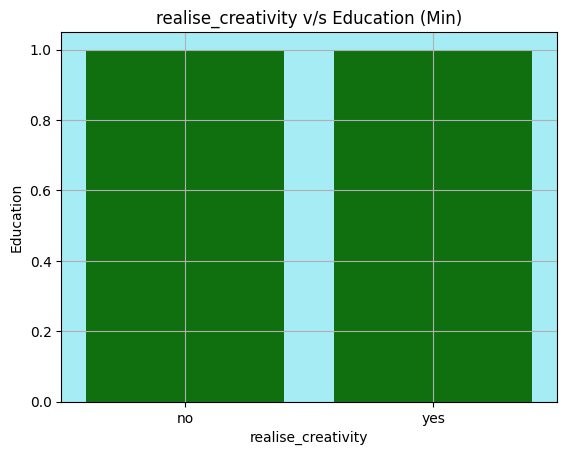

In [231]:
# Plot the barplot
sns.barplot(x='realise_creativity', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('realise_creativity v/s Education (Min)')
plt.grid()
plt.show()


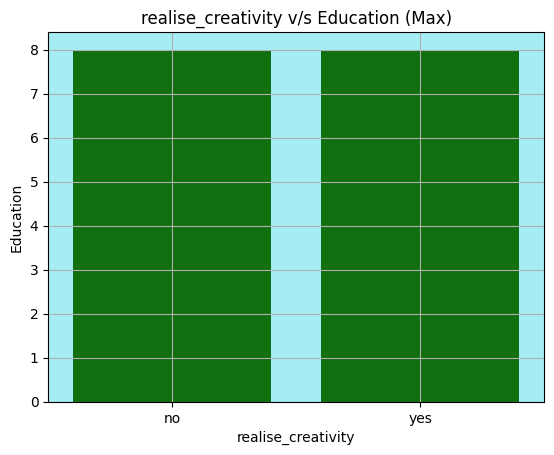

In [387]:
# Plot the barplot
sns.barplot(x='realise_creativity', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('realise_creativity v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - All data of Mean,Max and Min is balanced.

#### fun_and_entertainment, Education

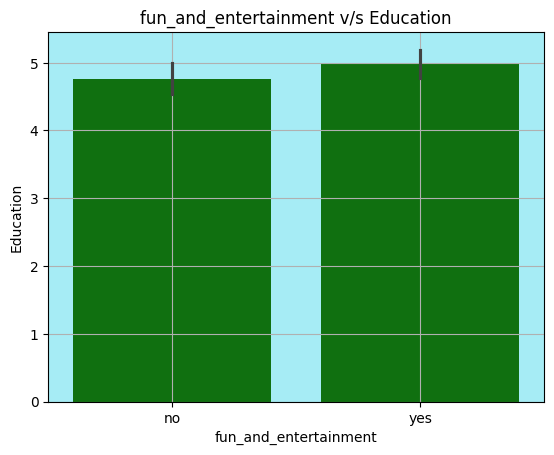

In [233]:
# Plot the barplot
sns.barplot(x='fun_and_entertainment', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('fun_and_entertainment v/s Education')
plt.grid()
plt.show()


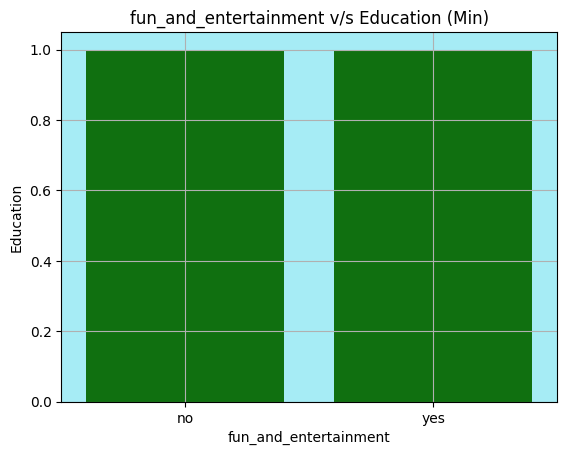

In [234]:
# Plot the barplot
sns.barplot(x='fun_and_entertainment', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('fun_and_entertainment v/s Education (Min)')
plt.grid()
plt.show()


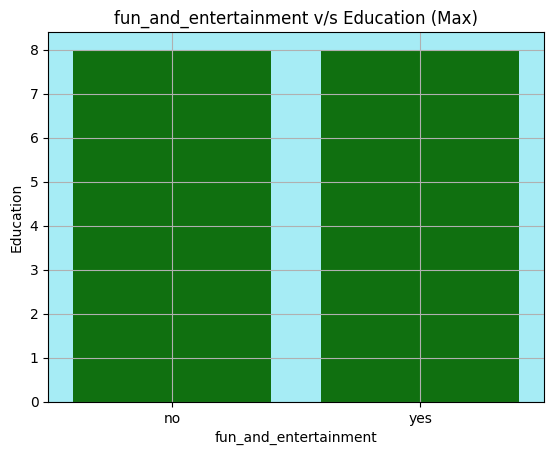

In [386]:
# Plot the barplot
sns.barplot(x='fun_and_entertainment', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('fun_and_entertainment v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - All data of Mean,Max and Min is balanced.

#### good_company, Education

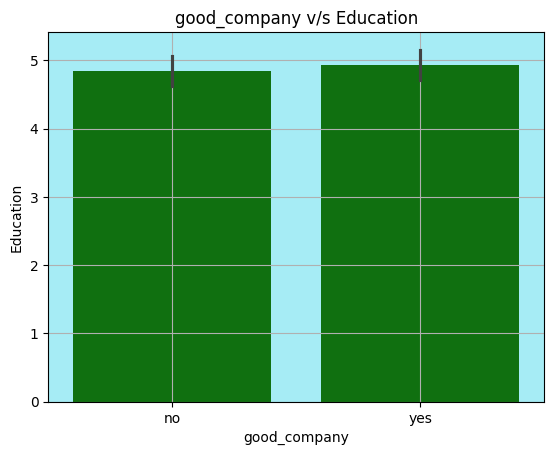

In [236]:
# Plot the barplot
sns.barplot(x='good_company', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('good_company v/s Education')
plt.grid()
plt.show()


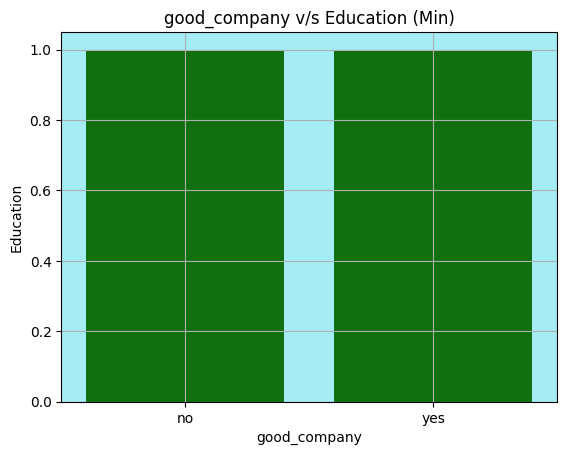

In [237]:
# Plot the barplot
sns.barplot(x='good_company', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('good_company v/s Education (Min)')
plt.grid()
plt.show()


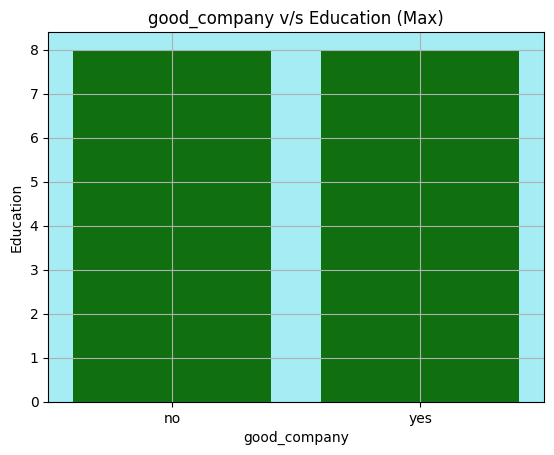

In [388]:
# Plot the barplot
sns.barplot(x='good_company', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('good_company v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - All data of Mean,Max and Min is balanced.


#### health_and_beauty, Education

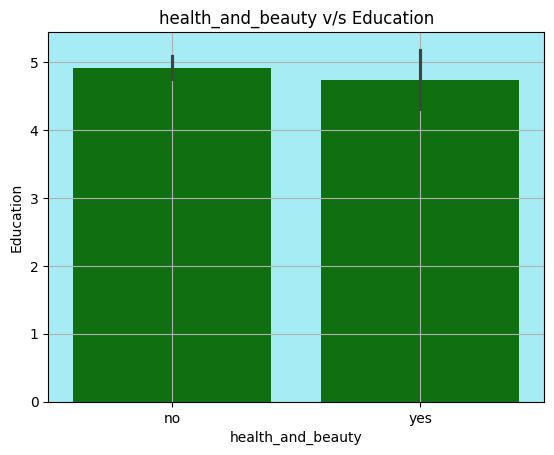

In [239]:
# Plot the barplot
sns.barplot(x='health_and_beauty', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('health_and_beauty v/s Education')
plt.grid()
plt.show()


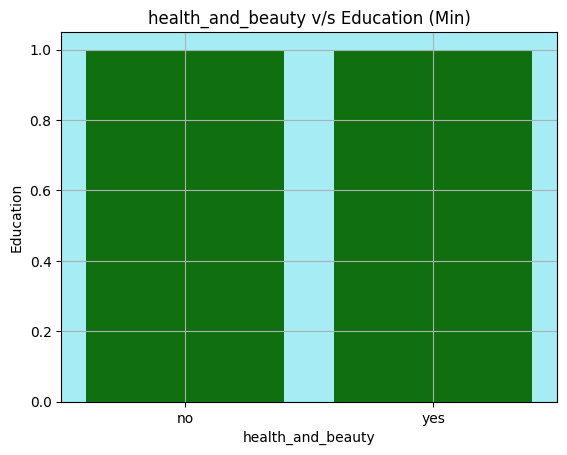

In [240]:
# Plot the barplot
sns.barplot(x='health_and_beauty', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('health_and_beauty v/s Education (Min)')
plt.grid()
plt.show()


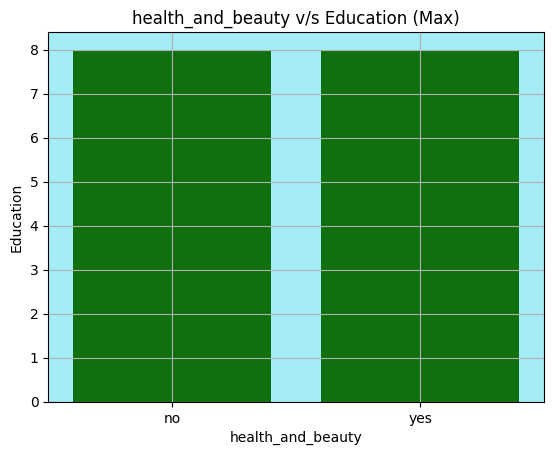

In [389]:
# Plot the barplot
sns.barplot(x='health_and_beauty', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('health_and_beauty v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - All data of Mean,Max and Min is balanced.

#### free_and_easy_going, Education

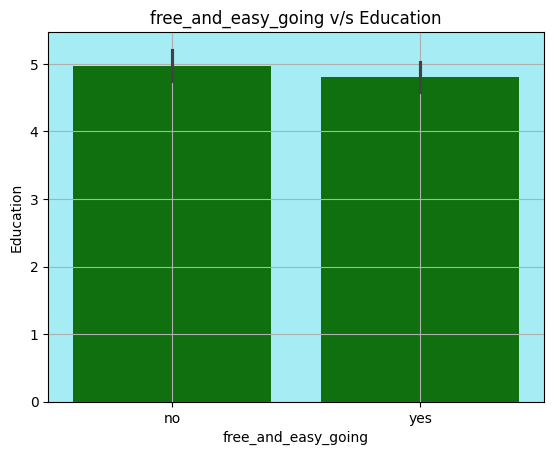

In [242]:
# Plot the barplot
sns.barplot(x='free_and_easy_going', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('free_and_easy_going v/s Education')
plt.grid()
plt.show()


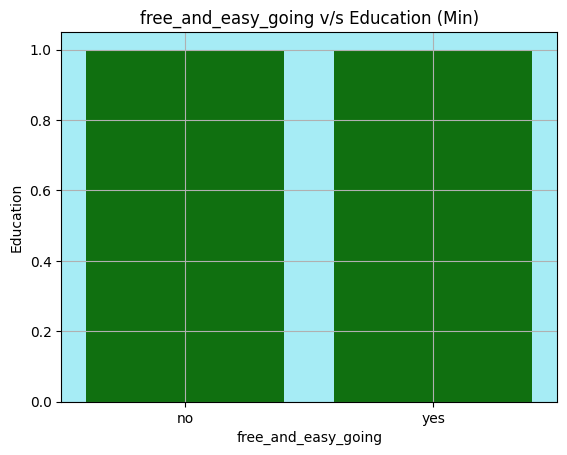

In [243]:
# Plot the barplot
sns.barplot(x='free_and_easy_going', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('free_and_easy_going v/s Education (Min)')
plt.grid()
plt.show()


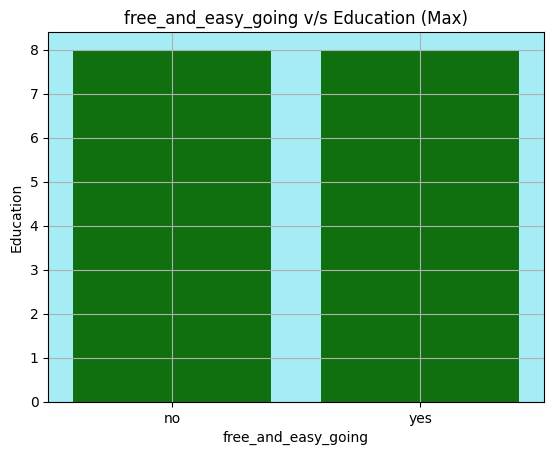

In [390]:
# Plot the barplot
sns.barplot(x='free_and_easy_going', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('free_and_easy_going v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - All data of Mean,Max and Min is balanced.

#### entertainment_facilities, Education

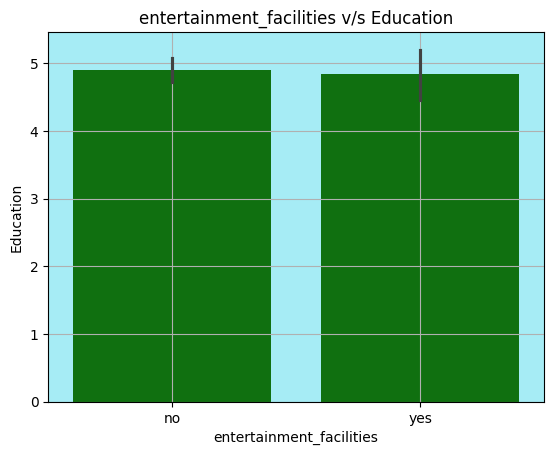

In [245]:
# Plot the barplot
sns.barplot(x='entertainment_facilities', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('entertainment_facilities v/s Education')
plt.grid()
plt.show()


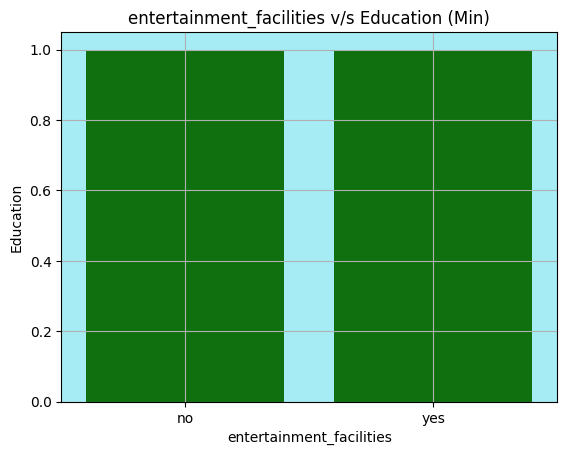

In [246]:
# Plot the barplot
sns.barplot(x='entertainment_facilities', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('entertainment_facilities v/s Education (Min)')
plt.grid()
plt.show()


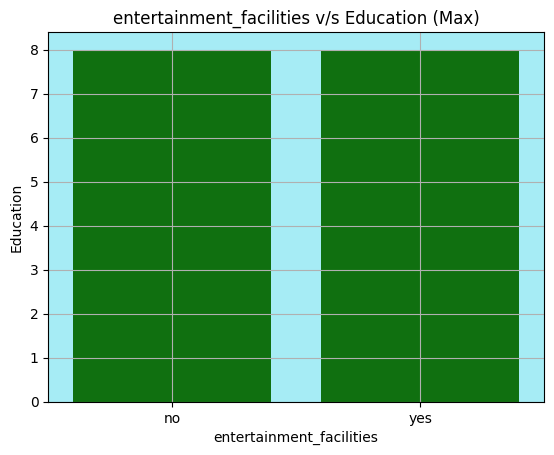

In [392]:
# Plot the barplot
sns.barplot(x='entertainment_facilities', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('entertainment_facilities v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - All data of Mean,Max and Min is balanced.


#### not_care_about_prices, Education

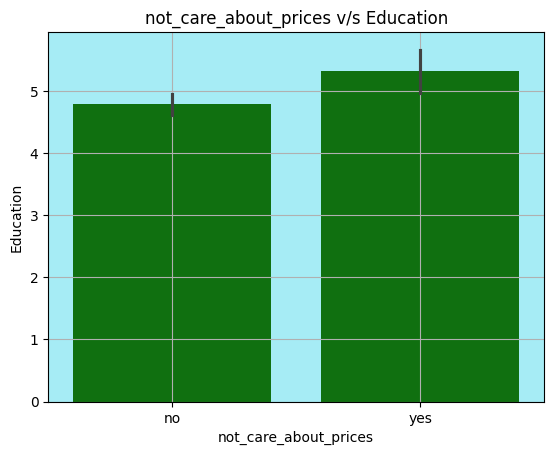

In [248]:
# Plot the barplot
sns.barplot(x='not_care_about_prices', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_care_about_prices v/s Education')
plt.grid()
plt.show()


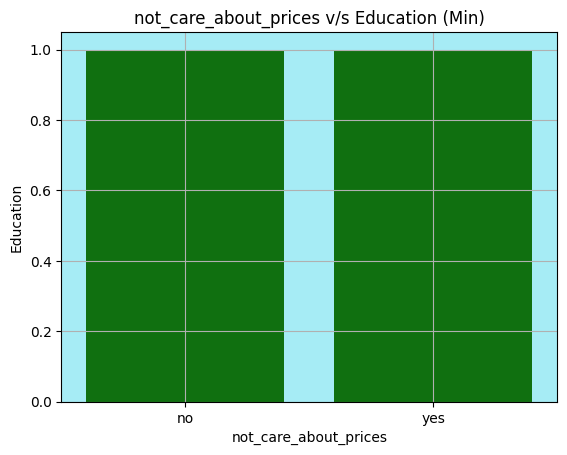

In [249]:
# Plot the barplot
sns.barplot(x='not_care_about_prices', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_care_about_prices v/s Education (Min)')
plt.grid()
plt.show()


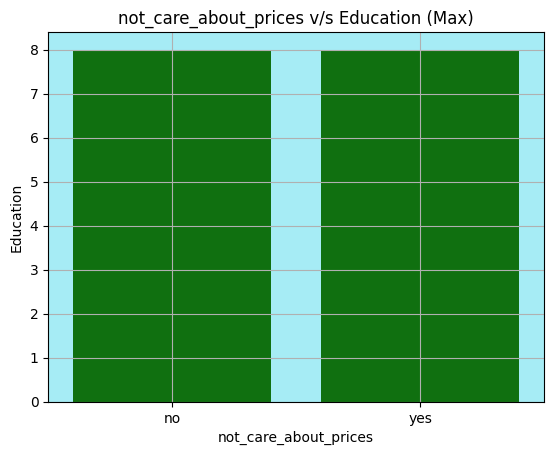

In [393]:
# Plot the barplot
sns.barplot(x='not_care_about_prices', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_care_about_prices v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data for Mean,Max and Min ,categories are quite balanced.

#### life_style_of_the_local_people, Education

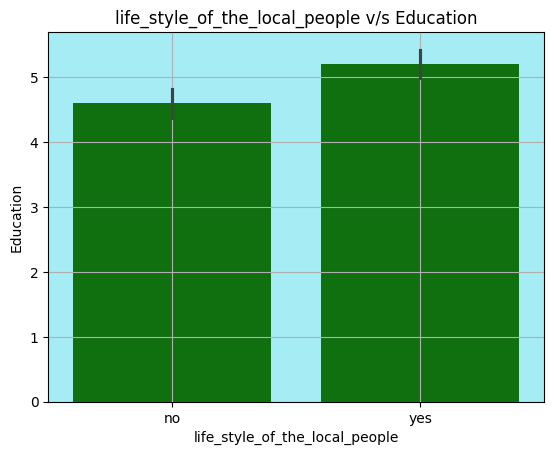

In [251]:
# Plot the barplot
sns.barplot(x='life_style_of_the_local_people', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('life_style_of_the_local_people v/s Education')
plt.grid()
plt.show()


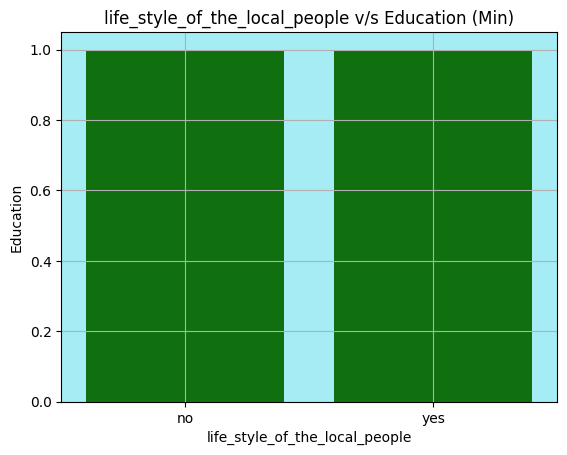

In [252]:
# Plot the barplot
sns.barplot(x='life_style_of_the_local_people', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('life_style_of_the_local_people v/s Education (Min)')
plt.grid()
plt.show()


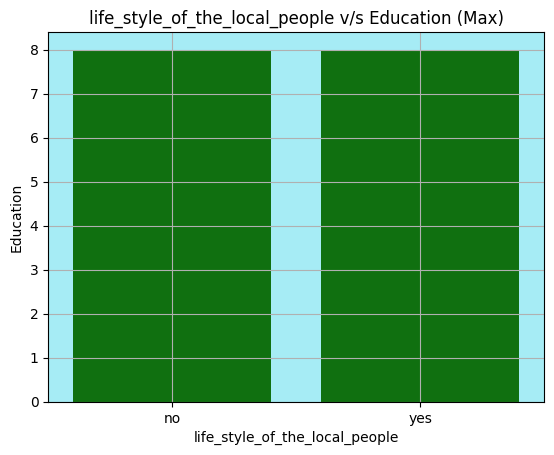

In [394]:
# Plot the barplot
sns.barplot(x='life_style_of_the_local_people', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('life_style_of_the_local_people v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data of Mean,Max and Min ,categories are quite balanced.

#### intense_experience_of_nature, Education

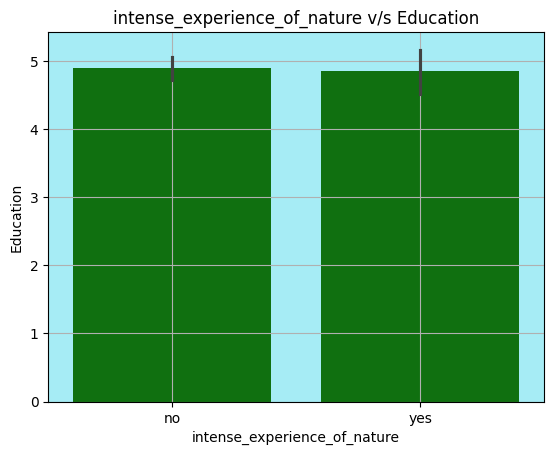

In [254]:
# Plot the barplot
sns.barplot(x='intense_experience_of_nature', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('intense_experience_of_nature v/s Education')
plt.grid()
plt.show()


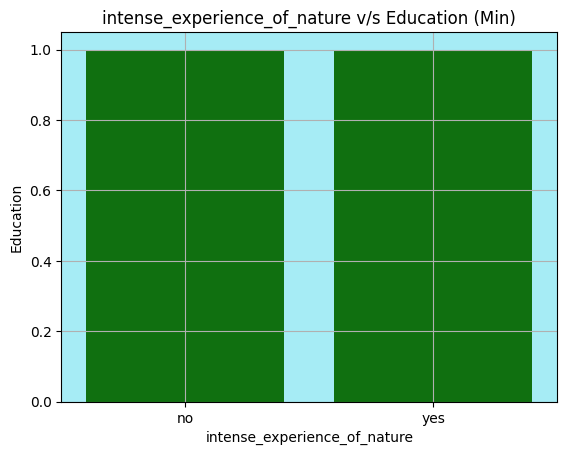

In [255]:
# Plot the barplot
sns.barplot(x='intense_experience_of_nature', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('intense_experience_of_nature v/s Education (Min)')
plt.grid()
plt.show()


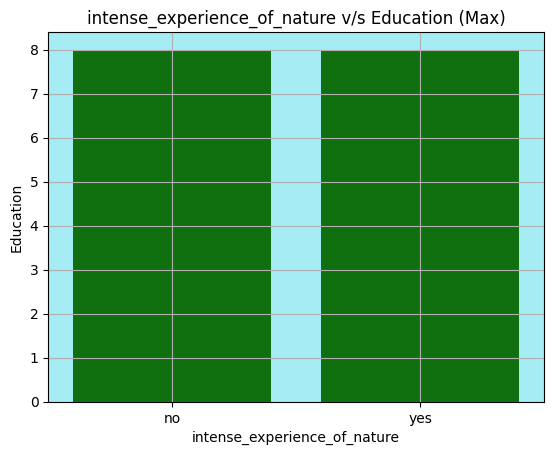

In [395]:
# Plot the barplot
sns.barplot(x='intense_experience_of_nature', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('intense_experience_of_nature v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data of Mean,Max and Min ,categories are quite balanced.

#### cosiness/familiar_atmosphere, Education

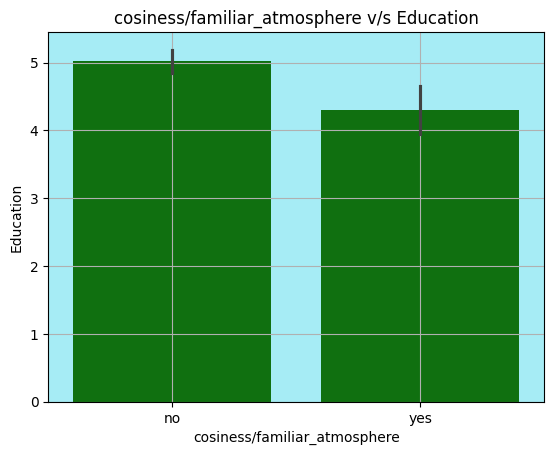

In [257]:
# Plot the barplot
sns.barplot(x='cosiness/familiar_atmosphere', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cosiness/familiar_atmosphere v/s Education')
plt.grid()
plt.show()


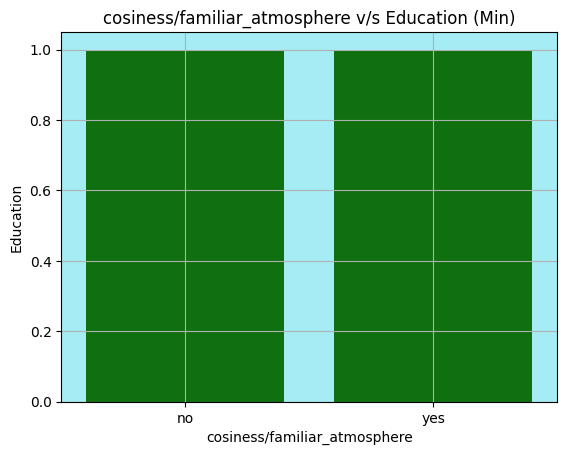

In [258]:
# Plot the barplot
sns.barplot(x='cosiness/familiar_atmosphere', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cosiness/familiar_atmosphere v/s Education (Min)')
plt.grid()
plt.show()


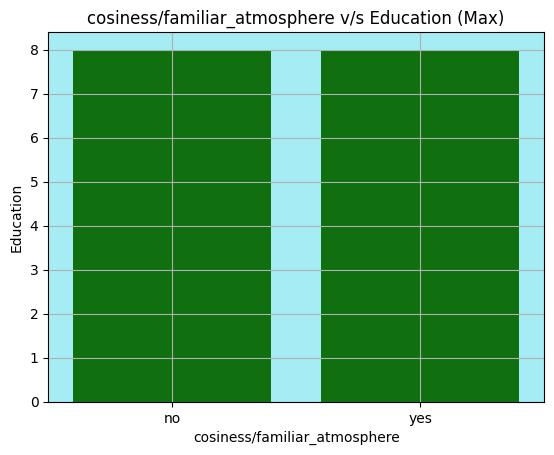

In [396]:
# Plot the barplot
sns.barplot(x='cosiness/familiar_atmosphere', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cosiness/familiar_atmosphere v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data of Mean,Max and Min ,categories are quite balanced.

#### maintain_unspoilt_surroundings, Education

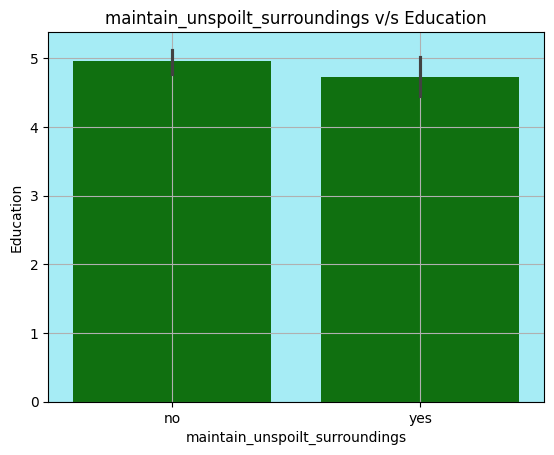

In [260]:
# Plot the barplot
sns.barplot(x='maintain_unspoilt_surroundings', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('maintain_unspoilt_surroundings v/s Education')
plt.grid()
plt.show()


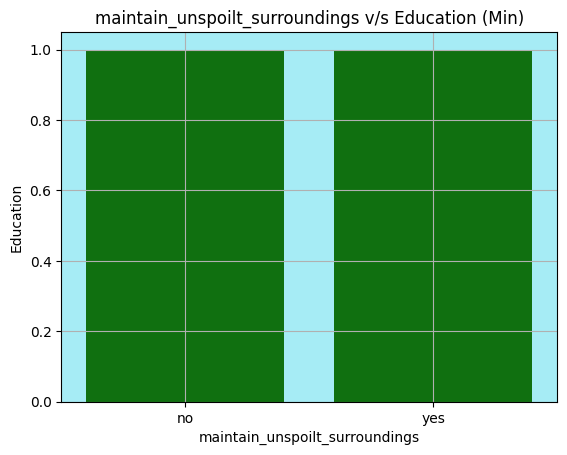

In [261]:
# Plot the barplot
sns.barplot(x='maintain_unspoilt_surroundings', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('maintain_unspoilt_surroundings v/s Education (Min)')
plt.grid()
plt.show()


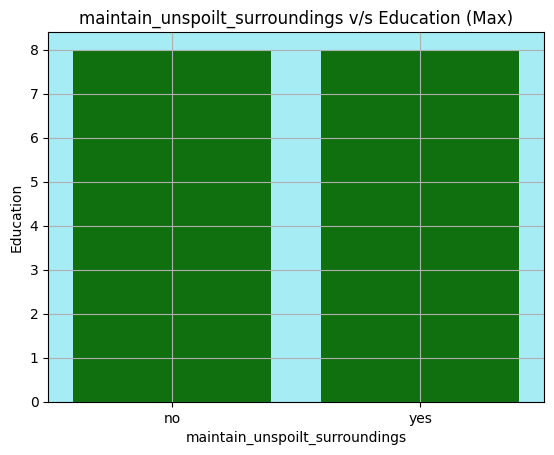

In [397]:
# Plot the barplot
sns.barplot(x='maintain_unspoilt_surroundings', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('maintain_unspoilt_surroundings v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data of Mean,Max and Min ,categories are quite balanced.

#### everything_organised, Education

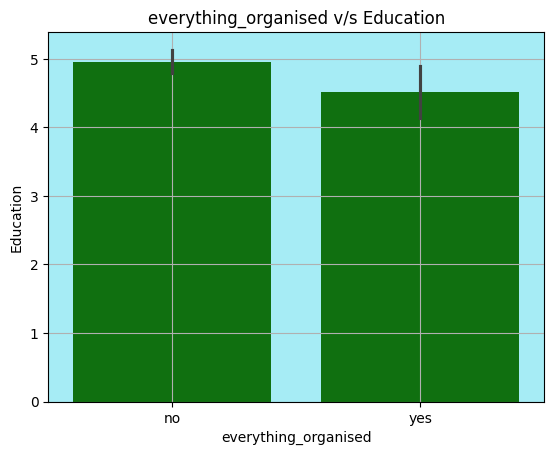

In [263]:
# Plot the barplot
sns.barplot(x='everything_organised', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('everything_organised v/s Education')
plt.grid()
plt.show()


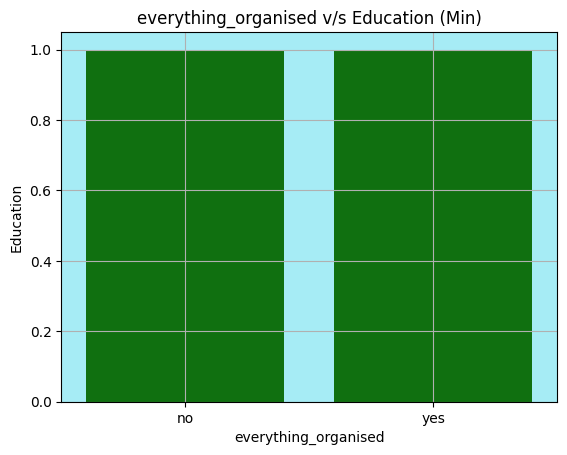

In [264]:
# Plot the barplot
sns.barplot(x='everything_organised', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('everything_organised v/s Education (Min)')
plt.grid()
plt.show()


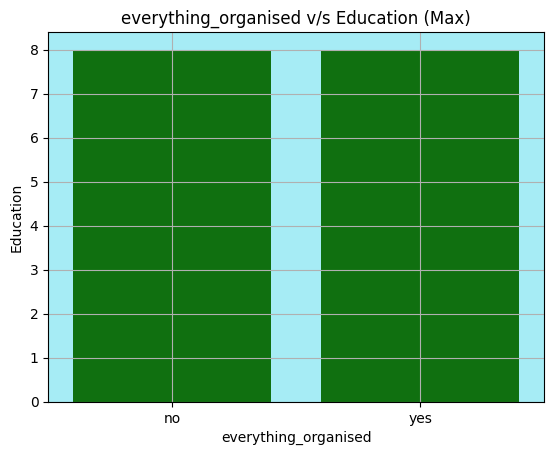

In [398]:
# Plot the barplot
sns.barplot(x='everything_organised', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('everything_organised v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data of Mean,Max and Min ,categories are quite balanced.

#### unspoilt_nature/natural_landscape, Education

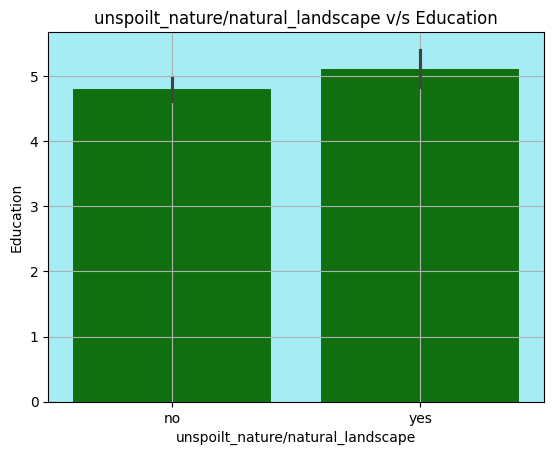

In [266]:
# Plot the barplot
sns.barplot(x='unspoilt_nature/natural_landscape', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('unspoilt_nature/natural_landscape v/s Education')
plt.grid()
plt.show()


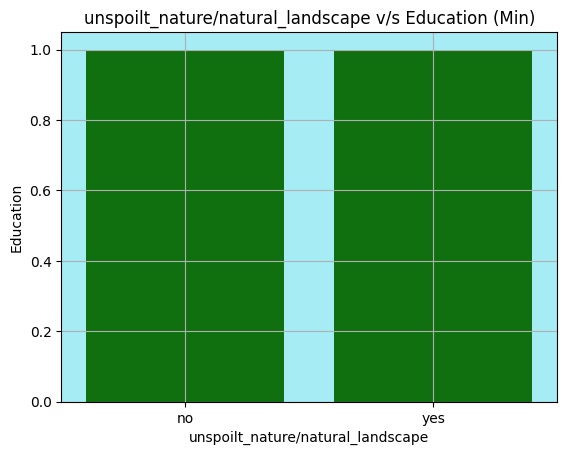

In [267]:
# Plot the barplot
sns.barplot(x='unspoilt_nature/natural_landscape', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('unspoilt_nature/natural_landscape v/s Education (Min)')
plt.grid()
plt.show()


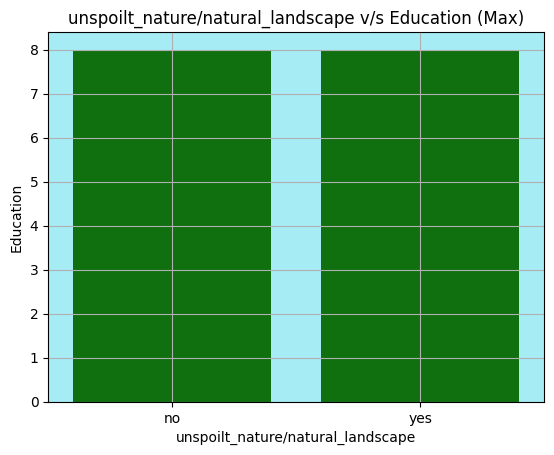

In [399]:
# Plot the barplot
sns.barplot(x='unspoilt_nature/natural_landscape', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('unspoilt_nature/natural_landscape v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data of Mean,Max and Min ,categories are quite balanced.

#### cultural_offers, Education

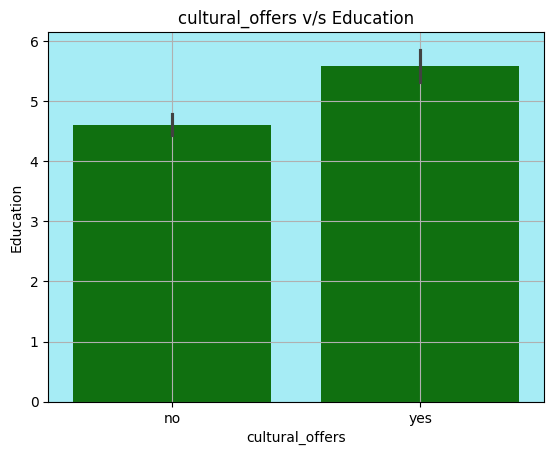

In [269]:
# Plot the barplot
sns.barplot(x='cultural_offers', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cultural_offers v/s Education')
plt.grid()
plt.show()


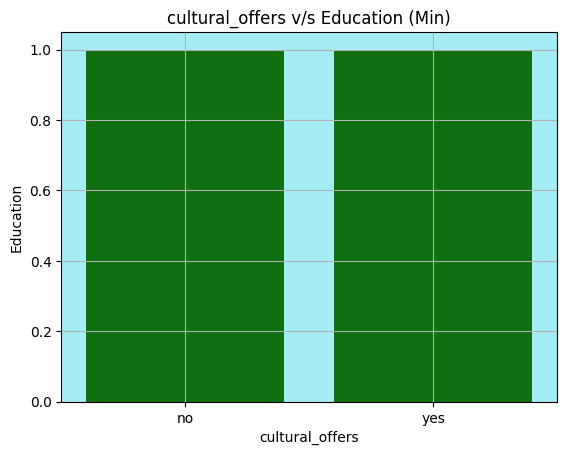

In [270]:
# Plot the barplot
sns.barplot(x='cultural_offers', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cultural_offers v/s Education (Min)')
plt.grid()
plt.show()


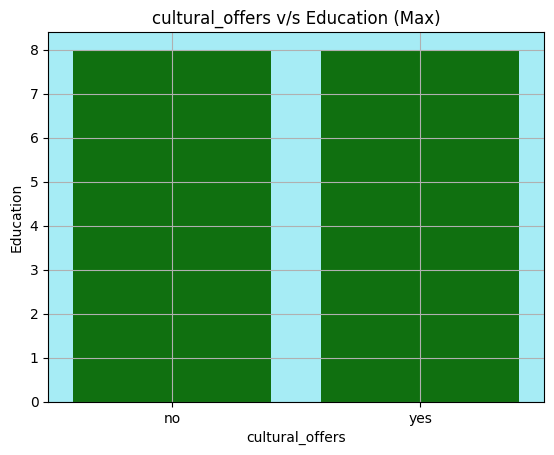

In [400]:
# Plot the barplot
sns.barplot(x='cultural_offers', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cultural_offers v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data of Mean,Max and Min ,categories are quite balanced.

#### change_of_surroundings, Education

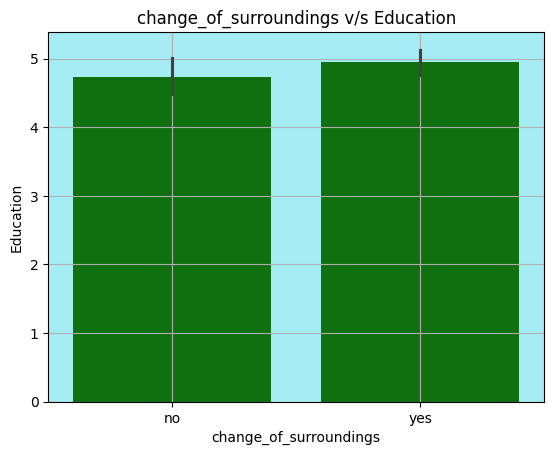

In [272]:
# Plot the barplot
sns.barplot(x='change_of_surroundings', y='Education', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('change_of_surroundings v/s Education')
plt.grid()
plt.show()


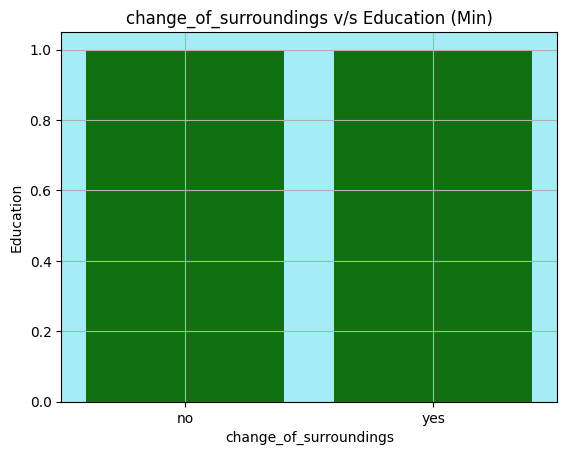

In [273]:
# Plot the barplot
sns.barplot(x='change_of_surroundings', y='Education', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('change_of_surroundings v/s Education (Min)')
plt.grid()
plt.show()


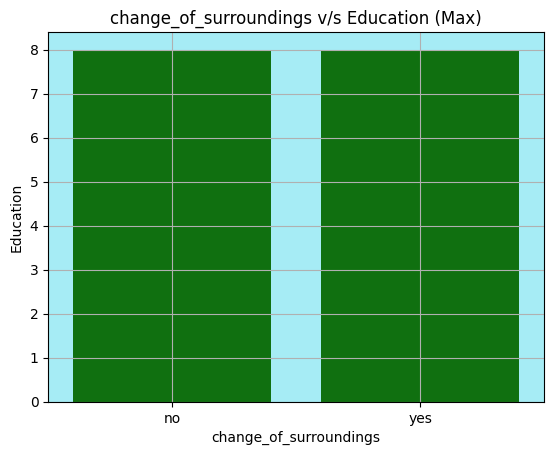

In [401]:
# Plot the barplot
sns.barplot(x='change_of_surroundings', y='Education', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('change_of_surroundings v/s Education (Max)')
plt.grid()
plt.show()


**INTERPRETATION**

 - In the data of Mean,Max and Min ,categories are quite balanced.

#### Gender, obligation_rating

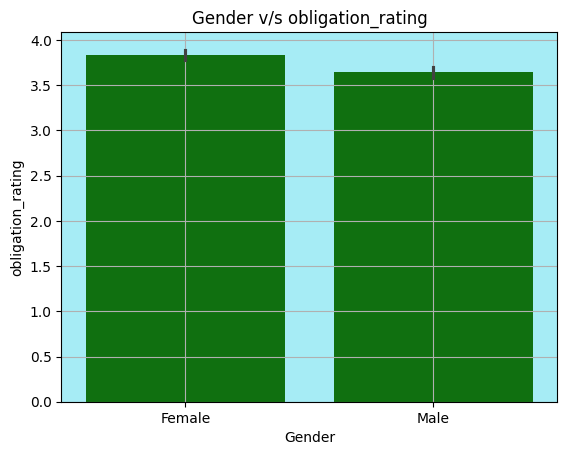

In [275]:
# Plot the barplot
sns.barplot(x='Gender', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Gender v/s obligation_rating')
plt.grid()
plt.show()


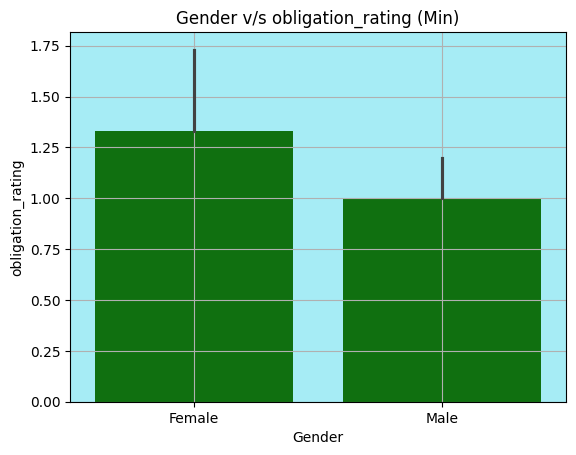

In [276]:
# Plot the barplot
sns.barplot(x='Gender', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Gender v/s obligation_rating (Min)')
plt.grid()
plt.show()


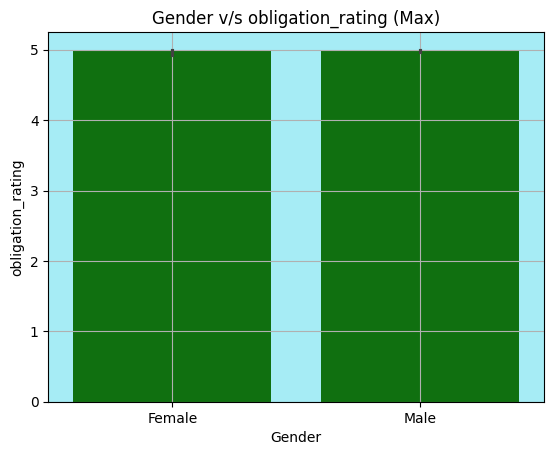

In [402]:
# Plot the barplot
sns.barplot(x='Gender', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('Gender v/s obligation_rating (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - 

#### Occupation, obligation_rating

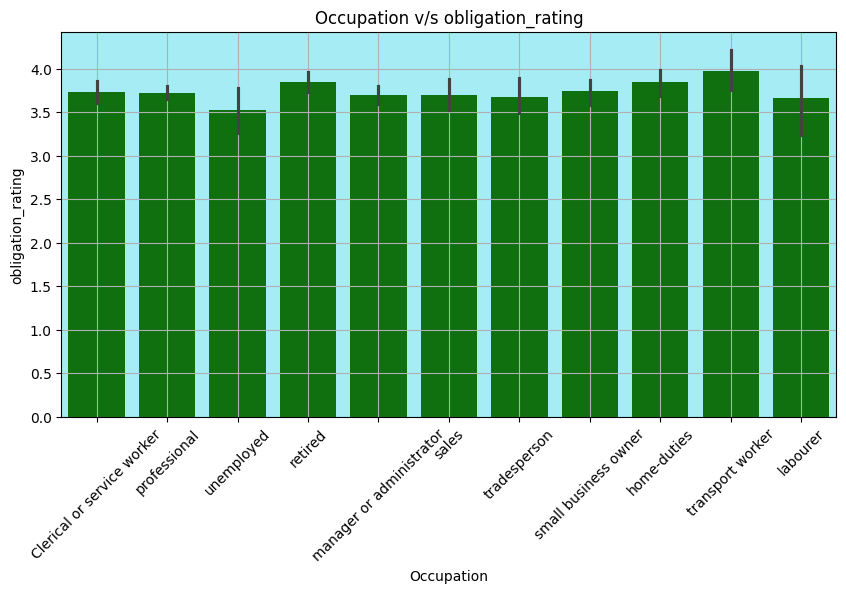

In [278]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='Occupation', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.xticks(rotation=45)
plt.title('Occupation v/s obligation_rating')
plt.grid()
plt.show()


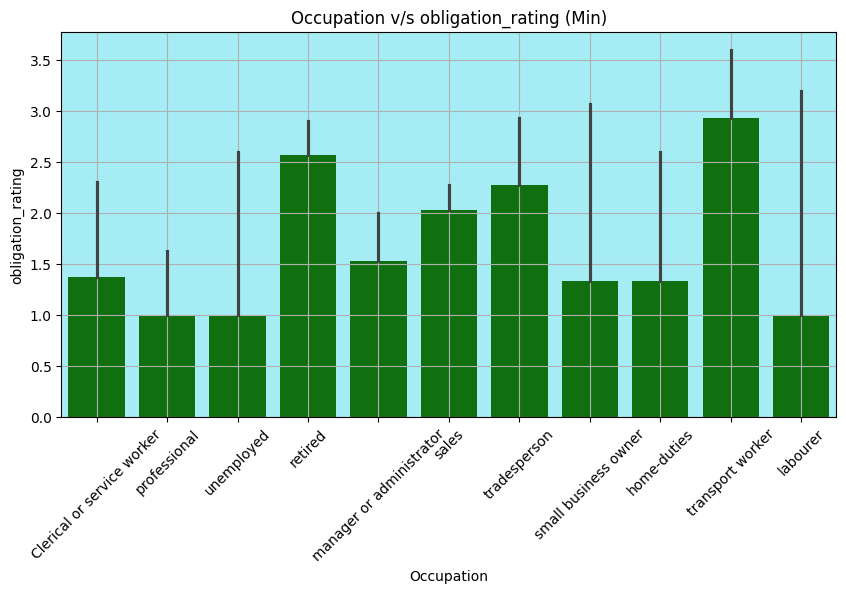

In [279]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='Occupation', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.xticks(rotation=45)
plt.title('Occupation v/s obligation_rating (Min)')
plt.grid()
plt.show()


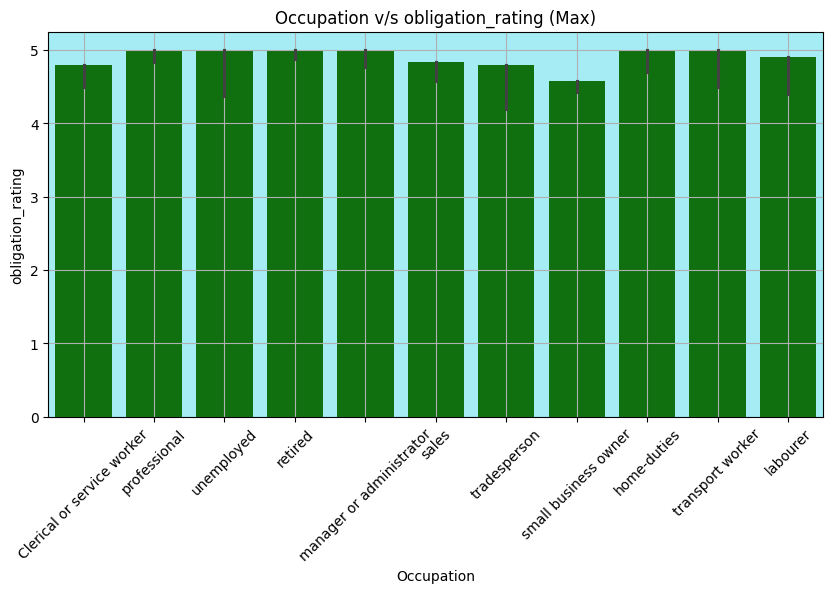

In [403]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='Occupation', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.xticks(rotation=45)
plt.title('Occupation v/s obligation_rating (Max)')
plt.grid()
plt.show()


**INTERPRETATION**
 - In the data of Mean,Max and Min ,categories are quite balanced.

#### State, obligation_rating

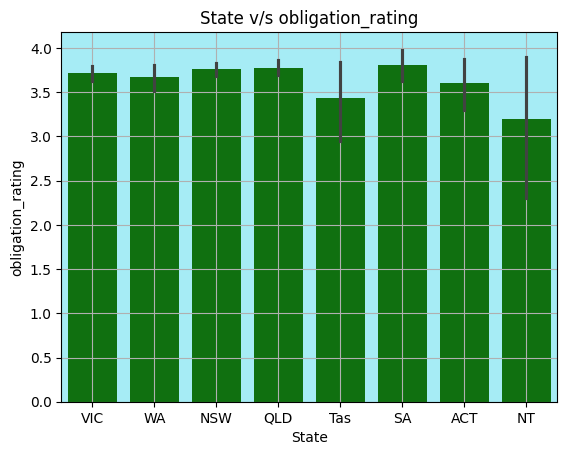

In [281]:
# Plot the barplot
sns.barplot(x='State', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('State v/s obligation_rating')
plt.grid()
plt.show()


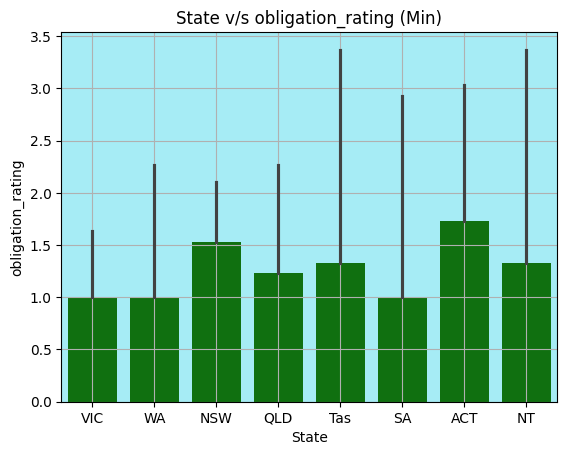

In [282]:
# Plot the barplot
sns.barplot(x='State', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('State v/s obligation_rating (Min)')
plt.grid()
plt.show()


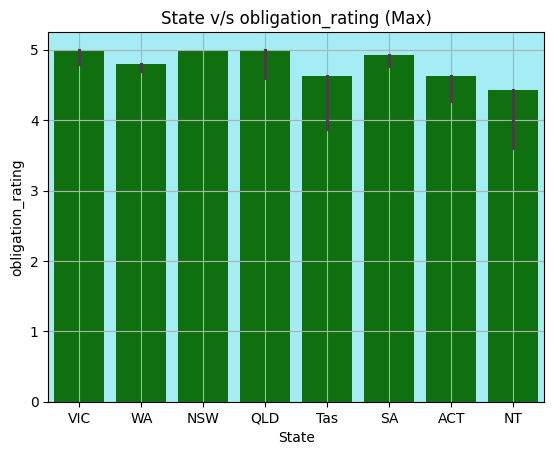

In [283]:
# Plot the barplot
sns.barplot(x='State', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('State v/s obligation_rating (Max)')
plt.grid()
plt.show()


#### relationship_status, obligation_rating

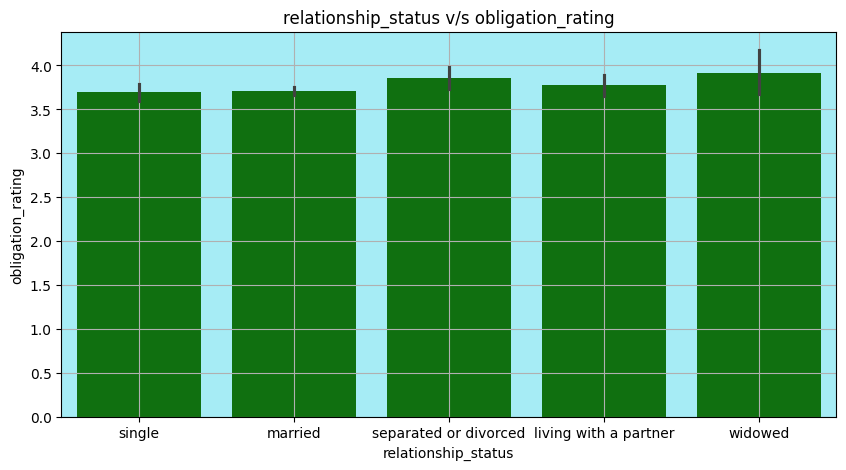

In [284]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='relationship_status', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('relationship_status v/s obligation_rating')
plt.grid()
plt.show()


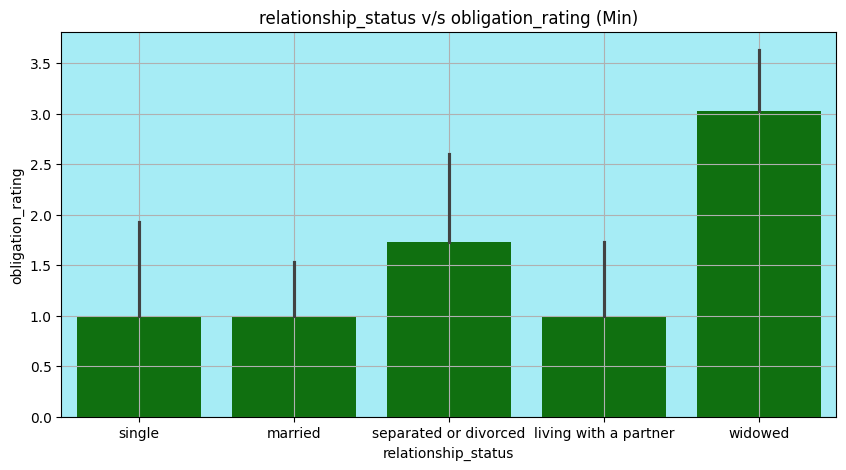

In [285]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='relationship_status', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('relationship_status v/s obligation_rating (Min)')
plt.grid()
plt.show()


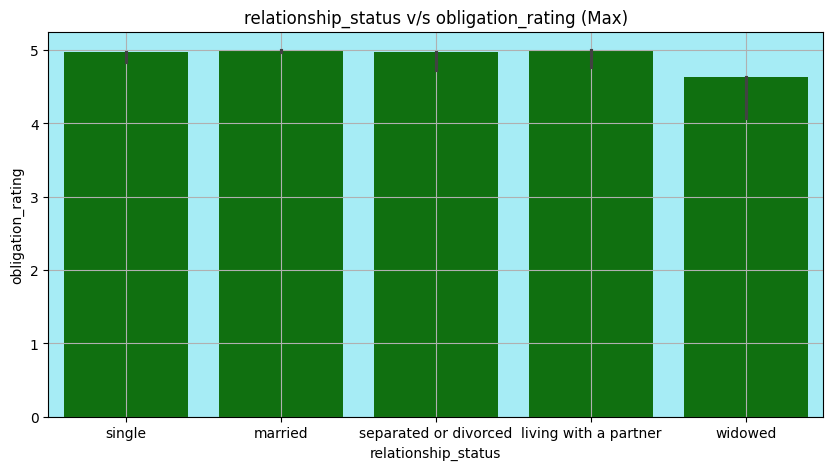

In [286]:
# Plot the barplot
plt.figure(figsize=(10,5))
sns.barplot(x='relationship_status', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('relationship_status v/s obligation_rating (Max)')
plt.grid()
plt.show()


#### obligation_category, obligation_rating

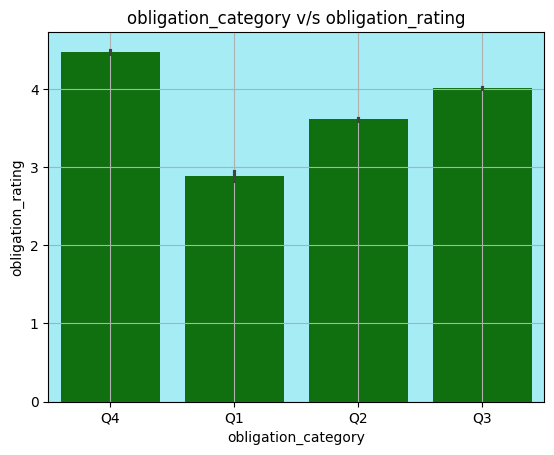

In [287]:
# Plot the barplot
sns.barplot(x='obligation_category', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('obligation_category v/s obligation_rating')
plt.grid()
plt.show()


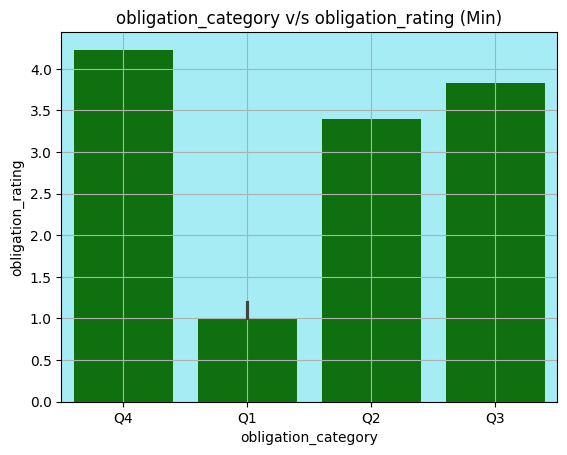

In [288]:
# Plot the barplot
sns.barplot(x='obligation_category', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('obligation_category v/s obligation_rating (Min)')
plt.grid()
plt.show()


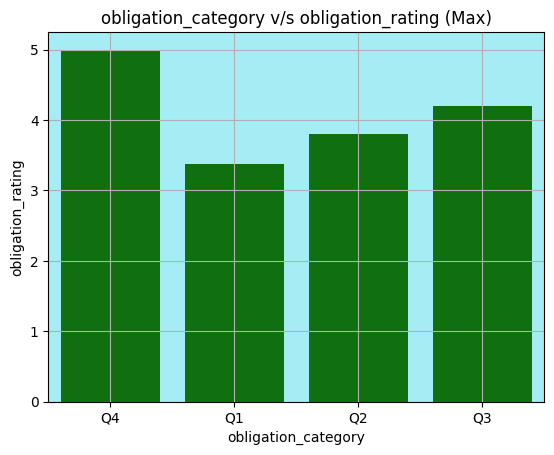

In [289]:
# Plot the barplot
sns.barplot(x='obligation_category', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('obligation_category v/s obligation_rating (Max)')
plt.grid()
plt.show()


#### rest_and_relax, obligation_rating

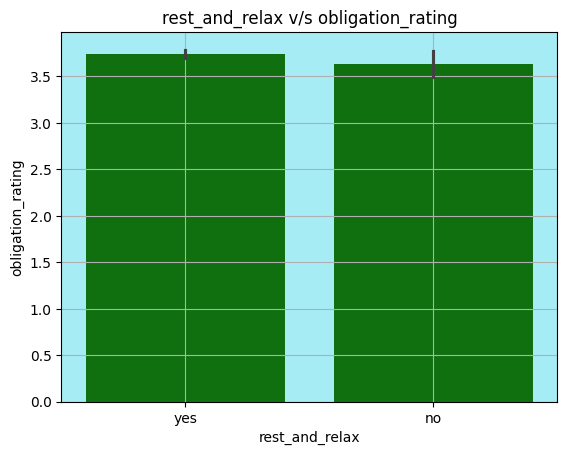

In [290]:
# Plot the barplot
sns.barplot(x='rest_and_relax', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('rest_and_relax v/s obligation_rating')
plt.grid()
plt.show()


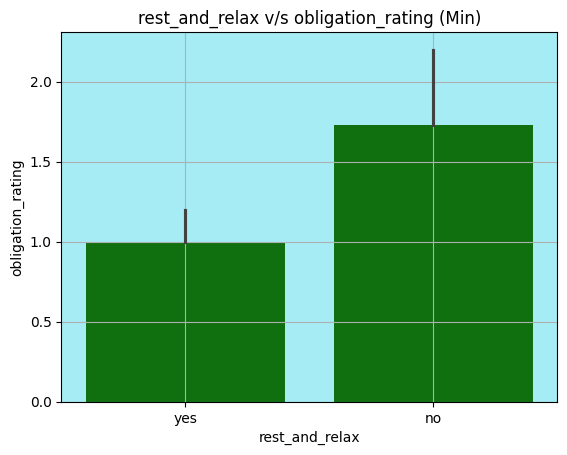

In [291]:
# Plot the barplot
sns.barplot(x='rest_and_relax', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('rest_and_relax v/s obligation_rating (Min)')
plt.grid()
plt.show()


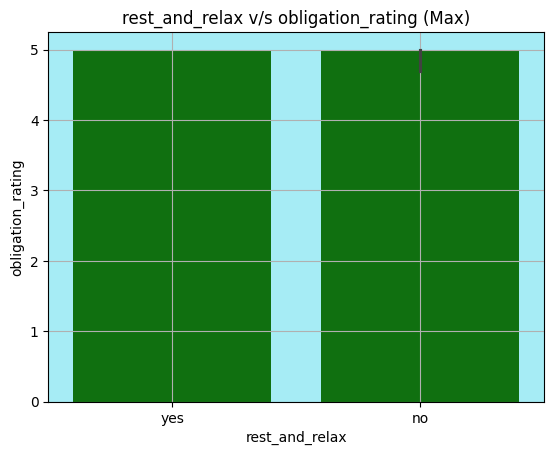

In [292]:
# Plot the barplot
sns.barplot(x='rest_and_relax', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('rest_and_relax v/s obligation_rating (Max)')
plt.grid()
plt.show()


#### luxury_or_be_spoilt, obligation_rating

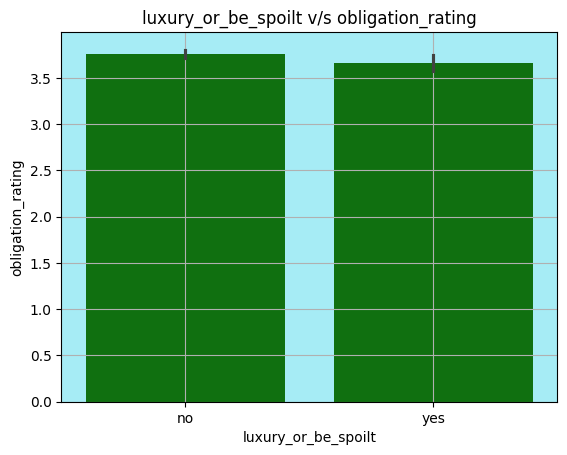

In [293]:
# Plot the barplot
sns.barplot(x='luxury_or_be_spoilt', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('luxury_or_be_spoilt v/s obligation_rating')
plt.grid()
plt.show()


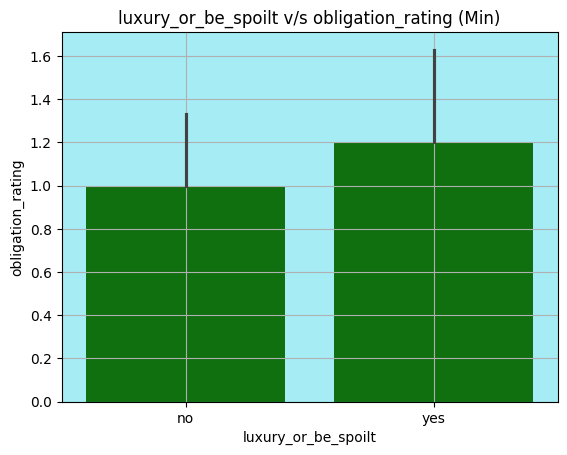

In [294]:
# Plot the barplot
sns.barplot(x='luxury_or_be_spoilt', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('luxury_or_be_spoilt v/s obligation_rating (Min)')
plt.grid()
plt.show()


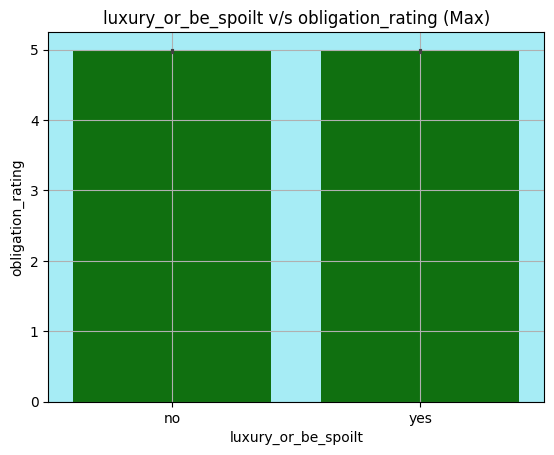

In [295]:
# Plot the barplot
sns.barplot(x='luxury_or_be_spoilt', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('luxury_or_be_spoilt v/s obligation_rating (Max)')
plt.grid()
plt.show()


#### do_sports, obligation_rating

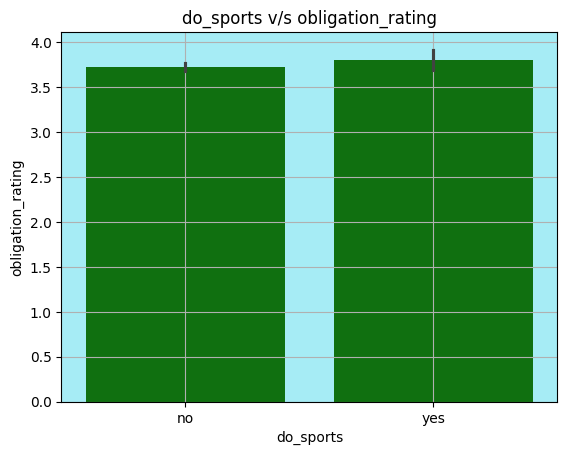

In [296]:
# Plot the barplot
sns.barplot(x='do_sports', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('do_sports v/s obligation_rating')
plt.grid()
plt.show()


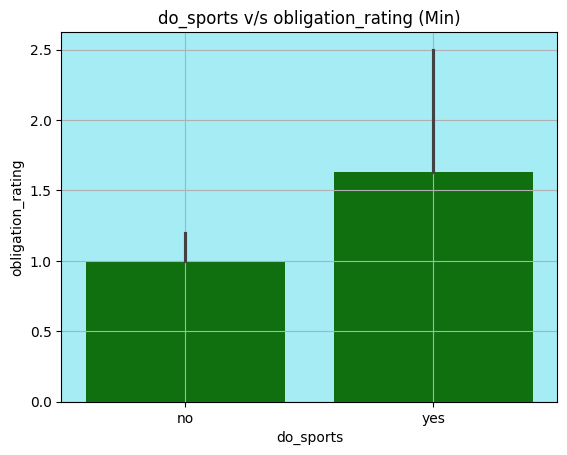

In [297]:
# Plot the barplot
sns.barplot(x='do_sports', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('do_sports v/s obligation_rating (Min)')
plt.grid()
plt.show()


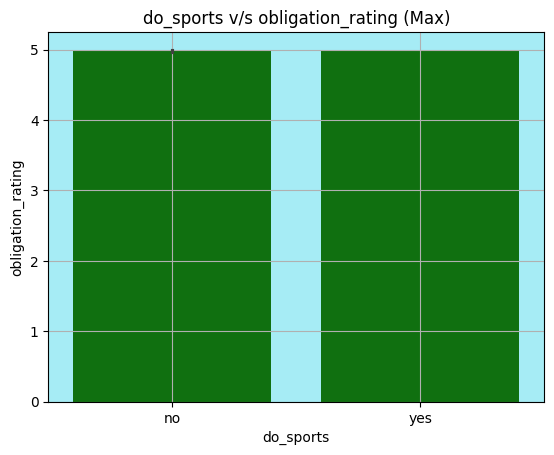

In [298]:
# Plot the barplot
sns.barplot(x='do_sports', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('do_sports v/s obligation_rating (Max)')
plt.grid()
plt.show()


#### excitement_and_challenge, obligation_rating

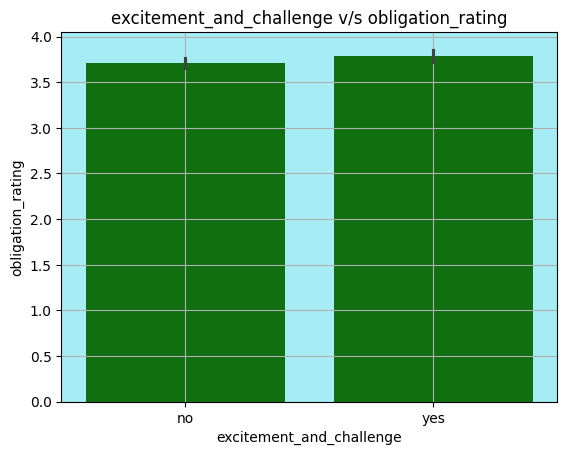

In [299]:
# Plot the barplot
sns.barplot(x='excitement_and_challenge', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('excitement_and_challenge v/s obligation_rating')
plt.grid()
plt.show()


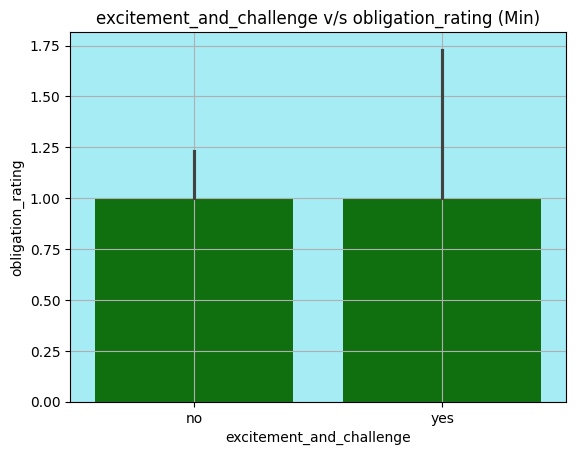

In [300]:
# Plot the barplot
sns.barplot(x='excitement_and_challenge', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('excitement_and_challenge v/s obligation_rating (Min)')
plt.grid()
plt.show()


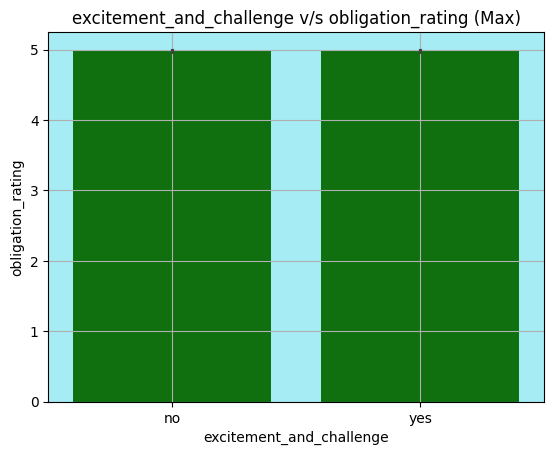

In [301]:
# Plot the barplot
sns.barplot(x='excitement_and_challenge', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('excitement_and_challenge v/s obligation_rating (Max)')
plt.grid()
plt.show()


#### not_exceed_planned_budget, obligation_rating

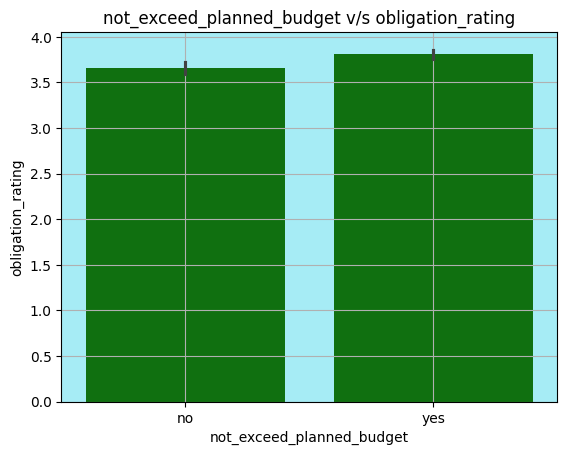

In [302]:
# Plot the barplot
sns.barplot(x='not_exceed_planned_budget', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_exceed_planned_budget v/s obligation_rating')
plt.grid()
plt.show()


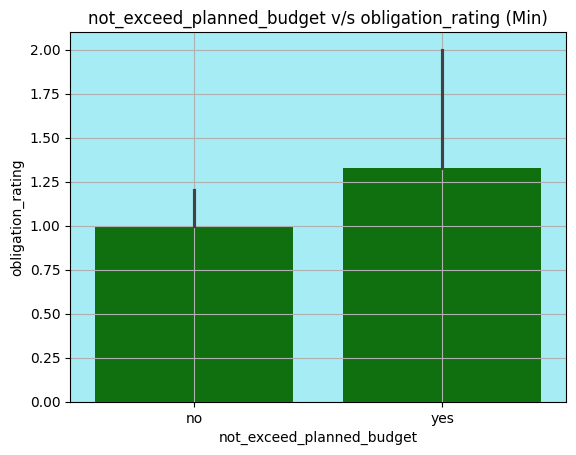

In [303]:
# Plot the barplot
sns.barplot(x='not_exceed_planned_budget', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_exceed_planned_budget v/s obligation_rating (Min)')
plt.grid()
plt.show()


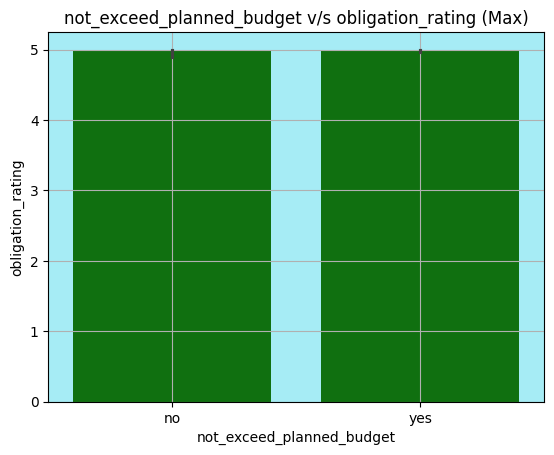

In [304]:
# Plot the barplot
sns.barplot(x='not_exceed_planned_budget', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_exceed_planned_budget v/s obligation_rating (Max)')
plt.grid()
plt.show()


#### realise_creativity, obligation_rating

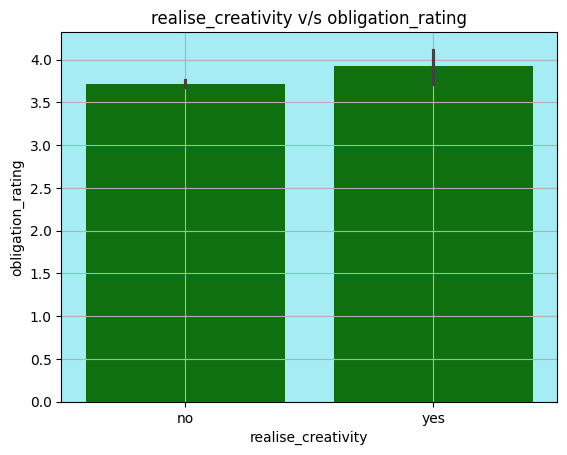

In [305]:
# Plot the barplot
sns.barplot(x='realise_creativity', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('realise_creativity v/s obligation_rating')
plt.grid()
plt.show()


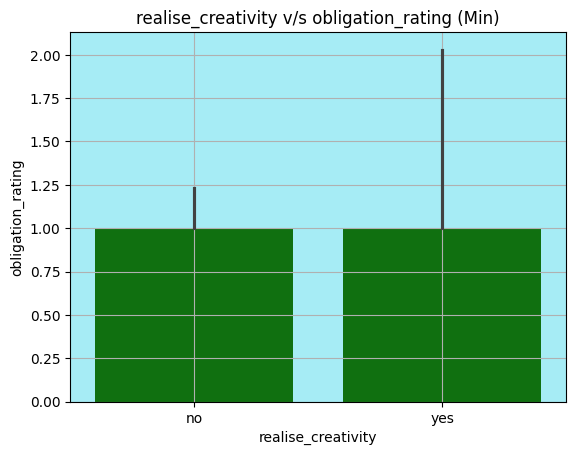

In [306]:
# Plot the barplot
sns.barplot(x='realise_creativity', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('realise_creativity v/s obligation_rating (Min)')
plt.grid()
plt.show()


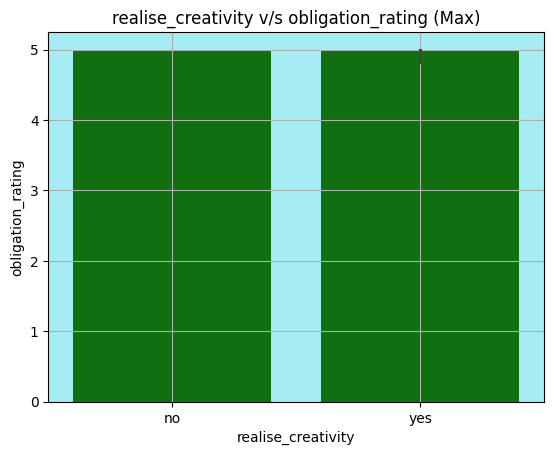

In [307]:
# Plot the barplot
sns.barplot(x='realise_creativity', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('realise_creativity v/s obligation_rating (Max)')
plt.grid()
plt.show()


#### fun_and_entertainment, obligation_rating

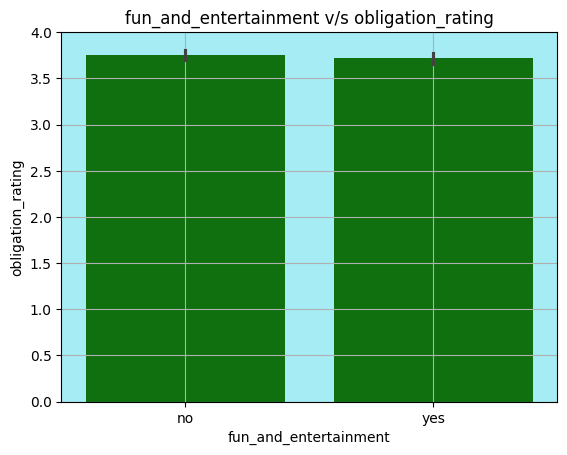

In [308]:
# Plot the barplot
sns.barplot(x='fun_and_entertainment', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('fun_and_entertainment v/s obligation_rating')
plt.grid()
plt.show()


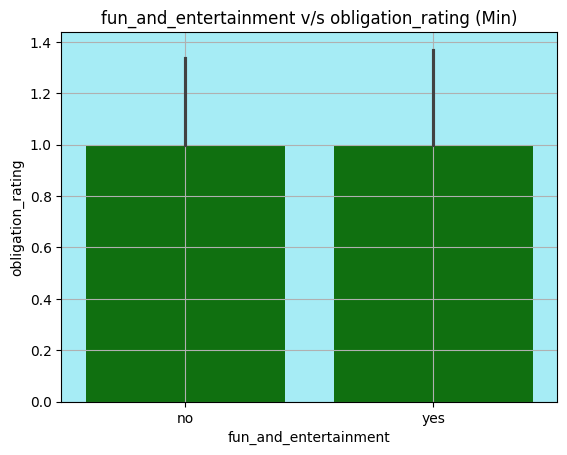

In [309]:
# Plot the barplot
sns.barplot(x='fun_and_entertainment', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('fun_and_entertainment v/s obligation_rating (Min)')
plt.grid()
plt.show()


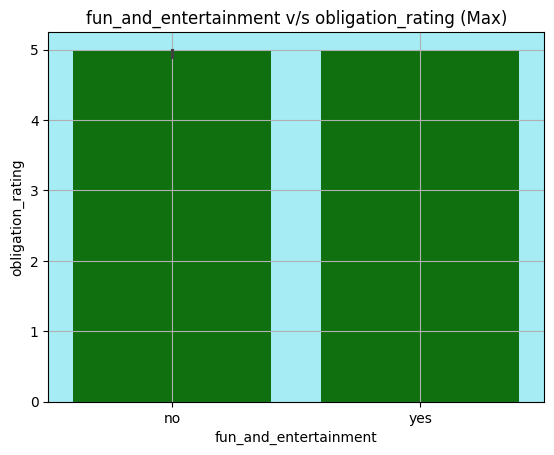

In [310]:
# Plot the barplot
sns.barplot(x='fun_and_entertainment', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('fun_and_entertainment v/s obligation_rating (Max)')
plt.grid()
plt.show()


#### good_company, obligation_rating

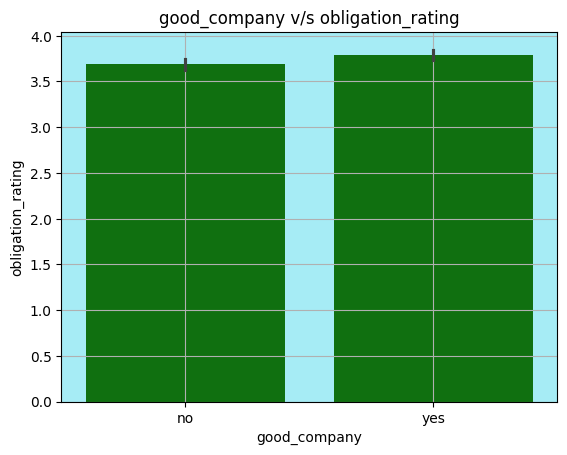

In [311]:
# Plot the barplot
sns.barplot(x='good_company', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('good_company v/s obligation_rating')
plt.grid()
plt.show()


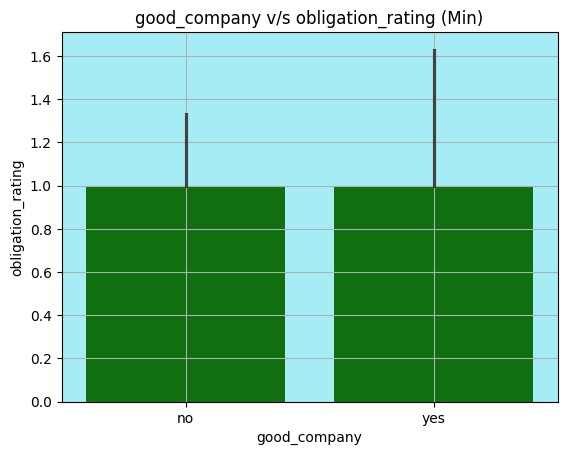

In [312]:
# Plot the barplot
sns.barplot(x='good_company', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('good_company v/s obligation_rating (Min)')
plt.grid()
plt.show()


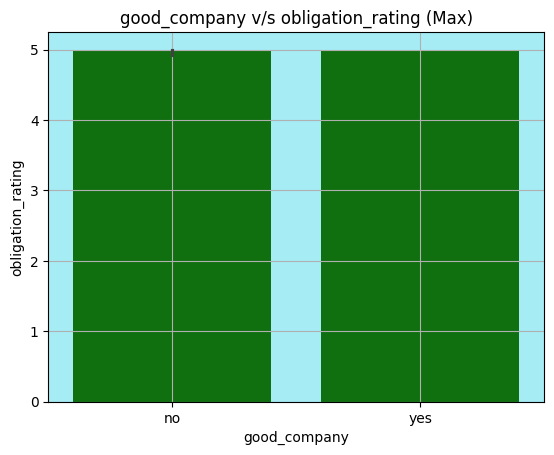

In [313]:
# Plot the barplot
sns.barplot(x='good_company', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('good_company v/s obligation_rating (Max)')
plt.grid()
plt.show()


#### health_and_beauty, obligation_rating

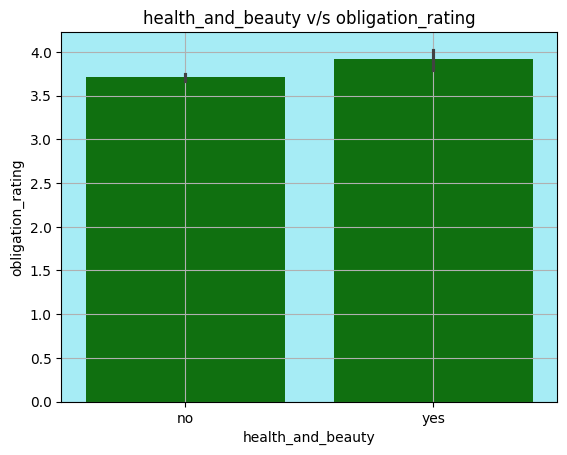

In [314]:
# Plot the barplot
sns.barplot(x='health_and_beauty', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('health_and_beauty v/s obligation_rating')
plt.grid()
plt.show()


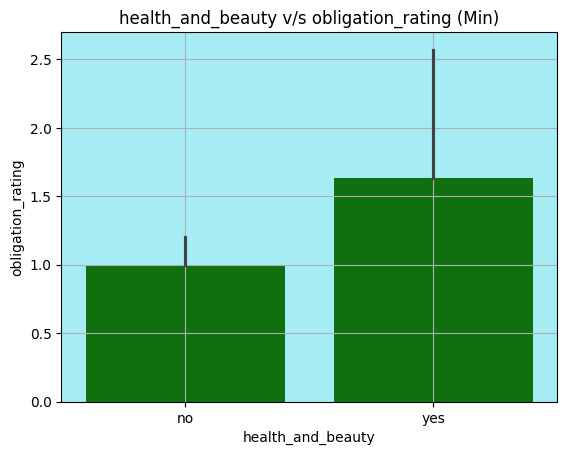

In [315]:
# Plot the barplot
sns.barplot(x='health_and_beauty', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('health_and_beauty v/s obligation_rating (Min)')
plt.grid()
plt.show()


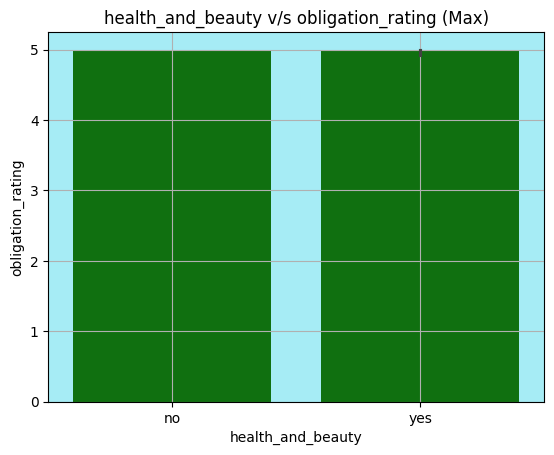

In [316]:
# Plot the barplot
sns.barplot(x='health_and_beauty', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('health_and_beauty v/s obligation_rating (Max)')
plt.grid()
plt.show()


#### free_and_easy_going, obligation_rating

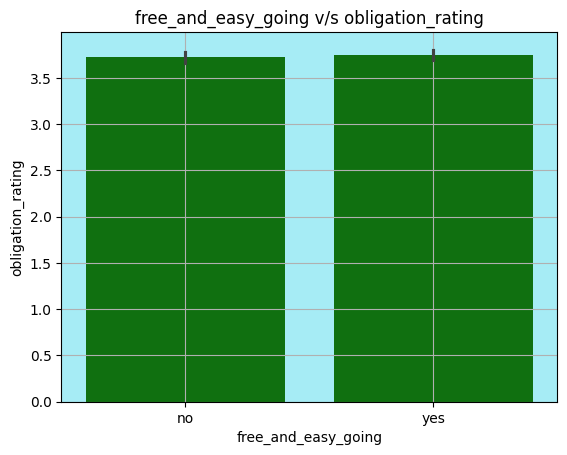

In [317]:
# Plot the barplot
sns.barplot(x='free_and_easy_going', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('free_and_easy_going v/s obligation_rating')
plt.grid()
plt.show()


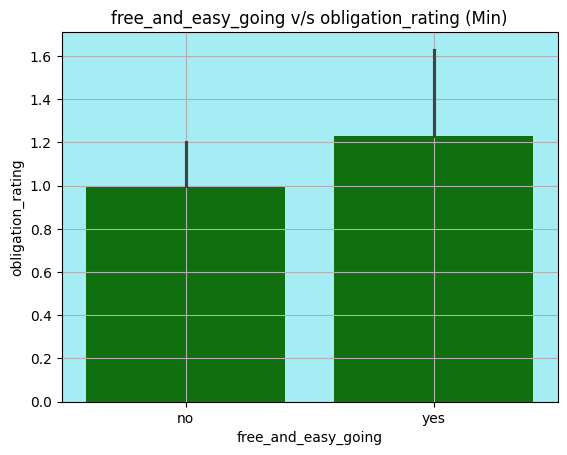

In [318]:
# Plot the barplot
sns.barplot(x='free_and_easy_going', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('free_and_easy_going v/s obligation_rating (Min)')
plt.grid()
plt.show()


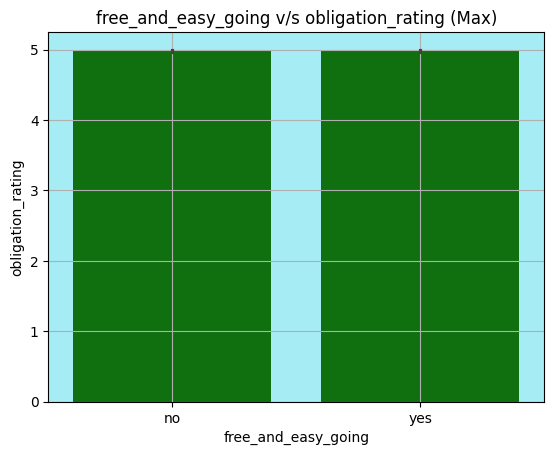

In [319]:
# Plot the barplot
sns.barplot(x='free_and_easy_going', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('free_and_easy_going v/s obligation_rating (Max)')
plt.grid()
plt.show()


#### entertainment_facilities, obligation_rating

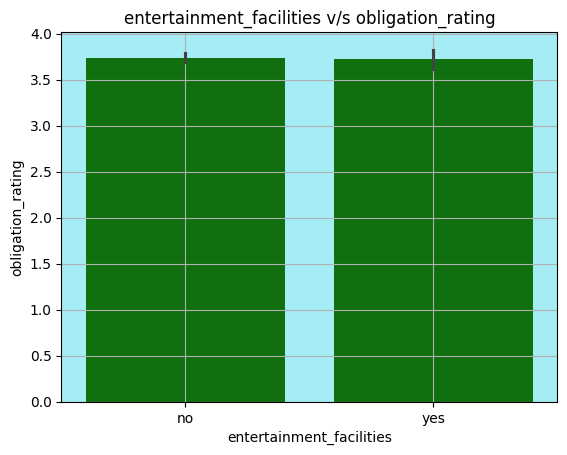

In [320]:
# Plot the barplot
sns.barplot(x='entertainment_facilities', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('entertainment_facilities v/s obligation_rating')
plt.grid()
plt.show()


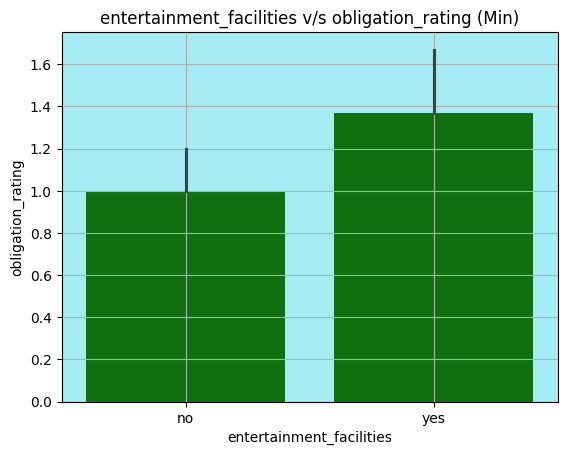

In [321]:
# Plot the barplot
sns.barplot(x='entertainment_facilities', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('entertainment_facilities v/s obligation_rating (Min)')
plt.grid()
plt.show()


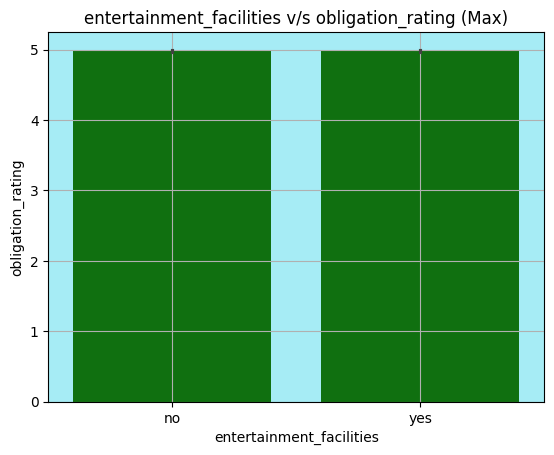

In [322]:
# Plot the barplot
sns.barplot(x='entertainment_facilities', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('entertainment_facilities v/s obligation_rating (Max)')
plt.grid()
plt.show()


#### not_care_about_prices, obligation_rating

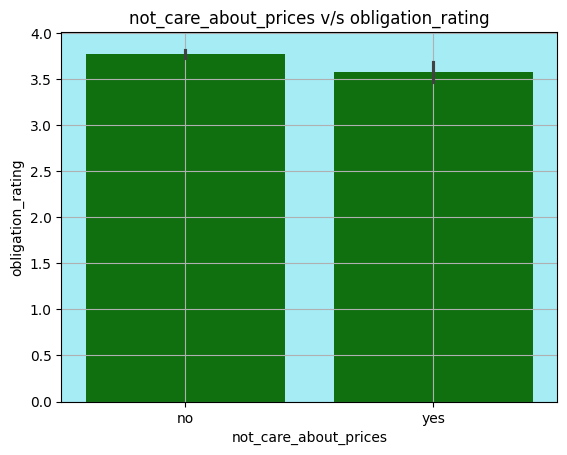

In [323]:
# Plot the barplot
sns.barplot(x='not_care_about_prices', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_care_about_prices v/s obligation_rating')
plt.grid()
plt.show()


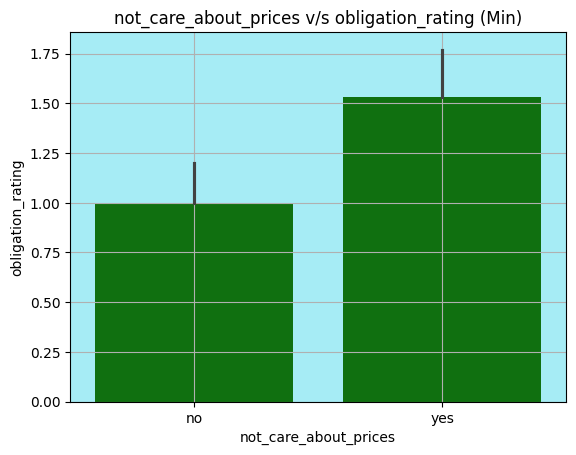

In [324]:
# Plot the barplot
sns.barplot(x='not_care_about_prices', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_care_about_prices v/s obligation_rating (Min)')
plt.grid()
plt.show()


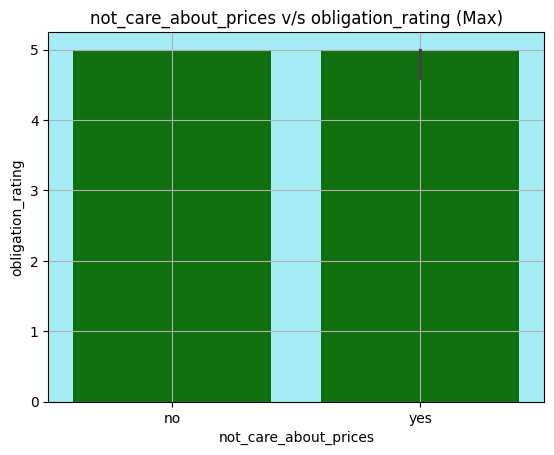

In [325]:
# Plot the barplot
sns.barplot(x='not_care_about_prices', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('not_care_about_prices v/s obligation_rating (Max)')
plt.grid()
plt.show()


#### life_style_of_the_local_people, obligation_rating

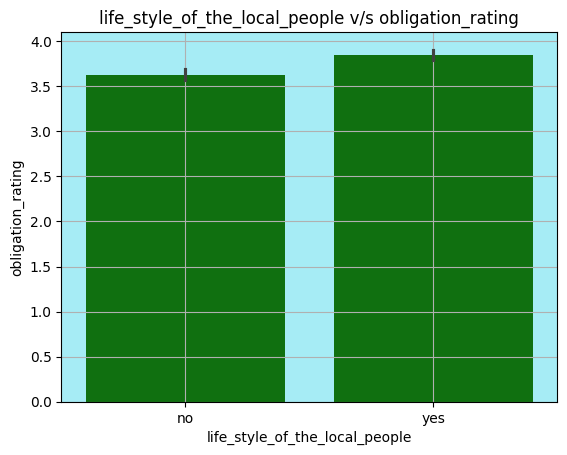

In [326]:
# Plot the barplot
sns.barplot(x='life_style_of_the_local_people', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('life_style_of_the_local_people v/s obligation_rating')
plt.grid()
plt.show()


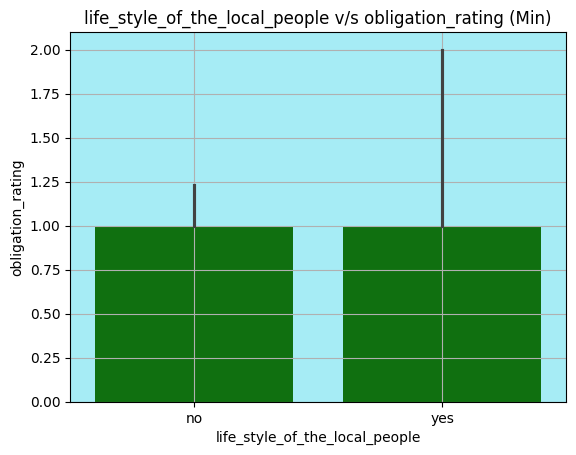

In [327]:
# Plot the barplot
sns.barplot(x='life_style_of_the_local_people', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('life_style_of_the_local_people v/s obligation_rating (Min)')
plt.grid()
plt.show()


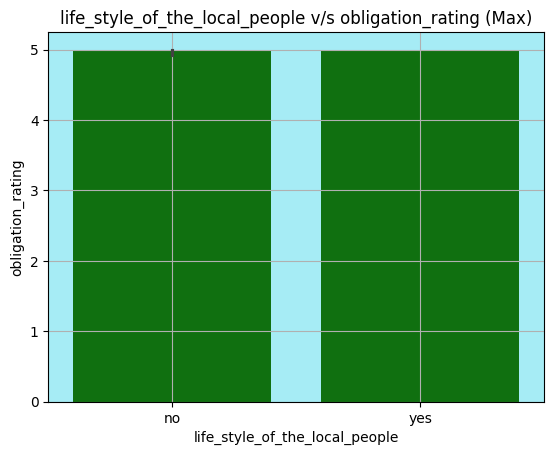

In [328]:
# Plot the barplot
sns.barplot(x='life_style_of_the_local_people', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('life_style_of_the_local_people v/s obligation_rating (Max)')
plt.grid()
plt.show()


#### intense_experience_of_nature, obligation_rating

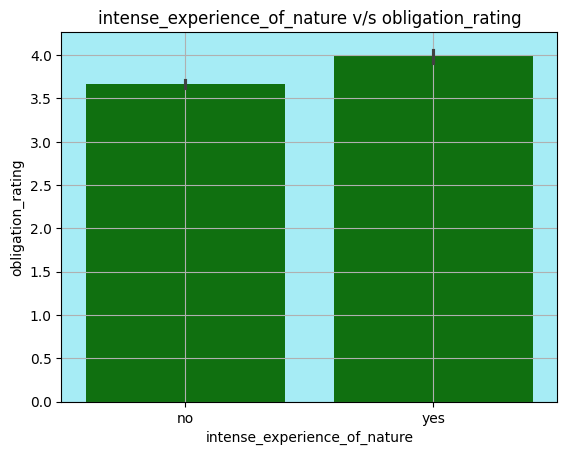

In [329]:
# Plot the barplot
sns.barplot(x='intense_experience_of_nature', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('intense_experience_of_nature v/s obligation_rating')
plt.grid()
plt.show()


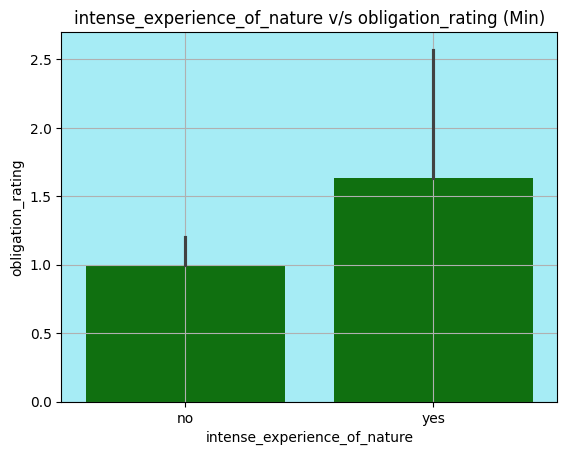

In [330]:
# Plot the barplot
sns.barplot(x='intense_experience_of_nature', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('intense_experience_of_nature v/s obligation_rating (Min)')
plt.grid()
plt.show()


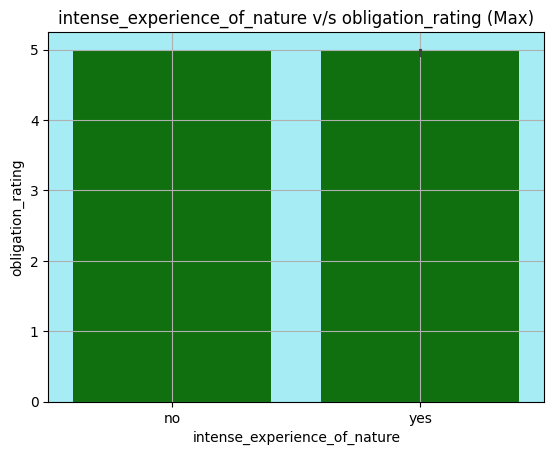

In [331]:
# Plot the barplot
sns.barplot(x='intense_experience_of_nature', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('intense_experience_of_nature v/s obligation_rating (Max)')
plt.grid()
plt.show()


#### cosiness/familiar_atmosphere, obligation_rating

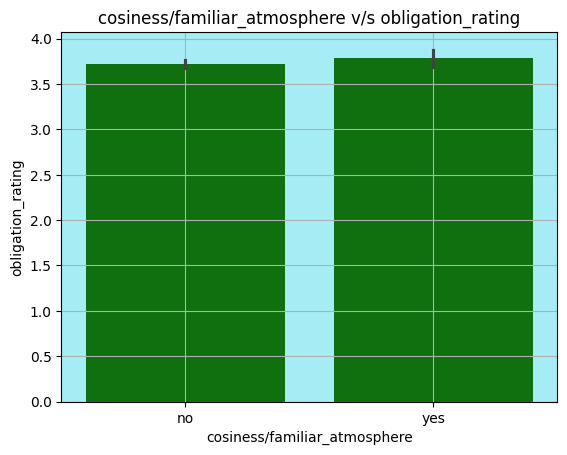

In [332]:
# Plot the barplot
sns.barplot(x='cosiness/familiar_atmosphere', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cosiness/familiar_atmosphere v/s obligation_rating')
plt.grid()
plt.show()


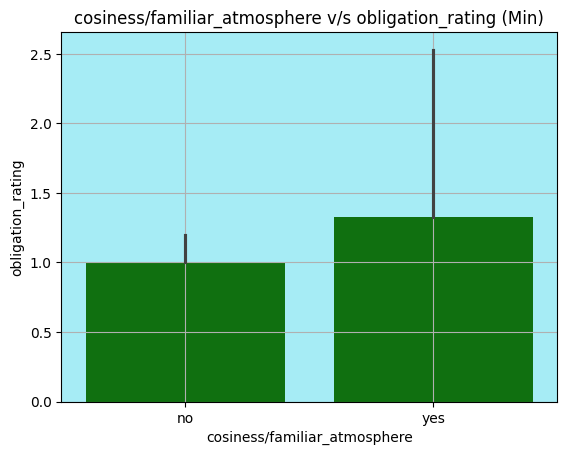

In [333]:
# Plot the barplot
sns.barplot(x='cosiness/familiar_atmosphere', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cosiness/familiar_atmosphere v/s obligation_rating (Min)')
plt.grid()
plt.show()


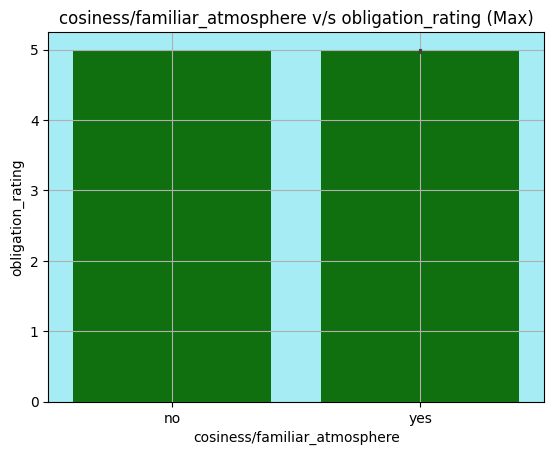

In [334]:
# Plot the barplot
sns.barplot(x='cosiness/familiar_atmosphere', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cosiness/familiar_atmosphere v/s obligation_rating (Max)')
plt.grid()
plt.show()


#### maintain_unspoilt_surroundings, obligation_rating

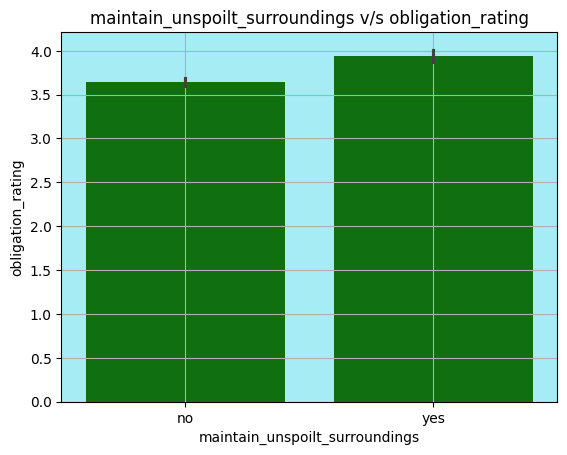

In [335]:
# Plot the barplot
sns.barplot(x='maintain_unspoilt_surroundings', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('maintain_unspoilt_surroundings v/s obligation_rating')
plt.grid()
plt.show()


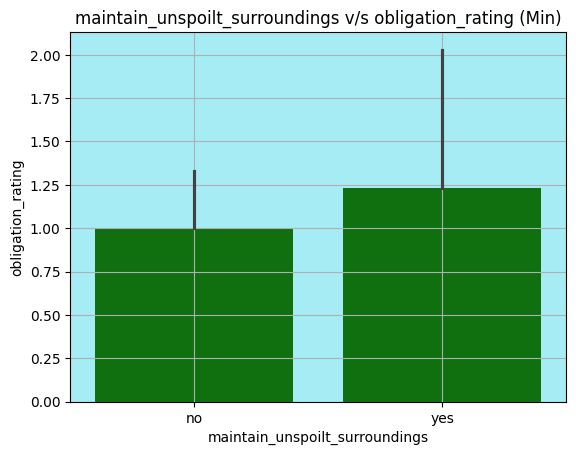

In [336]:
# Plot the barplot
sns.barplot(x='maintain_unspoilt_surroundings', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('maintain_unspoilt_surroundings v/s obligation_rating (Min)')
plt.grid()
plt.show()


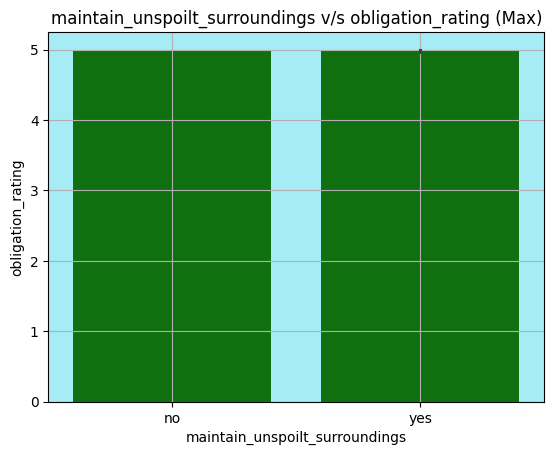

In [337]:
# Plot the barplot
sns.barplot(x='maintain_unspoilt_surroundings', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('maintain_unspoilt_surroundings v/s obligation_rating (Max)')
plt.grid()
plt.show()


#### everything_organised, obligation_rating

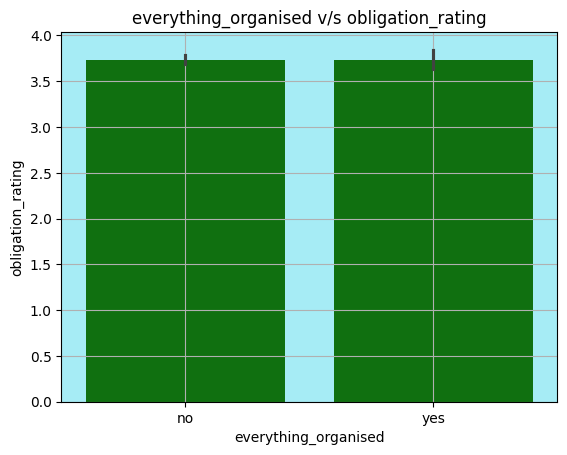

In [338]:
# Plot the barplot
sns.barplot(x='everything_organised', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('everything_organised v/s obligation_rating')
plt.grid()
plt.show()


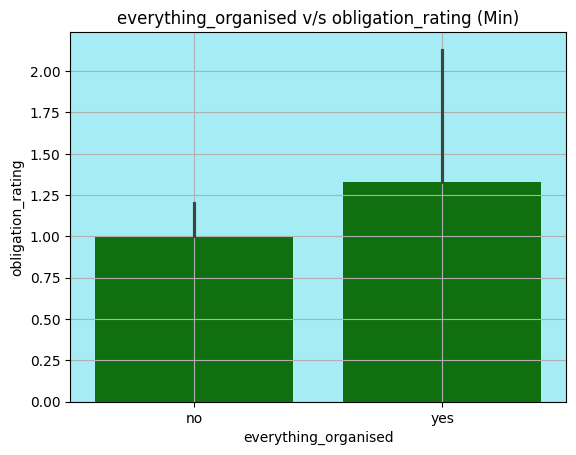

In [339]:
# Plot the barplot
sns.barplot(x='everything_organised', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('everything_organised v/s obligation_rating (Min)')
plt.grid()
plt.show()


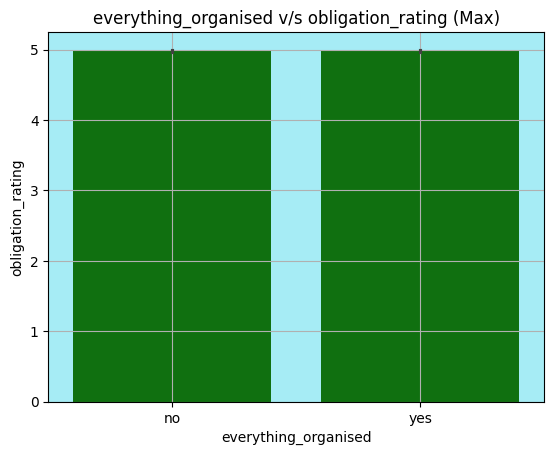

In [340]:
# Plot the barplot
sns.barplot(x='everything_organised', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('everything_organised v/s obligation_rating (Max)')
plt.grid()
plt.show()


#### unspoilt_nature/natural_landscape, obligation_rating

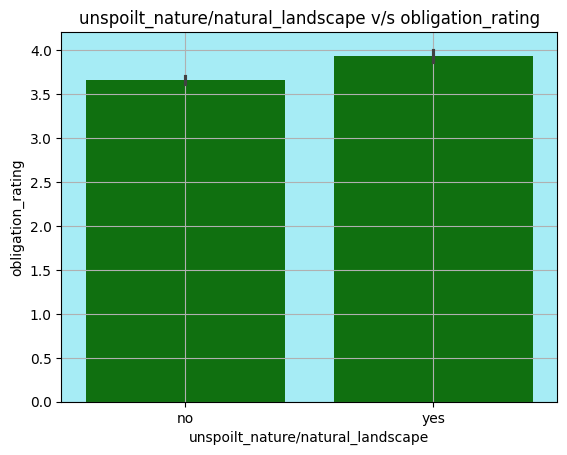

In [341]:
# Plot the barplot
sns.barplot(x='unspoilt_nature/natural_landscape', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('unspoilt_nature/natural_landscape v/s obligation_rating')
plt.grid()
plt.show()


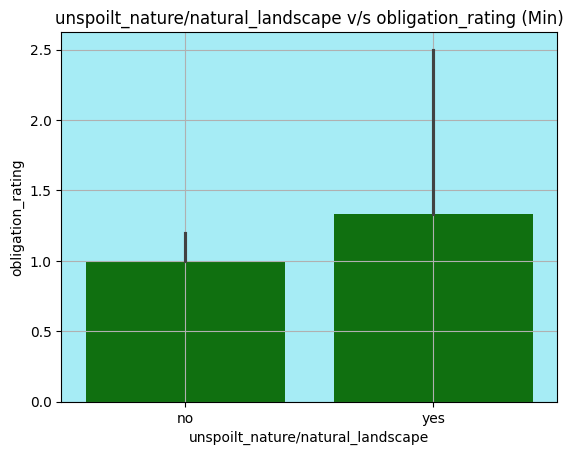

In [342]:
# Plot the barplot
sns.barplot(x='unspoilt_nature/natural_landscape', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('unspoilt_nature/natural_landscape v/s obligation_rating (Min)')
plt.grid()
plt.show()


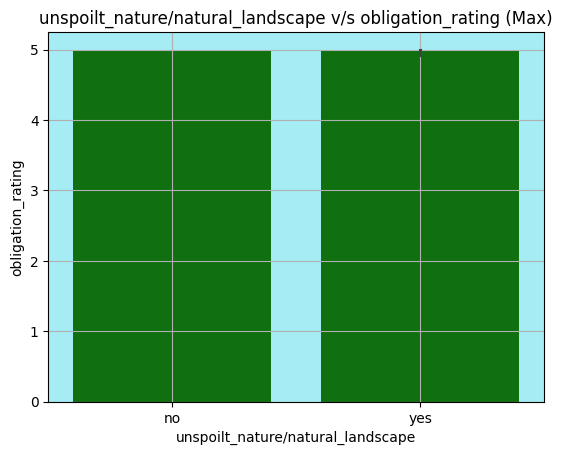

In [343]:
# Plot the barplot
sns.barplot(x='unspoilt_nature/natural_landscape', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('unspoilt_nature/natural_landscape v/s obligation_rating (Max)')
plt.grid()
plt.show()


#### cultural_offers, obligation_rating

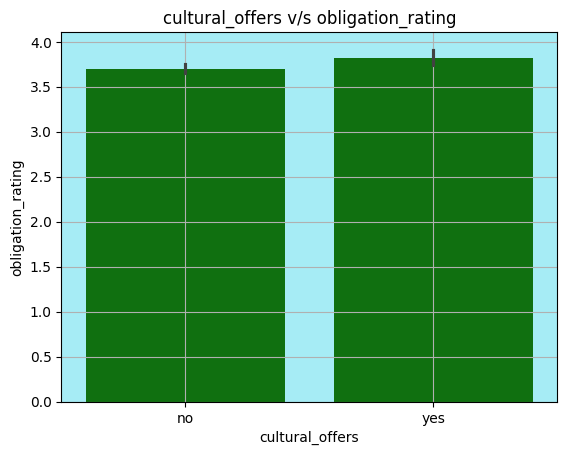

In [344]:
# Plot the barplot
sns.barplot(x='cultural_offers', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cultural_offers v/s obligation_rating')
plt.grid()
plt.show()


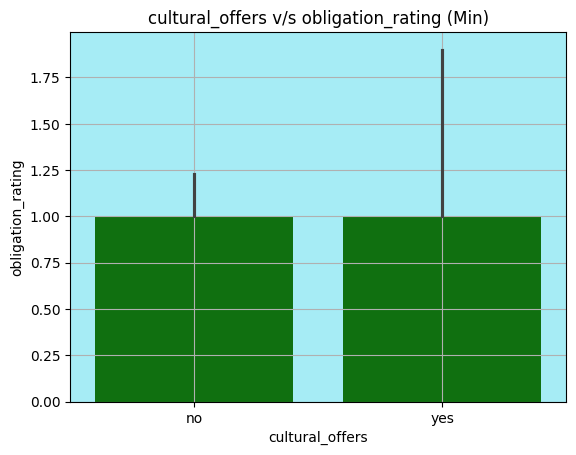

In [345]:
# Plot the barplot
sns.barplot(x='cultural_offers', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cultural_offers v/s obligation_rating (Min)')
plt.grid()
plt.show()


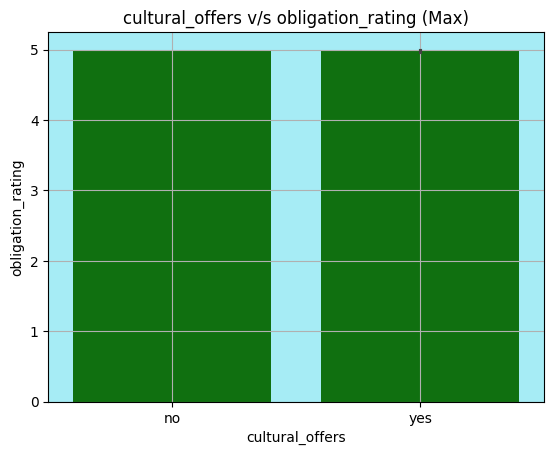

In [346]:
# Plot the barplot
sns.barplot(x='cultural_offers', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('cultural_offers v/s obligation_rating (Max)')
plt.grid()
plt.show()


#### change_of_surroundings, obligation_rating

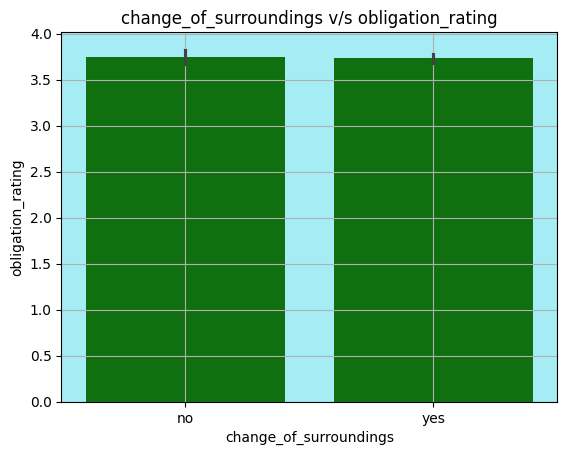

In [347]:
# Plot the barplot
sns.barplot(x='change_of_surroundings', y='obligation_rating', data=df_vacations_data, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('change_of_surroundings v/s obligation_rating')
plt.grid()
plt.show()


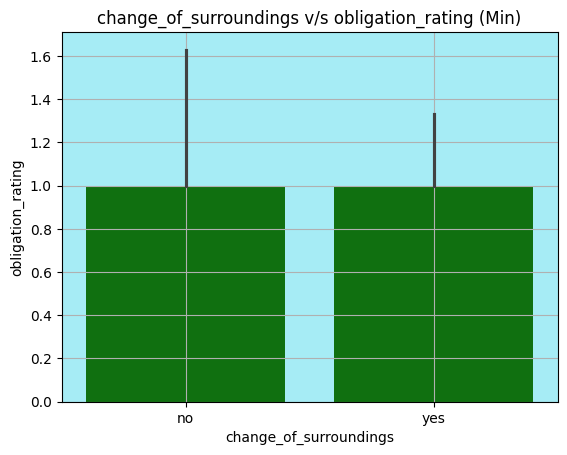

In [348]:
# Plot the barplot
sns.barplot(x='change_of_surroundings', y='obligation_rating', data=df_vacations_data, estimator=min, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('change_of_surroundings v/s obligation_rating (Min)')
plt.grid()
plt.show()


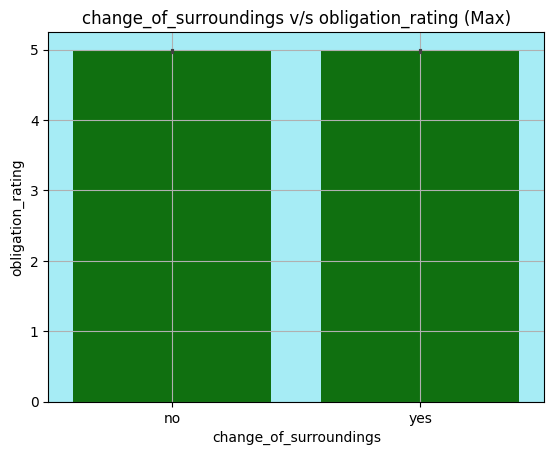

In [349]:
# Plot the barplot
sns.barplot(x='change_of_surroundings', y='obligation_rating', data=df_vacations_data, estimator=max, color=graph_color)
ax = plt.gca()
ax.set_facecolor(bg_color)
plt.title('change_of_surroundings v/s obligation_rating (Max)')
plt.grid()
plt.show()
